### <h1 style='text-align:center'> Decision Tree and Random Forest </h1> ###

Decision trees are extremely intiuitive ways to classify objects. 

Random forest is an ensemble or randomized decision trees. It is a powerful method because: 

* Training and prediciton are very fast.   

* The multiple trees allow for a probabilistic classficiaiton (majority vote)   

* No parameters makes the model very flexible and thus perform well on tasks that are under-fit by other estimators 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

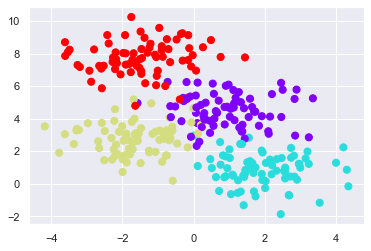

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Decision tree is built on data iteratively. 

![decision tree](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABHIAAADSCAYAAAAmGOcRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdAVlea+PHvfQu9V1GKdLBgJzYEUezdFKNJNG0yJTM7%0AO7O785tNpu10d3bKZmZ2JslMMpPYEjV2xYKigqCIgghIUUCk9/IW3nJ/fxDBN6CCCgo5n7/C5ZZz%0A3/g+nPvcc54jybIsIwiCIAiCIAiCIAiCIDzxFI+7AYIgCIIgCIIgCIIgCELfiESOIAiCIAiCIAiC%0AIAjCECESOYIgCIIgCIIgCIIgCEOESOQIgiAIgiAIgiAIgiAMESKRIwiCIAiCIAiCIAiCMESIRI4g%0ACIIgCIIgCIIgCMIQIRI5Qg+JiYm8+OKLD3WOV199laamJgDi4+O5evXqo2iahZaWFlasWDEg5xYE%0AYeA96bFGlmU2b97MsmXLWLFiBd/61rdobGx8ZOcXBGFwPOmxxmAw8MMf/pClS5eybNkyfv3rXyPL%0A8iM7vyAIg+NJjzV3+sUvfsFXv/rVATm3MDhEIkfolSRJD3V8SkrKI2pJ75KTk3nmmWe4cePGgF5H%0AEISB9STHmp07d5KXl8eePXvYt28ffn5+/OpXvxqw6wmCMHCe5FizZcsWmpqaOHjwIPv27ePSpUsc%0APnx4wK4nCMLAeZJjzW2HDh1i//79A34dYWCpHncDhCfDH/7wBw4cOICrqyv+/v5d2w0GA7/5zW+4%0AcOECZrOZyMhI3n77bezt7YmPjychIYGMjAza2tp4+eWXWbduHd///vcBeOmll3j33XcB2L59O7m5%0AuTQ2NrJ8+XL+9V//tUcb1q1bh16vt9g2efJkfvCDH/TY9+OPP2bz5s185zvfeZQfgyAIA2woxZqw%0AsDDGjRuHStX5p3LcuHFs3br1kX4egiAMjKEUazZt2tT1Fr+hoYGWlhacnZ0f6echCMLAGEqxBqC4%0AuJi///3vvPnmm5w5c+ZRfhTCYJOFL71jx47Jy5YtkzUajWwymeQ33nhDfvHFF2VZluU//vGP8ubN%0Am7v2/e1vfyv/5Cc/kWVZlufOnSv/8Ic/lGVZlquqquTp06fLBQUFsizLcnh4uNzU1NS1309/+lNZ%0AlmW5trZWHj9+vFxVVfVI2j537lw5JyfnkZxLEISBNZRjTVNTk7xs2TJ5y5Ytj+R8giAMnKEaa37z%0Am9/IEydOlF988UVZp9M99PkEQRhYQy3WtLe3y2vWrJGLiork3bt3y2+88cYDn0t4/MSIHIG0tDQS%0AEhKwtbUFYO3atXz00UcAnDp1itbW1q5hfkajEXd3965jN2zYAIC3tzcxMTGkpKQQGhoKYDG/e/ny%0A5QB4eHjg4eFBfX093t7eFu1Yt24dOp3OYtuUKVN6zSYLgjD0DNVYU1ZWxje+8Q2mTp3K+vXrH/j+%0ABUEYHEM11nz3u9/l29/+Nm+//TY/+tGPxFROQXjCDbVY89Zbb/Hiiy8SHBxMVlbWQ9+/8HiJRI4A%0AWAYMpVLZ9d8mk4m33nqLmJgYALRarcXQvTv3NZvNKBTdZZfunCN6e2pCb9e7bfv27Q9xB4IgDAVD%0ALdakpaXxne98h6985Sts2rSpz8cJgvB4DaVYk5mZiZubG6NHj0apVLJ69Wp+9rOf9elYQRAer6ES%0Aa6qrq7l48SIlJSV8+OGHNDc309bWxhtvvMFf//rX+x4vPHlEsWOBmJgYjhw5QmtrK2azmb1791r8%0AbsuWLRgMBsxmM2+99Ra//e1vu35/e9+KigpSU1OJjY0FOoOOwWAY3BsRBOGJNtRiTWZmJt/85jfZ%0AvHmzSOIIwhAy1GJNWloav/rVrzCZTJjNZvbv38/06dMH5FqCIDw6QynWeHt7c/r0aT777DP27NnD%0At771LaZMmSKSOEOYGJEjEBsbS2FhIWvXrsXZ2ZmIiIiuJXa//vWvs3nzZlavXt1VqOt73/te17Hl%0A5eWsWbOGjo4O3n77bQICAgCYP38+69ev509/+lOP6u0PW819oM4lCMLAGmqx5o9//CMA//M//8Nv%0AfvMbAPz8/HjnnXce6ryCIAysoRZrXn/9dX75y1+ycuVKFAoFU6ZM4bvf/e5DnVMQhIE31GKNMLxI%0Acm/jswShD+Lj43nnnXcYO3bs426KIAjDmIg1giAMBhFrBEEYDCLWCI+CmFolPDCRFRYEYTCIWCMI%0AwmAQsUYQhMEgYo3wKIgROYIgCIIgCIIgCIIgCEOEGJEjCIIgCIIgCIIgCIIwRAxasePK9uTBupQg%0ACE8gH/vYQbmOiDWC8OUmYo0gCINhMGKNiDOCINwt1ogROYIgCIIgCIIgCIIgCEOESOQIgiAIgiAI%0AgiAIgiAMESKRIwiCIAiCIAiCIAiCMESIRI4gCIIgCIIgCIIgCMIQMWjFjoX+yb9yhfKCUyglA9Yu%0A45kZn/C4myQIwjCUdeE8dWXnkDDj5DOVqTNjHneTBEEYhjJSTtNafRGzrMAzYBZRU6c+7iYJgjDM%0AyLJMyomjGFquYpKt8IuII3zsuMfdLEEYECKR8wTKvXwJu9Z32bDACEBlTS4nDzQyd9mzj7llgiAM%0AJ5nnTuOn3sKCBWYAikrzOJfUxoz4xY+5ZYIgDCcpxw8waeReAqM6f87Oz+NSmo5J02c/3oYJgjCs%0AJO3fRvy4JEZ4SgCkXcojL/srREZNeMwtE4RHT0ytegJVFp3kqYnGrp99vCSU2vTH2CJBEIajpltn%0AGBdu7vo5JECmoyH1MbZIEIThyNB4jkC/7p+jIkw03Trz+BokCMKwI8syav2FriQOwPRJHdwqOPkY%0AWyUIA0ckcp5AKoWu122yLD+G1giCMFypJG2PbQqpZ/wRBEF4GMpe4oqyl/gjCILwoEwmE1YqfY/t%0AvT1XCcJwIBI5TyCjKoS29u635LIs06wPQJKkexwlCILQP1o5iI6O7gSx2SzTZhj9+BokCMKw1GoI%0AwGzujjV6vRmtHPQYWyQIwnCjUqlo1PpbvPhuaZMxW4U8xlYJwsARNXKeQHFL17JzVxPu1tnYWBkp%0AbwjgqQWvPe5mCYIwzMQtf4GPd7fhbZ+PQiFT0RTM3JUvP+5mCYIwzMQseYUP9v8fvq7FGE1Kqtsj%0ASFi74XE3SxCEYWba/Ff5cP97+LqVouuwoqEjigVr1zzuZgnCgJDkQZqvU9mePBiXGVZ0Oj1GgwkH%0AR7vH3RRBeGg+9rGDch0Ra/pPo9GBLGNnb/u4myIID03EmidXe5sGhVKJra31426KIDy0wYg1Is48%0AmLZWDSq1EhsbEWuEoe9usUaMyHmC2dhYg83jboUgCMOdnZ0INIIgDDx7B/FiShCEgSdeggtfBqJG%0AzpdMfU0DSYeOcL3wxuNuiiAIw1jlrSqSDh2hvOzW426KIAjDWNmNMpIOHaGmqu5xN0UQhGGsML+Q%0Ak4cTaaxvftxNEQRAJHK+VM4e209F5ls8M2MnNvW/5MDWP4uVsARBeORO7NtGW8GPeXbmTgwl/0Xi%0Arn887iYJgjAMHf7kfaj4Oc/O3En9lbc5dWjn426SIAjDjNlsZt/Hf8CpdTNrn/qUkrT/JO3kkcfd%0ALEEQiZwvi6aGFhwMR5g/y4hKJTFprMzi6ItkpKY+7qYJgjCMlN0oI8TtFLOnmlAqJaZPMjM54AwF%0AufmPu2mCIAwj2ZmXiRmTxrQoM0qlRNx0Ez7Wx6murHncTRMEYRhJSz7FmjnZREWAWi2xaE4HytaD%0AtLdpHnfThC85kcgZgjQaHUkHP+PE3n+Sn3O1T8dcvXyJWZN1FttGeitorSsciCYKgjAMtDS1cmLf%0AJ5zY+xHFBcV9OqYg5yLRE8wW28aFS9wsyh6IJgqCMAzU1zRwfO92ju/5uM/TMWvLcwkOkCy2xUwz%0AcuXi+YFooiAIw0DlrSqO79nC8b1bqa3u23RMfct13F0tH5mjx7dx7ap4QSU8XiKRM8Q0NTRzaueP%0AWPPUAdbHn8FN93tOH9l93+OCwsPJvmZZ27ql1YSVnc8DtUPTrqUwv5SODsMDHS8IwpOtoryCi4k/%0A4tmYo6yPP42qZjPnk4/d97hRo8O4Vmw5ZfNmhRl378AHakdLcxtF10oxGo0PdLwgCE+26wUFFKX+%0AhOfjjrM+/hSt135O1oW0+x7n4OpLTZ3JYltWnkRQ+JgHakdjQwvFBWWYzeb77ywIwpBz9VImtVd+%0Ayvr4k6yfm0TZhR9TcDXnvsdJVl5otZZx4WqhLQFBD9avqatppKS4XJS3EB6aSOQMMReS97JpVT3W%0A1p3/68aHg7XuNDqd/p7H+YwaQVHtUxSXdgaNhiYzW48EMn3uvH5d/2ZJKX/7738nc/8beOl+SNre%0A/yDj7MkHuxlBEJ5Yuen7WLekFZWq84139AQzmurj9+14RI4fy+mcCdyq6uz0VNeZOXgukgnRU/t1%0A/aL8a7z3q2+Td+zruLf/kLO7vs+Vixce7GYEQXhi3cg+wIp5GhQKCUmSiJtuoP7G/etPTJs1m90n%0Aw6it74w1peUymdcnExQa1K/rX718mb/+4uvcOPMmTi0/4MT2tyjMy3ugexEE4clVXXyYhFkdSFJn%0ArFkSq6c879B9j5sRv4h/7PejpbUzcZxfJFOhmYm7p2u/rp+RksJ7v3iDqov/gnXt2yRu/SE3S0of%0A6F4EAcTy44+Upl3LmSNbsVNUoDc5EhS1hKCwsPsed7OklPyMA1grW9HJo5iz5NnOpcd7oZYakSTL%0AocR+3i3U1TTi6z/intdZ+PQrZGdOJv1kDraOI1mxMRalUtnn+6uqqOJi4s9ZNkdH1JjO9oUFt3Hw%0A5C4SP2vEWi7CLKvwCJhN1NToPp9XEIT+aaxv4vzJHdgpq9GZXImcthLfAP/7HleUf42Sq4moJQ0G%0AZSBxS9eiUvX+Z8BK0dRjm5NtM3p9x13j023LN7xJZlo6p/OLcXANYOVLM3vErXspvlZAzslf8dJK%0AGX/fzmtFhDax4/A2jpXfwMp0HaNsy6iweCLGj+/zeQVB6J+qikqupH6GjbIOrdGTSXOextPb877H%0A5V6+TGXxKVSSHtk2nNhFK+8aA6yVPWONTS/bvkihULBy03+QevYMmivluHmFsWRd/xLGOZkXKUr/%0AHd96yQoX585YMy68jo/2fURJ/lisuUmH2Z7gqEUEhob269yCIPRd2fUbXMvcj42yCY3Jhxnzn8PJ%0Axem+x11OP0dDeSoKyYTKaQKz5y+8677WisYe23rr6/Q4ztqK5Rvf5ljySfTt1YwIiGL+qqj7Hnen%0AjLMnqch5l3973a6rDzVxbBV/3/MheZmjsZEq6DA7EzFtBb7+vv06t/DlJRI5j9CxT3/Lq6tuoFR2%0AdlYOnirGzuEtRoy8e4Klrqae8szf8cLCdgAMhiI+3FHBio3f63V/s9oPrTYbW9vuwVQFNz2Iib5/%0AxwogavJEmDyxr7dkITvtMCNcW4ga42ixfWGMjp37P+W51Q4AZOUXcPm8mYnR0x/oOoIg3J3ZbOb0%0Avv/h9bWVnz8Y3WT7oRu4uP0MB0e7ux5XUnwDXek7bFjQOXpPqy1k26e1LH3+zV7318k+mExFXfEM%0AoKF9xH2TOACSJDFlxnTgwWLAjZzjjPDQ4e/rYLF99sRGCm/sI26mLQCpmdcoyH2TsDEPNpVCEIS7%0A0+n0ZJ34HS+tuv3wc5O/7y5l4Yaf3TUBDJCblYV927usX9A59bqxuYD9uxtZuPblXvfXGH2Q5QqL%0ARE+7qW/TvhUKBdPnxPbthnpRff0kPp4mXJwtX2qF+5Xj5lxOSFBnvDt8phC19ffw9R/1wNcSBKF3%0AjfXNlF78Ay8s6nwWkuUy3tt1ixWbfnTPl0CZ587gb/UxCxd0jsqrqC7g1KE24pas7XV/jckHsFw6%0AXGO890vw21QqFbPnJfRp3960Vp/F2wNsbCwnw7hYFbFoVhl2dp3bPzlciIPDT3Bxu38SSxDE1KpH%0A5EZRKdGRNyweepbEask5f/Sex11OPczK+W1dP6vVElPDCykpLut1/5gFK/jnoQiuXJNpaTXx7jYV%0AVfWOnN3/v5w6vG9A53arFR3Y2Choa7e8RtENA2PC1V0/T4gw0XDzzIC1QxC+zC6mXWBFrOVDz9qE%0AFs6fvvdUhKLsY8yb2T0F09ZWQYBrDk2Nrb3uP3vhs/zts9EU3pBpbDLxv/+0orldzanPfs/ZY4kD%0AOrdbKXUWZjcaLa9RXGIgLKg71sycbKAsL2nA2iEIX2bpyUk8vaDeYtvTCTWknz59z+Mqi04RPaG7%0Afp6rswJHLmMymXrdf+rcdby/eySl5WZq6kz893tWaHUyJz/7AxfO3vtaD0up0GM00iOeVVYbGeHd%0AHWsWzdaQm5E4oG0RhC+ri2ePsDqh+1lIkiQSnrpJzuV7169prjjL2LDuZ5KR3hJS+92LnY+Zvo4P%0A93hQWWOivNLEz/5kjdGgI+mzd7h8fmCLpKukzljzRR0dBmxs7ujPLWgl48zhAW2LMHyIETmPiEbT%0AjpeDiTs/UkmSUEj3LtCpkDp6ZJvdXUxca27udX+1WsWqTf9OYX4hn6bm4uWZxKr5nUmflrar7NxR%0AztLnv97Ptus4d3wfSrkWs8qHWfOXYW1t1fX7tlYN588kUVEFY6fasvNAGy+sdUSlktBozOw61MFb%0A/2L55lwpdfSrDYIg9I1O046jveU2lQrMxnt/53r7TjraG9Bqdbi4Ovb4nZ29LStffpu8K7kknc1l%0AXNgp4qeXAFBTl8OxvTXMX/Viv9re0tTK+VP7UUlNSNYBzE5YZDG9s6mhhYupJykrV7I21ppP9rWy%0AbpUjCoVEY5OJ85eNzJlhe9/7EgTh4RkNOqytLfsntjYK9Lp7L7mrUvT8TlqpOzAaTb1O53bzcGX5%0Axp+QnZlF0cWrxEafJXpC5yp5peU5nElsIGbhqn61vb6mgcyUA6gUbagdQpkVP9+ir1VbXUfW+TOU%0AlFrx3Dw1e4+0s3KRPZIkcavSSFWtCQf77nedkiShku5di1AQhAckd1i8CAdwspfRNLTf87De/v7f%0Aq08wym8UPht+zqXzmZQUXGF1QhpjwzpX780tzOHCmTamxcT3q+mVt6rIOX8IlaTHwXM802bNtvh9%0Aedkt8rPSKS2xZdUcFceS20mI7ezEFRQbUSllFIrue1cqJZAtVxkWhLsRiZxHJHJcBEe3+hDkX9u1%0ALfOqglEhM+55nE/QU2TnpxEV0f02KDnTi3nP3XuqQGhEKCV5Z1k5rx3oDABODhKj3bJpbGjBtY9D%0A8kwmE4nbfsGrqytQqyV0ukw+3JLPqpe/jyRJ5F/Jpv7a+zwdr0E/WeaDTxUolW688/cmzJI9Nu4z%0A8QpoQpbzujpJLW0yJvX9awN9Uea5MzTdPI6VspU2w0gmxb6It493v88jCMNZdMxs9u85wLol3SNp%0ATp5TM25a3D2Pc/CcSGl5FgF3TL3OLfVjccy9p2VGjh/DrYKTxE/vfojx8pCwN2dgMDyPWt23PyMa%0AjY4ze3/OxpV1KJUSrW0X2b6tkBUvfBuAy+mpGGu28lyMjuYJMu9vV+PqZM0f3m/FjD3OfgtxHVEI%0AdBcGrK6TUTuN7dP175R2MhFt7RnUSi2tHf7MWLgJFzfnfp9HEIazyTPiOZR8guXx3d/9AyftiV5w%0A7wcdyS6SuoZreLh19glkWaamdbTFC6Iex0gSE6ZMpO7GcaIndL8AC/CF9JxzQN8TOfW1jWQl/ZwN%0AS5qRJIna+osc2lnKomdeAyD91FEc9J+xPtZA9ViZ97ZaMcrHht+924YJR0aGr8XaKQ2o7jpnYQm4%0AjZzS5zbcdjpxD+aW8yilDtqMQcSueAU7O5t+n0cQhrOwCbGczUhh9tTuUXuJqe7EPnPvmlcdilA0%0Amu5pSWazTIvh3sXOFQoFU6ZPpbn8kMVonjGhZq4cPQP0PZFzs6SUquzfsmFeO5IkUXbrIicP3GLu%0AsucASD68C1+7o6yPNVEWAn//1JbRfmZ++64Gg9mJkMnrMSgOcud0rwvZCgIiZva5DdAZY0/s24a6%0AIwtJktHIYcxbtanP/TNh6BpW/4dlWSY7M4vmhgaiY2b1qZbDo6JQKBgz6w0+OrgFB3VnwSo777lE%0Aj42853GR48dyLmk1eYdPYm/dQrNuJCFT1/WpCLFKoe0xmsfTTU9zU2ufEznpZ07z7IJbqNWdQdDG%0ARsHSWcVkXchkYvQUbuXtZf1iLSChVkt8cxP88/AYFix6BUenzoxya3MbH+z/K+521zEaVbQRxYK1%0Avc9PvZui/ELcTVtYvPh2EL/GB5/9icUv/qRfRVIFYTCYzWYy0zPo0OmYNnvmoP6xtLa2YlTU62w5%0AtBM7VTVaoyvuoxffsxYXdK7wcupQFedzzmGj1tCo9SUqdmOfrqlSaHtss7fVodd19Pne008dYcPS%0AWpTKzljj6KBgSvBVSopLCQjyp7H0AOsW6wEJNxeJf39D5h+J0axY/3xX7Z/a6lo+3P833GxL0Rtt%0AMFhPI375gj5d/7bL588T7rqbiKmdHThZvsIH+/7M0he+36/zCMJgMBqNZKSeR1JITJ0R3a8FCh6W%0Aq7szdn4b2Xb4ILaqOtoNHoyKWHXPWlwAMQuWcmRPA7amS6iVehq0o3lqwWt9uqZa0XO0j0rqGX/u%0AJfPs/q4kDoCnuwJfxwwaG57Fzt4GY/0R4hcYAYkRnhLf+5rM9tPxrF63Ejv7zhF/N0vG888DH+Fq%0AewtNhz1K59nELOzfIg6pSUeZEXgAX5/OdphMmfxjr4Glz/9Lv84jCIOho8PAhbOp2NrbMyl6yqD2%0Avf0D/cmsWs/2w0exVjbRbhhB8JRn71mLC2Du8uf4ZFcbzsocFAoTDboQYpe92qdrqnuJK0ruPdrw%0Ai65dPMyGBRpuv1D3HyWRmXuOjo41aNq0uJDEzMlmQCLAF779ionEK2uJey6+K6FbmDeCjw/uwMW2%0Aina9M3be84mO6F9h9VOHdrF48gncXDr7VzrdOXbsoSt5LQxfwyaR096m4dgn/82iGWV4+MKh/fvx%0ADNtI5IQHK+z7IPwDA/AP/E9aW9rJSDmDg0vfivXNiF+MLC/CYDBiZaW+/wGfs3MbR3llZlcnAeBy%0AoQ8JU0fS1NiKlbX6vm9+tC21XV/820aNkDhTeAuYgp2qtscx9lb1XUkcAEdnB5Zu+C5GoxGFQoFC%0A0f/SS6X5Z1g/z3L+/Izx5RTmFxMWGdLv8wnCQKmvqSf14O9YFluJrbXMwZ37CZr6BoGhg/fvNCwy%0AkrDIH9BQ18jl82nYO/et2HnckqeR5bX9jjXYhNHUkoeLU/d3u6LRjyhHOxrqm7Gzt7lv4lw2NGNt%0AbRkbgvxMJF+/hYeXJ55OdRa/kyQJB3W9xUOjp7cni9f/PwwGI0rlg8WahlvnWTi/+y2cJEmEjLhB%0AfV0T7h4u/T6fIAyU8tIycs78iWVz6jCb4cCWfUya9y18RvWtb/EojJs8DSZPo7qyhpzMDOwc3e57%0AjCRJJKx+CbP5BUwmc78S3XopGJ2utKsgqCzLtBgCkGWZhrpmHJ3t7xu7VIr2Hg+ho7x11NU0oFKr%0ACA9oALrPYWUlYaOs60riAPiNDsBv9NsYDEZUKuUDPdR2NF3Gd5rllAlXq0JMpt6nmAnC41KYl8fN%0ArL+xLLaR1naJfR/6ELvy3wZ1pOrkGXNgxhxultyk4Go2tvb3fyGtVCpZ/OxXMJlMyLJ838TPndpM%0AAZhMtV1TukwmmTbTaGRZpr62CWdXx/vGLrWy59QvF8d2NO06CvPzmDFGC3R/112dFUiGKotns9DI%0ASEIjf0xHhwG1WvVAsUahy7F4lrOxUWAnXev3eYShZ9gkclKOfspra252ve19ZlEbHx/YRUTUhEHN%0AKmeeO42x5lPWxmgpvQV7PghhyYbv3rfjIUlS/x6sgKdi5nBiXzkOuem4OWm4UeWDe9AyDn38cwK9%0Ay9B2WFHVNpZFz3zlrp2G0PHTOXfpBDMmdT/YHE+1YmJ05xxPjdEdKLc4Rmv06PVc/QmgX2SWe/4/%0A6jBIqB3795kIwkC7mLyDV9dWIUmdsWb9siY+PvQpgaGDO6Ij9cQh7DsO8OzMDvKKJPZ+NI7lG755%0A3+TGg8Sa2EXL2buzBnfryzjZdXCj2hfP4AUc2fJjAkfcornNhibTVBJWv3TXeOvhN4GC62cIC+r+%0A/cl0RyYtmYKNjRW1LW5Ad2FVWZbRmNx7PdfDjYDq+fkYjJJ4sBKeOLnpn7BxZQO3/82+vLqOjw7v%0AwOfZbw9qO04e+IRRdkmsm20kM2cPhy5MY8lzr9/3uAd5sRO37Dm27mzExzEXGysTN2oC8A6ezbFt%0APyBwRDWFzfZorWYyd+mzdz2HtVM41XUZeHt0X/vSNW/invXHYDByMcuFseHdD2AGg4xB7j0Z/jCx%0ARu4l1siyWGNEePKUZu9kw9JmQIGjA7y+tpJ/Jm5n0TNvDGo7End+QMSINNbNNnHu0n6OZ8xh/sr1%0A9z3uQf5+xy7bxIe72/F3L0SSoLQuBO/AKE5+8p8EeNeSX++MwiWemfOW3vUcRlUg7Zpc7O26v9c3%0A60YS6epIcFg4mRm2JMzqrtnT0mpCZdv7ynf97ZfdSZZ63r+INV8OwyaRYyNV9iiU5eVci1arH7T5%0AyEajkbbyvTyzSAdIhIwG3xGF7D66n3nL1gzINeetWI9e/zRtLRpC4104vO3XvLLqdg0JPe2aDPYe%0AdGfeCstOj6ZdS1FBMYHBgVwuXMr+pBOE+TeRe8MNpdti3L0637qNDF/B3uN/Z2mclo4OmV3H3BgX%0A9+jvJXziPJLOZRA/ozPgybJMet5oVmwMeOTXEoSHYauq7pGssFdVDWob2lo1WGkOsyDOAEiMC4cR%0AntmcPZ3MjLi5j/x6kiSx6JnX0Gr1aDU6wt2dSdz6YzauuPX5Hjpq609z+rg3sxMWWRzb0txGyfUS%0AQiIiSDsxn+LyswSObCO7yANn/zXY2naO5HH2W8aR09tYMFtPa5uZT4+OYPaK/k3R7AufkBgycq4w%0AdVxnHQ6jUaakPoxxvRR8FoTHyV5d08u26l72HDgV5ZX42id9XrtCYmqUjItTOlcuRTN+0oRHfj21%0AWsXS598a6NZjAAAgAElEQVRE067FYDAS4WRP0o7v8+Lyhs/3aOd62TEupY1m0nTLqU4NdU2U3yxn%0A8oxZJB4owcchg1Ge7WQV+jByzPMoFAqsra2QXBaSnL6XOdFG6hpkdp3wY+HzKx/5vTj5TCe/uJCI%0A4M4XZVqtmWbTWJE0Fp44X4wrnSNie8afgZR35SpTg1IZEwogMWuKCdXlU9wsicFvtN8jv56dnQ3L%0AXvgurS2dSd0QtYqLB7/H80tu1x5tISN7L0XXwgkJtxxxXVNVR011LbMTlrJjdyVBHldwd9FzqXAk%0A4dEvAeDm4UKWKY4L2ceZFmXmVpWZ/WdCWf7SvEd+L2qnKdysKMVvZGfftLHZjEEd9civIzx5hk0i%0ARy+7AcUW2xrbnLseEgZDeVk1kYEN3Pmx2tgoUJkrBvS61tZWWHtaYTKZcLEuRas1YzKDg70CezsF%0AKqPl55J64hDq9iNMDG8h56wDJuIYv2Azt8qqmLLUx6IgYeSESTT7/4JPUk6gUlsz5+n4h6491NFh%0A4Pzpk+i1rURFx+Lp7YF/oD/5rV9hW2JiV7HjuJUvPNR1BGEg6E2ugOV3WmdyHdQ25Odc5anx7dw5%0AZNfDTYHu8nXg0SdybrO1tcbW1pq6mkaCfcpp13QWabe3U+DprsBwKR/oTuScPPgprlIyY4PbuHTM%0ACVvHJYRN20xVRS2zVo+yGMU3ecZs6moi2XY6GRs7Jxa9EPfQtYe0Wj3pyccxGTuYMnMeLm5ORI4f%0AT9aFTWxLTEKt0KIxBzBvjYg1wpNHZ3QBGr+wbXBjTe7li6yf01lP5raQ0RLnT16FAUjk3HZ7mlNe%0ATgHTx1fT1q5EqQBbWwVB/pB+4jLQmciRZZmjuz/Ez/E8Ef5azh9wxXPUWgIin6GuppG4Z30tRgbN%0AiF9MRflEtiWnYu/sxcqXZz3QNM07tbVquHDmOADRc+Zj72DHlBmzuXDGwOWjKSilDvRSKAvWPv9Q%0A1xGEgaA1ugJVX9g2uFONK25c5YvvoaInmNmafHFAEjm33S4VcfbESRbFtNLSKmNtJWFtrWBqlMyW%0ApLSuRI7ZbObwjr8QNiKLEG89qXs8CYx8Hm+/F2hubGXB86MsXvTNXfoMJcXT2HoyAxdPX1a9/NRD%0AzxJprG8i89xJVGobnortfCabNX8JKcchJScDBWbM1mOZt/Lph7qOMDQMm0RO1IyVfLyvgGcXNWFl%0AJZGaqcRuRMKgTqvy9vHgyhUnxoV3F8symWQM5oHpeOl0ehQKRddwPLNZJjevFRulCbVaorrWyOJ4%0Aewzm7hFJtdV1OBv3Ez/XCKjxHaknIzuRipuTCAkP7vU6zq6OzFt27xUjDAYjpw/vRm0uQ292Ymz0%0AMkb6juyxX0NdA6kHNvPcolrs7SSOpZzgpst6Js+YTUTUBCKiBq5jKAiPQuik5ew8UsLqhDYUCjiR%0Aao1H0OJBbUNgcDA5WdbEuXev7qLRmFFYew3I9TQaHWq1qiuxIkmQeqGd9rbO+FrXYGLVIgeMcneN%0AiaL8QsLdjzFprExnrNFyLGUfem00IeG9j7Tz8HJn/vJ7j/jTaHSkJO7EWqpCZ3JhSsxq3L16TsEq%0ALysn/+zvWZvQiFotcfBUEo6jX2bMxMlMmPYUTHvqAT8NQRgco8KXcij5PRbFdC5Fe/CUHX7jlg1q%0AG0aHRpCdLzHhjnUbqmrNOLkPzGhZTbsWK2t1V5JXqVRwKFHLmDAVBoNMU4uZNUvsMd0Ray6lpRM7%0AJoUAXwlQ4zeqjc+OforVxGkEh/n3ep2Rvj6M9L33iL/mxhbST+7CRlGPzuzJjHlrcXR26LFfUX4+%0AlVf+wtp5bcgy7Dl0Er+JXyMoLIxpMXMZyOS6IDwKrv4LOZW2ldinOjCZYNdRRyKeWjG4bfAMoLzS%0AjK9Pd1I1r0jCPzhiQK7X3qbBxta6e4ScpGLbZ20Ej1ah0cpodWaWzbdDqe7+zp89lsjqmIu4OisA%0ANQF+TWw7uIOIqF/i5t57PaHRwaMZHTz6nm2pra7lcsperBVN6GUfYhY/3etL85zMC2jL/8Fzc3R0%0AdMh8+mkSUfHfwWeUD7PmLwGWPOCnIQxVwyaR4+3jzcyV/8Wu5ETMBg1hE2Kwaagnae+HoHJm+tzF%0ADzzFqqWplXMndmKrqEVrcmNa3FrcPHomZ2xtrdHbzCUz5xCTx8m0a8xsOzSCuDWPdshuW0s7p/b9%0AH96O1zGZFdTrx7Lw6ddJPriDf33dClvb7iKBf/xAQ1T8/K5jsy+k8vyczukYt02Ngj/vOkFh5k6c%0A1OV0mJ2w84ojOjahz206vP0PvLgot6tA4adH8rCO+yHunpafU0bybl5ZU9dVX2TBbAPbDx9Enj5L%0ArE4lDAkBwcG4uP2UHacTkc0djJ0Wz63SGyTt/QCVjRfT5y544LnO9TX1XDyzGxtFE1qzF7MXPIN9%0ALyvEuHu5cal9FnlFyUSGdA6j3ZHoz9IXF/Vy1gdXX1NP+rF3GeFUit5gRYt5EgvWbuL8yR386+v2%0AqFSd31mjUeb372uZs3Zh17GlBRdZP1e2ON+8GR28s2sP7vaVOKir0BpdcfVfwKTps/vUHlmWObp9%0AM6+tKUOplJBlmX/sLSDu6Z/2GH2Zd/4zXljeOecfYMU8HduOHGDMxMkP8YkIwuCJiJpA3YifsO3U%0AMUBiwvT5FOVfIakgHSsHX6bHzn3g2nS3bt4iN30/VooWOiQ/5ixZ2+vy4CHhIRzcNhkXx4sE+EpU%0A15n47FQ4q1/u3/K491NeWsbVlH/i7VxOm9YWg8105i57juLL+3nzFceu/oFWa+Y3fzWy6rXuuhXN%0ANbkEjLPsP8RMaWX33j04KPKxU9WhNXkyInRZn7//RqOR5M9+xWtP1yBJEmZzPu/tKmLFpp/0GL1T%0AcmUvGxbdno4Bzy5uY8uRfQSF/dtDfCKCMHgmTZ/NrZtBbE06hUJlzcT587l6MY3CrCTsXIOJnj37%0AgUetlRRdpyjrCGpFOyZ1ELGLV/U6vXDS9Gj2/OMMq+bkMcJTwc0KM6l5k1i+4dEmcory87l+aRsj%0AXKpoanNA4RLH7ITltFae5rUN3QWWG5uM/PL/JDZ9t7tfY9YVf57E6TY+pJoTBw+h1J7HVtVIu8Gb%0AwInPEhwe1qf2tLVquHx8My+saALAYMjn79tKWfXyf/bYt7rwAOuXdK7uaWsr8dKqJj5O3I3P0994%0AgE9CGA6GTSIHwN7BjvilqwE4sW8r00YnkRAvodeb2fJpOnNWvd3r25R7MZvNnPxsM6+tqUSh6Hxw%0A+PvuIhas/2mvD2sxC1dRmD+WrScvoLZ2ZcH6eb12jh7G6YPv8/LyfBSK2x2bDHbtd8Ravt6VxIHO%0AOa6eXs5EjB/ftc1rVADXy8wEB3QH0do6I4a2K2xcq/t8i46svJ3kXfEhcvy4+7anvLSCiYH5XUkc%0AgLULWtmadIiE1Rss9rVR1PVI2Lg7NqDV6CxWjBCEJ5mzqyPzVnQOWz20410SJqXjO15Bu8bMRx+l%0As/TFH/Q7maPV6jmf+Gs2rmz4/MHhGu99eoOVL/+o1yTn/FUvkJs9kUsns7Fx8GL5xriHKjjem/PH%0A32PT8uLPr6+lsfksxxLdcFSVdCVxAFQqCZ9R3gQEje7aZuvoRUOjCTfX7liTV2TCQc7khSX6z7dU%0Akpy+hfKyQHz9ey8AeKfszCwWzSjrqocmSRLrFtWz99RR4hYvt9jXRlnX43hbZX2PbYLwJPPwcmf+%0AynUA7P3nb1k95yqekxU0t5jY9s8MVr38//r9EqShrpHitN/wwqI2ADo6Cvhw+01WbvyPXvdfsu6r%0AZF24SOqpa9i7+LFq0+xH/uIl5+zf2Lji9pTVNsorj5F+2htnqxKLa9naKvAP9Ouq4wdgVjij15st%0AVsXLzJFxVZzmmcW3C43eZO/xD2gJDMOpD/3A9NPJPLuwCunzIqIKhcTaeRWknE1h+pwYi31tVT3j%0ASm/bBOFJNspvJKP81mM2m9nz4S/ZsKgYJ0cl1XVn2Lf1Eite+Jd+n/NmSSlNBb9nw4LOpb7bNfns%0A+KSKpc/3TDxIksSqjd/lQkoKbVdLcfUMZdn6aQ99X3cymUyUZH5wR82tFnKu7efCuRGMdL1psa+r%0Ai4qQsECLZxOdwR5Zli1i0sVsiVGjDjI/7vYI6VK2HngXv8Bf9qkfeD75MM8tbuR2IlitloibdJ1r%0AV/MJH2uZxLJT9xZrGnpsE748hmVJ6/LSSmz1xwgN7PxSWFsr2LiyjvST+/p9rgspqayeW9GVNJEk%0AiWcX1pKenHTXY0IjQpm3Yj1zFi7uSuI0N7aStH8nx/dup7ry4QqIOapLu9oDnR0ba7mINo2alPNa%0Aqmq6p1tISsvl+2xsbNmf2E5rW3fxvf/5SwsJM9os9psQaabyelqf2tPQ0IDXHVM8oLPTo1Roe+yr%0ANXsiy5Zv6etaPLAdpILUgvAoZWfmEOKe2jUU2N5OwYvLbpF28mi/z3U++RjrFtV3dRAUCollMTe5%0AlJ5x12PGRI1j3or1zIqf35XEqa9p4PjeHZzY9wkNdY13PfZ+9PoOPOzLLDosrs4KZM01mlqVnE3X%0AUt9g6vqdyspyWLFabcP2PW3odJ2xprXNzF8+bGHNAo3FfnOiDeRfSu5TmxrrahjhaRk/bGwUGDta%0Ae+yrM/VchUZj7Nsy7YLwpEk+mkRs1BU83TtjjbOTkpWxRWSkpvb7XJlnD7N2Qfd3xspKYmpYIaXX%0Ay3rdX5IkJkZPJX75Bp6KmdP1Zr7yVhXH924j6cCuroKhD6KyopYIf8vVMX19JNrrr1DXpOBsupaW%0A1rvHGhk1W3e3YjB0xoa6ehP7EttYNV9vsd/SOC0ZZ0/0qU269iacHC27yK7OEu0tPR+aNL2s5Nnb%0ANkEYCvbv+ISn4zuTOADeHkpmRl6hIDe/3+e6dukYC2O6nwXs7RT4u16huann32zojDXRs2cTv3wD%0Ak6ZHd/U/SopLOL53K6cO70Or1fd6bF/kZucye5LlM9i4cJmGW5cpr5RIOa9Fo+lexVdpZfkMpdPJ%0A7NjTisnUGWvKKwxcztEyb4bBYr/lcY1cONu32CybNKjVlonxEZ5m6mtre+z7xT6MLMtoDCLWfJkN%0AqxE50DnnMXHHz3l6gdliu1IpoZSa+n2+tpZGXJ0tv2AO9hJ6bUufz1FafJ2yzP/lmfltKJVwLOU0%0ANRWbiIiaTNLef2BLHu2t7dyqVjE6NIKAMfMIjYxAlmWSj+xF0uZhkq3wHD2H8VOmYZKtAcsgeP1G%0AEyH+WiJCrMgr7CDlvJboyY5IjtMt9isrzOTNVxw5cUaDvkNGpZJ4ZZ09ja2WD0eyLGOW+/bPY2xU%0AJKc+8STAt/uhMa8IPHyn9Nh3evwzvL/rBqvjK3Fxkjh82hb3oBViWpUw5NTV1HHh6O/4xouWnX17%0AOwVGXc8/wPdj0LdhbW35PfBwhZbivr9tuXYlm9aS93g+rrPjtD/pLO4RX2NUQCDJ+/6Gg+o6TU3t%0A1Dba4B8UQeikRQQEjcZoNHLq4E7UpusYzLb4RSQQEhmJ3mAFWHZQigoriQprITLUiuw8PRqtTHCg%0AI7aesyz2a6u/xqvrHTl+RovJ1Fk8cPkCa1rbZVzvqKFoNoMk9S3WRMfM4dDhg6y+Ixl07pKS0PE9%0Ap2ZFzXqaDz67ydr5tVhbSew76YjvmHvX+hKEJ1Fp8XVuXPqQZ75mObrXx0tBy9Vbdznq7hSSzuJl%0AEICXu5HcxiYC6L2mzBddTk/BqnkL6+d2YDTCrsMphE7/Ng6OzqQd/RB7VQkNDVqa2uzxCQgnasZy%0ARoz0QafTc/rQDmykcgyyI0HjF+PuNYK6divA8oVQ8bUbRI9vJjLUinMZOlQqCWdXJ9wDYi32U5nL%0AWbnCkcNJnckkB3sFU6NA3yFbPCDpO2TUVn17aRQVHcvx1BMkzOqOf4lnbZg8I67HvqGT1rL1wJ9Z%0APa8JWYbPTrgSPn1gVioVhIGUfyUbfc0BPN0tR8iPCYWtp4sIG9O/aU5KSddjm4tDB21tWpxd+rZS%0AZPqpRLwUu9kQb0anM7N951miF34Pg9FA1pmPsVeWU1OrQ2twwmNUBNNiV+Pm4Uprcxupx3dgq6im%0Aw+xCZPQKnF1cqKtUEeDbfX6TyUxJQR6xU7WEB1tx4qwGd1clRlzwj7RcYcrNoYH5U+w5cKwdSQJ3%0AVyV+oyRMJrhzQHRrO9ja2/fp/gLCp3Mx5yxTxnU/tyamuDB9Zc86fqMiVrE78e8sm9uOVmdm5zEv%0Anlosihp/mSl//OMf/3gwLtRmKL3/To9AyrH9vLQ4l3MZOiLDujs9La0mrjfMICCkb3MWb3P3HEna%0A6WTCA7vfBh1PtSJ4yivYO/SsXdGbCyf+wbpFt1AoJCRJItjfTPqFaoryr/Nc3DkmRHQwcYyZqHA9%0A1beuY2PKoV4XyKWzh1k08ShTxzYxPriOlprL3Kj0Qm92xklZgLNjZwclJUPG1trAmoUydrYK/H3V%0AWFsp2Zs2i8kz4zh3bCvlBckUXSvHxtELb7tsosZYEx5iRWiQFQ3NSo6nexM9vr2rc3c81Ra/8S/h%0A5OJ0r1sDQKFQYFL5kpx8g4aGdjLzHMktn4iktMbd09tiapmNrTUhUbGkXXEnq3g042e/SkBwUH/+%0AlwhDlKPV6EG5zqDFmqOf8sKSEs5l6AgJ7P43Xl5hplmxkJF+vvc4uicrWxeKr54lYFR3UnXfCTum%0AznsNdR+naV1O/htrEzqnL0qSRESQkbOpdRTmXmLj4mzGhXYweZxMiJ8WbcsNWmuzMVuPJyVxC8/E%0ApDAxopmokFpuFl2iUR9CXYOZkS6l2Nl2xoW9RyEiSE9CjAI7WwWB/mrqGyWyKpYzOjSCjJPbKLt2%0AhpKSWmTJhvCRBYwJ74w1IYFWVDdYcyrDk2njNV3J291HHZgY9zo2fVhhUK1W0azzIC2tjIZGLedz%0AXChpmITBYMbLZ6TFKlcOjg6MHjOX0xeduXozjOj5r+Hje//pW8LQN9xiTcbJ7SyfU0FuQQd+I7tj%0AQVYe2Pqsxd2zZ7Hve9HolbTXXMDrjhe5+0+589T85/tcB+NqynusiG9BkiSUSolxoR0knW7iRm4K%0Am5bnMzbEwJTxMt5urdhKJRTnZuHs8xQn9/yZFxZkMj60ifHB1WRfzMTG/SnyCxoJHXULK6vOuPD+%0ANjMLYvRMn6zEzlZBSKAVuQUyjVYbcXJx4dLpHZTmn+XWrRZ0OgNTwsqICO2MNYH+aspqHLmQ48yk%0AMd0PktsPujFryauoVPdf/tvewY7yGgcyM8upb9CRlu1OtWYSWq0O71EjLWp8uLi5MTI0jqQ0ewqr%0AxzFz8au4e4q35F8GgxFrBivOAGSd2UL02Goam8x4uHf/Gz+VpiJo8kt9fu65raZWi505q+t5BeBY%0A+igmzVrapxe4JpOJ6xf/ysLPC76rVBITwrUcTmrj1rXjbFpRwpgQA9OiZKyVTfi5l5KWkoVfeAzH%0AP93MpqW5jAtuIiq4iuSkTIKjlpKacp3xwXVdU7T/+y8yrz2nZ2y4Cjs7BeHBViSfB7vR38TYoSMn%0AbSeleeeoq++grbWFp8ZWERFiRXiIFf6j1BSUOlNYZs240M6kryzL7EgcSezSDX26RzcPd64WqsjJ%0AqaCmTk9Klict5km0t2nxGTXSIiZ7eI/A3T+W4+dsKGuaStzyl3F06ltCTBja7hZrhlUip7T4OldS%0Ad9DS3ERpuYGqGiPenipyCzrYfsSP5etf73exLhtba2pbXMnIKKe6RsuFq+6oPFcRGjmmz+eoKDjM%0AmCDLETRF100oaWZCRPcQQRsbBXkFHSyMVXI2rQ0bUx5TxnW/DRrhKXM+U0Pc8le4cNWeyzlGsou9%0AuHYrmOcSblq8eXJzUXD1+gg0lft5fmEJY4PqCPMpIv2SiavF9kQGNmKllmhqNnEgNZJlL/wHBxIb%0AKSyBy4WjcA99nsCQ3lex6o27pydB4+aidJlD7pVCYsZlMSPiCulnkqlqsGek3+iufRUKBb4BAQSG%0Ahffp4U0YHobTw1VB7lUKL+2hpamV4hsGGppMeHkoyczWcywzioSVz/R7lJmTixPXy225fLmCqmod%0A56964Rb8HKMC+r46TMW1/YwJtnwDll8MdspqxoZ2J6MdHRRk5+pZPl/i0PFWRjnnEBnSnUDyH2ni%0ATJqO+atfJTldydVrMlnFIymvH8WzCyst7s1vpJKUyy7Y6faxOv4m44Lq8HPNJ6vAiaw8M+OCW1Gp%0AJKpqzZy7NpW4FV/j0PFGikoVZBb6EzxlI94jR/T5Hr18RhE4Nh6z/Uyu5eSQMOUKk4KyOX3sNK16%0AD7x8ulfLUyoV+AcFEhga2udkmDD0DadYk5N5kZKcA2g1GnLy9LRrzXi4KTl7Xk9+TSzT4+bf/yRf%0A4DXCm0tXIfdqFRXVBlKzfRg96UU8vPq+6l3Vtd1EBpsstl28IhHkU07gHSsFu7kquXBZz5pFMtt2%0ANzE1JBv/UXcsZR5g4MTZDhLWvMLR00byihRkFfvTbhzBktmWUyCCRys4ctoWf9u9LJ1dwbjgOtxt%0ArpJ/05ec3HbGhmhRKCRKbsoUNcxh4pz1HD/VSGGpiszCIMbPeQUX174vqTzSbzT+kfPQKqZy49ol%0Als64QoTPZU4kpmJU+uHu2T3NQaVSMTokhIDg4D4lioThYTglcjLPneVWwVHMRj0Xs3QYjeDirOBo%0Aso5Wq1VETuj/QgG+AaM5naaloKCG8kojqdl+jJn1Ms59/B42NbaiaN5PwB3vYCRJIjlNJm5yeddU%0AUwAfbxUp53Wsmm/gH9trWTE7z6IwcUSgnmNnIX7lRg6f0HLtuprLRYGobd2YM9mypp6nm8yZi/ZE%0AuH1GwlNVjAuuRW3I5npNGEVFdUQG6ZEkiasF0KJcROD4VSSdaaKw1IoLBWHMXPQVbO36XvfTLzAU%0A3/B5NBvHUV1ykRWzrxDgcokjB9OwcQ7DyaV7OqmVlZrA0DD8AwMfuAC1MPTcLdYMm6lVlbeqqLn6%0Ae/7tNS3gQEeHzEeftpCdqye32In13/hBr1XS+2Ji9AzkadNpb9Myxt6mX1+c2uo6cvOa2dPRyoRx%0ANgT6dz5MaEwjUN9jqpdS1qJSdvTYrpA6EzvTY+eh18fQ0tRGSHsruUXpTI3q3q+t3Ux5WQUvf62F%0AzGw9JTeNKJWgazjP2Lk/4X+37sLafA1JMuHm3UZNRQULn361z/fVG0mSuHoxhRcW5eHooAAklsfr%0A2Jm4F71+xkMVfW5ubCE18UMc1WUYzHbYe8X0a1WtO3V0GEg5fggM1Sht/Jg5L+GRF4kVhq+i/GvI%0AVf/Hd17pABxo15jZsbeVSzl6coo9ee6r//rAUwWnxczDbJ6Lpl3HWAfbfp2nvOwWufntKI1tPDXZ%0ABh/vzn/TWtMI7BU37nqcbNJgZ2PosV0hGZAkiTkLl6HVJqBp01Jeep3S8kxG3/GgVlEt09xQwcK1%0AWs5laKmsNqFUQsPNM8x9/rf8+m9/wkFVgkIBLl716HQaFj79Rt8/lF5IksSVtKO8trrk8wS2xNOL%0A2tl6cDdjJ015qKmaNVU1XEr+GHvVLQyyEy6+8/q8qtYXaTQ60k4cQDI3YO0Uwoy4uWIaqdBnVy5m%0A4Gp4n395RQYcqG8wcehEO5lX9OSV+fPMV19+4HPPTliOybQErUbP+F5WxruX64XXySs0oDC3MTva%0AFnc3JbIso8cbo6kWMPU4RqGQMOhbcHEyA919MUmSUEgGlEol8cuepr1Ng15vIC/rAo3NlywexHKL%0AJDBWMHOygZMpGpqazUgSVBWfZMVrv+dn//crnK0rUakVOLiXY2NjR8JDruaiUCjIu3iQN56p6Fpt%0A8/mlzWw5tJPQyB881LnLbpRyLeMT7JRV6E2ujAhd8sCr6rU0tXI++SAKWnHyHMvUmY92VTFheDt/%0AOolQpx0s3qQAHCivMHAmXYvRJFPWGMHTax989d25y57DaFyLXtdBVH9H9FSWk3rBTFOjhriZtjg5%0AKjEaZcxKL/SG3qeV2tpKaFobcXW2LBmhVILZpMfa2or5q9bT2tKOyWQm82wiHR1Xu0YDAhSUWKMy%0AFjAhwsjhExp0ehlJgoriUyzb+HP+651f4mRbi7WNFbau13GfvZCEp7/V/w/Hon1KbmQf4NW19dyO%0AkRtX1vPR4U/wDXi4FfAK8nK5mbMXG2UdWqMHo6NWExLxYKuB1dc0kJlyCKVCh/uoyUyYKlYCfZyG%0AzdNrzvkjbJin4XbVbysriTHhVmTmuxMWvR4bm4cb+SFJEg797OwU5efTWPBnfvCmBkly5PQ5DaU3%0AOyirGUHo9LVcz7tIQ9Nx3Fw6OwflFQYc7BU0t5qR7MNpbFQhy3ldHf+GJjOSXSRGo5FdH/4FP9dr%0AeLtrKa7wpqYxAF+fG4zwVKDRmNlyyJfAkJEU3ShB3yGzZmnnKg1ms8wv/vxHnl2qI6xrOsgt/rnv%0AfQKCf/7QDxkmXennSZxuE8PqKSm+SfiYvo/w+aIzB/7EKytvr57TTG7hp2RdcGHCtP5VtDebzRz8%0A+Je8tLQUOzsFLa1pbP3oCqtf7n21DkH4otLcJNYndI+ks7dT4OWhorjClwlxLz30GxKFQtHvWJOT%0AeQFqP+TtN/WAPYknNVwvNZBfNorJCc+RlXoAjSYdO7vOthUUd+DloaSiWsbLfzLFNzXMobvQ6c0K%0AGXuPCeh0enZ98A4hPjdwc+qgosKHnGZfXl55E1dnBS2tJvaeDiVwtB0Xs4pxdFAwY2rnWyiDQeYX%0Af9nMG+taGOF5uy5FCR/ue5/FGx7uAQhATWWPAoF+XrU01Dfj7tH3t+53kmWZ80f/yKurKz/f0kLa%0ApY8pvuZNcHhov86l1eo5seOnvLSiGisridr6dPZvz2fp819/oLYJXz61JcnMX9CdFHF3U6JUSpTU%0ABjF94cO9eIHOB4f+xpqMsydxN+/gP79hxmy2Z++RNkaOUHOpyJ+4VS+QcuQDDIarXd/NS1d0BAWo%0AycBk9hQAACAASURBVCuCCTPmcy6nkbCg7pE2VwskvEdH09rSxt5//i+R/5+99wxs67rv9597sQiA%0Ae++995AoapOi9h7e8pIzmiZx0yZd6b/9NR1p2qZp0yTOaJx4yluy9p7UICVqkuIQSUmkSIp7kyDm%0Avf8XsEFBpGzJoi3LwvMOBwf3HFzyfnHO53xHVAvuWis9LeG8fjmYr69tR68T6eqRKKvNJDx4lJLS%0AUaIjVMTMtB+MLTRI/OyP/873N/Ti6W63NbJcz6s7fs/Sp+69BLhO2TFubaRXtd/TNa1WK7UnXuKZ%0AVR/nFhxkd8kf6QqJJCDo7sKy+nr6Kd/9Y55a3odCIdB84xT7P2xgwZpn72mOLh4ehjtPkpwzlqMl%0APFSFxWrkWmcSc5bf28EL2D3WlO53t+U8sX8bcV7b+eF3RCwWPe9vHyIx1o3yujhWP/01Drz/X2Qm%0ANzpSQhw9aSA7XUPpeSULVj/BrmO/4omlY/lMT5xVkpg5m66OXva+/wvSY9tRKWT6OiN5ZbMfz6/p%0ARqOxlz1v6p+Or1cjew8byM3UEBRgn/vsXhsvvfEzfvitQTQa+1rHZqvi9e2vsPTxP73n+6RXdYxr%0Ac5+g7W4YHjLQcen/eGrxxwnpB3l31+8Ijfi3u64W3NrcyrVT/8X6hUMIgsDlq6co2bOUOYvX3NMc%0AXXx2vjJCjkK0jC9r7aMibfZ3SEm/u7w4k0XTpV08tWiUj8WlOdN1/O71fsIjTLReq6F45RPs26XG%0AMnCOwZ4byLKF6GgftpzIZuG6lRzds4tfvFKLRmFgwKAhLKGQkKhwNv78Ozyy2EhslBoQmJHXycbt%0APpRdfwZj5VUEdQBL1i+itvISx08f4YUnx0ptiqLAghmDuKkEYCzUID+1jYbaqySk3JnYYrPZaGvt%0Awj/QBzc3DRfPnKOn9Rz1tS10ZlgJDBj716q77kHS3JDPfB97uvtJCLnm9PdNTZC5eOA03KWQc/r4%0AcR4pbnJsaD09FCzMr6Py/EUycrI+8xxdPDyIwnhPOXcPLbFzfviZBYR7pfPqXp5cZOZjW7N4np5f%0Av9JPaISBlqvVLFz3NTZv0yMZKhjo6UCtshEc7Me1qnyKVxaye3M7v3y1EZFRDGY9EcmL8fIVeOvn%0A3+IbT4C/n/15nkUbr24N5dDlJ7CONKNwC2Pls8WcPnaEy1dKeWrtWKy2SiWQk9SNu07lmBdAdOB1%0A+noH8fH99PxbABaLlY62boJC/FEqFZw5eZLh7hpqazoYzLc5KmsAdPZ5Eev96aWFb0dD7RVmZrRw%0As8dAQY6Ntw4eu2shp+zwbp5e3o5abbc1AX4iaeEXaLneekel1l24UExga9RabwrX/egzexjfK0M3%0A9rNsiV1cEkWBNUs9+MXLfYSEjXD96mXmr/s2b+/YiDxaxUBvNx568PLxx6afzayFmTRUnuHXr7ch%0A20YxSd7EZKwAWtm05794cYPa8ds8Z1ozL2+JZdeFtdiM7Wi8Yln+1FyO7v6Q9q4LzJk+tgHR6USi%0AAtvxdB87sBMEAS9147hSwZ+E0Wiiu6ufkFB/BEGg7OgRTINXuFzdx7IZElrtmEhvtPrc030sP1HK%0AisJubrY1i2cbeevwAUe5+TvlTMl21q/oc2xoI0IFAq6cYmhwHR6ed5Zw1cXDjVIYXwlKrQuh6In/%0Adx9mY//dZ+gIWR/Va1GpBJ5c48HP/6+PoLABmq82ULT6z3l975swepn+3l4CfBV0Dvmj8V9IbnQE%0Ap49G8Js3LmIxm5AV/iTkrmWw+hQt1Vv43te0DrG5SL7G/32Yxoenp4OlF8/AVBaum8a+za+jGK1z%0AiDhgF9PDfNrQaMZsjUIh4K64elffz2Aw0tc7SGhYADabjZMH92MztlBfY2DFXOck7fdsa44dZF3x%0AMDevw1YXD/JhySGKliy7q2tVl+/g6UVj10qKhUsNx7BaV7giG+4TX5m77h8+hZqGcqc8D2VVISx8%0A6u4W35OJm3J86FRosJJlRWaOntpNZ/t0ipatA9YBMDgwjFqjws1Nw8mDe5gWvZWY2QA6WtpkTjR4%0A0FX/DklRg8RGOW9WCjI7aSaUlMJCR1vWlFwqTkQBPU59VSqw2pxdDnsHVXgGO5f0vB0XTp2kv2kL%0AiRHdXDjrRe11H9YUXmfhPAGpUOaP71iYN0MiNlpNVZ3MIHPu+tTvZkRRxCYJwK2Vte7ee2ikvw3/%0AHGePiZgIKD3a6BJyXNwRbj7ptLZXEhY89v93rSOalPsk4gBoxPG2JjxUycr5RrYf2opxdAYL1qwH%0A1gP2uHOd3g21WsXhHe+xNPcgQQtFQM/lqwJVXR6Y2zeRGmfE38/Z1iSEteKdNgX/wLHQxumFxbz1%0Ai+2Ac2lxhQiy82PLiFGDxu3OwixPHdmHtXcvsaF9nCr3oaHZg/VLmwnPFLHOkXnpVSNPrlITGKCi%0AvEJE4VN8T4sJhVKJ1TbersjcvZeVbOnDzc35c4nRVkoam1xCjos7QnJLon+wAW9P+/+RLMsMWePv%0Am4gjyzIaxcC49ugIFSsXjfDurvdR5uSx6JEXHP37egfx8NSjUinZ8/4feHJ+KV4eCsCds1UyjSNa%0AfKzvkRxnRadzrijlr28mf/5fO33fuUvW8P5L+xkXviUwTrSxSpo7FnGO7d2CevQIEUGDHCv1p+mG%0AhhfW3MDfV8Q0U+LnLxt4cYMOrVbgWLkKr4hFd3bTboNCqcJidZ6bvYLf3dsapTg0rgpZZPAIne09%0ALiHHxR0xSjxG4w3Hb5bVKmMU788hOMBg/zCB3s65RQVBIC5azcpFg2zc+S6Jaf/Mkse+Bdi97fv7%0AhvDydkehULDjrV/wrdWVaDRKQElJuY22ISvJ/vvQRktOQokgCPi7tzBr6V84jVe04il2/vHY+MlN%0AYFIk+c6q4QEc2LoRb7GMEL8RDh4L4kaHwLce78DDXWR4msRPf2vgb76tQxQF9h53Izhh8R1feyIE%0AUcRmcxaHbDZQKO5+raQRx5eN9/UYxjBixNPrsx+iufjsfGWEnMy8HI7vX0FFfQl6zTB9hlCSC+4s%0AY/jnRVu3btzCoq/fxvUWC3PyZd46WkrQirG405sfAnPfKWLyx64VHiJgLDtJQWYX1ZfHL1jau9X4%0AJo1XbacWP8OZyl8wJcPuMinLMqeqwokIGiY2yr7pMholqpvTWTLTm70fvIKWWkDArMqkeOWTTuOM%0ADBsYbX2Hx5eMAgrSEoew7G0nMdY+d1EU+NqTbvznH4KIjEshJCaHouVp93QffXw9OdGZwGxrLUql%0AfS5nqxSExN193oro5CmcrTxAXsZY2+FSFVn5M2//IRcubmJ6YTGHd/SguHAKN5WB3tEo8oqfv69z%0Aau/WAmMbLFmW6emz0dpmZXbeCCXnLzBt9ljOBG+fMc8ZcfQsQf5jz3hSrMzhUwd4ctkwBydYw/QP%0AuxHq7uyOKwgCyfmPUXftVRJj7G2SJNPQHo17dS9z8+2nfQNDEl2jmYiiwO73fou74gqSrEbwmMqc%0ARc6lwTvaOvEwf0jRAiugIDK0D72qnfAQuyisVAp8d4OOn7wcRkxCAjEp05me+NnDNwFiE6LZ9loU%0AaYnXHXbvUKmaxKx5d30tn6A0GptPEB0xdm9LzniQuTDnnubo4uGhcMkatm0eQCddRKU002uIYcaS%0Ab9y3+QiCQFu3GzDmKSRJMt09Njq6rGQldtN4pZX4pChHf18/+wGRzWbDQ7iIl8eYUJGXZqPk1R2s%0Afc7Ch7vGj2exaceFqoqiSFjySm50bCY0yP5sWSwyXSOxnK3qYEq6vYR5R7eM1W0Kg/2DnNjzGp7q%0AJiySDje/mRQUOYswddW1xHvvJHsGgAJP9w5iQ2T8fe2n7hqNyHc36PjvN2OIiY8lOXsuSVH3JsZO%0AmZ7P9je28sLasSSr2w/pyJ179wKRUhtLb/9ZR5g+wMX6QOY84hKMXdwZ81au5+3No3grqxEEiV5T%0AAvNWv3Df5uPr78XxBjWzpo7ZGrPZbmt6em2E+rYzODDsKGEuiqLD1vT3DRHtW41GM/Y8zJlq5j9+%0Av4fHvwFXJ0gZaJPHHzar1So8Q+fTP7jfIaaPGCR6DAnUNDQ7HAcam0HlU0BXRxdnD7+Bh/oGZpsH%0AXuHzyJ0+2+maZ06eYFbiYaLCBUCB1drCzCwFHu72CAl3vciGx3T8xytJRMVGkjltPoHB91YBb9rc%0A+Wzecoinlo+FmW0+4MOcR4ru+lpmIQKjscbpkKq1J5hUl4hz3/jKCDlgT94ny8uxWKyo73OFElmW%0AEaReXn9/iLnTtWjUAnsPj9Dda6O718buQwaCMwKcPmOxWBEEKD9xnKH+Zm6VfSXTDeqvKZmV78aW%0A3SOsWWp/cEYMEjWtWawodL4eQHJ6GudKn+LdvYdRicMMmcOYu+pZRoYH2bhvNyphCLMYxeLHH+Hg%0A1jd4ZPZxh2tz38BB9u5UUbT8Ucf1yk+cZNXsEfjohLp/0EZ4qPPpoCAIxMT4M3fl0/d6Gx3MW/td%0A3tr1BjrRvhjzjSwkOyvz0z94C3GJcRyuX0j3sSNkJBg4X+uOSbuYtLuMSXfxcFO0/DFk+VGsVptT%0Ayev7gcViBamfNz8YpGimDptNZueBEZQKaGmzUnbWzJRlzqGNZrMFURQoPXSA0eFObv0pkMyt1NSr%0AyU7XcKDEwPw59kVOd69Ejyl33Mk5QN70mZQdHuJC3QkUwihDlmiWr99AW+t1Nu47gEocxaZOYNEj%0Aq9jz7ks8s/iiQ5htbd/BiYNaZhaPbWIqyo+xvtDCx3awtd1KUpyzXVcoBOITQihaNXm2Zu7KP+f1%0A3W+iV93AInkQkrCIyJjIu75OTkE++zbXcK2ljMRoI6crvdCErLnrmHQXDy+CILBo3QYkSUKSpPvu%0Auj40OIKSAd7dOkzRTC0DgxLb9w0THami4ZqFE2dsrPi6s2eiyWTfiB3buxONdQBw9saTjG00NmtI%0AiFVRembUkWPreqsNm65gwsO4WQuWcnS3ES6cRcDMiJTAo994nobqKt7aV4JCMKNwT2feisXs2vif%0AbFhZ78ivd/nqJs6XeZFTUOC4XnN9OU/dpNVeu25lxhRnG6fXicTFRzJv1VP3cAfHEEWRKQv/nDf3%0AvIdW2Y7R6kN0xnJ8/O7MM/pmZs5fyJZ3r5IYfJGoEBMnL/oRkPDoffPccvHgoVIpWfr4t7DZbMiy%0AfN9tTVtrO26qYTbtMFE0U0dbp5Wtu4eZOU1LZa2J0rMizxQ65z41mczYbBIHt28mM2yUW22NabiV%0A/gEtYSFKLlaZyEqzf76mQUbjN/FhbtHyx9i5XUJtqQBkjGIqT3/3aS6ePsWFfacQBAl9QB4ziuey%0A640f8cKaGx99coDyio3U1QSQmDKWVHio8xJRGTcdwndamZrt/D1CgkSi42IpXvnIZ7t5t6DVakgs%0AeJE392xGq+xh1BpA8sw1n6kAzdyl63jjnRYyo2sJ9LNy4kIg0TlPTso8XXw2vlJCDtgXPp8k4kiS%0AxNE92xCNl7GiJTxpHklp6Xc9js1mo793CB8/T0RR5EZrJxq1Gr8A+yKm5Xo70zO6yU7z4MIlEyaz%0AzLOPebJ93wi5mW7kZGh4fdcpYAb9vQOc3P1/+OuvUVUzxLOPqChrG2V0VOeIyTabZZQKK80tZnLS%0A3JmW68bmnUO0tGtwD13E0icev+1cc6fPBeY6tfkF+hEZ65x0UyvXOkQcAB8vEdF0CRgTcoJCQ7l+%0AAxJj7a8D/BQcOmagIG9sczI6KmFV3FTWZhLQ6dxY9MjknEQWLXuUgf7FXLpyjZSiePR3mUXfhQuw%0A25pPEnEsFitHdn6ARm7CLOmJz1pCdPzde4xYLFYGB4Ydp02tzR3o3XWOHDOXzlewZv4wQQEenLlo%0AQiHCt57zYtveEablujE1W8Mb+/YRn/QndLS1c/7IK/jprnOxcohvP6dmX+coVqu7Q1QZHpHw9rRR%0Afn6Y9es8iY1SsWn7EI1tboQkrWXhuhW3nWtB0WLA2Q04wTOFhJQUx2tJkvBS1TnGAwgLFrBUXgDG%0AhBx3L396+mT8fe39kuPVfLhr2FH5D6CrR0LtEX/X9/ST8PLxZPHjk5OQeOHa5+jpWkXV9evkLku6%0A56T7Lh5ORFH8xCTqo6Mmju1+F63YhtHqSeq0FYRFhN/1OGazheEhA75+XsiyTHNTO94+Hg5v4fLj%0AJWx4FATBndPnjXi4i/z5N73Zvs/AzHwtU7Ik3i/ZwYI162m6cpXLpzfiq2vhXMUwP/imG1v2GJFl%0AlUOc6eq2Eh5sY+vuQb7xjDfXW6x8sH2Qa63uJEx9mqJlt/eEm7tkLbDWqS0tJ4e0nDGPt/6+IaID%0ArjiJQUmxMucOlANjQo5C7YXRKDlOmfNz7AL2ysVjp8wNjTJ+YXe/VvwkgkKCWPDoi/d8HVEUWfbk%0At+lo66K2rYOZa5Pv+wGDiweTTxP/BvoGKTv0PjpFF6M2X/Jmr8Uv8O4PQo1GE8ZRM94+HthsNpqb%0A2gkI9HGsx6vPHuOZdSosFhWnzhkJ9FfwNy/6suvgCCsWupOTbmPPwb0ULlnB5UuXaL70Pt7adiqr%0Ah/n+N7V8sMMI+WNCRWOzhfQEidfeG+Rbz3pRU2/h/W1DXLvhRebs5ykomj7hPEVRZP6qpwBnATd3%0A+gxgzMv5an0j+anN3JzzamqmjbcOHncScmzokSTZEQqZk66hpNTI3Blje6hTFwTi028KyZgEImKi%0AiYj5/j1fR6VSsvKZH9By/QZX+/qZ93iSSzC+zzx0ln7fpj+yemapw733SNklzgx+nSnT7/yhKT92%0AkNGOPYT69XG+zYumFivF04cYtig52ZrIgkdfxNPLnes1GgTBSk7Gx1UUZGwfhXULgoC7qgWA0r0v%0A8/yKywwOSWhVEqHBClYu0rN51zAqJYwYZFpuWMnJ1DCnwI2NmwawqWKJTMhl8XMr8LopTOLemCA3%0AhOy8eEzJSGXLKwlEhtbj5iYiy9DUEcCb29yYk9fDjQ6RfSe0xCb3Ul1RSWpmxrhrfhnw8vYgK+/u%0APXpcuLhT9rz3Ek8vrHBsDrYduITF8pckpNy58HBi/zYYOkKg9xCnW7zo6rZQXDBI27Cakz0ZLH7s%0AT/ELCOBGm5KQIMjPsdsa2005sERRQK9oBuDcoZd5fmUTjc0Wgn0FfLwVrFyo54Mdw2jUMDwi09Ri%0AYU6BloJcN375h348g9IJjshg7arlk+JNIgjChPmtbrU1+bNm8cGrB/n62hsolQKCALXXg3h/j8jM%0A7H7qm5SUlLsTm9zIlcv1d52M+IvCL8DbIfC7cPF5sO/dn/HCqqsOcfSNDytRzP8ngkPHe+nejsM7%0A3kVrOYmPp4HjjV4YDBYK8we4VqOjfSSPhetewMc/kPYumYhQkRlT7bZgxCDhprGPq9GIqOUmZFmm%0ApuwPPLeykzMXjDy7ToVOJ7K0WM87W262NWYWzNWTla7h3/63n4jEKXgHpvD4uqWf6bT4VkRRQJJF%0Abs2nc6v9mVa4iLfeO8Hzq3sQRQG1SuB8fTCyUiI/Y5DKOiWnK72ISbpIs38AEdGTe1A1WQSFBBAU%0Acud/cxcu7gZJkjiy5ad8Y13bR7/jDfxm4yUWPv0TPDzuLBeTLMvs2/wqvqpzuGuN7L/iiRILM/MG%0Aqa12Z0CexbwVT+Cm92Z4RMbDXWR2gd3WtHda8fW2iwZengowXsFstnCj6hXWLxvk4DED33pGg1ot%0AUDRTxztbhlAqYdQg09RqYWmxnoRYgX/8aT+JmTPx8E9h/eMLJsX7SKlUjst5BePz6+XOWsZ7e87x%0A+JJBBEHA01PB0fMBGKyj5CSPcOaSiop6byLjjuCmXURQSNA9z+3zIDwylPDI0Ps9DReA4kc/+tGP%0AvoiBhi1NX8Qwn4jJZGbg6utkJY/9qEeHw74dx2nvNBGb9OmiQ1trO7Ybv2FZoYHIUIHMJBPDQ31k%0ApahIihPIiOtmx94B0nKncfZsK7HBLY5Fzp5DBnIzNI4qKxX1fkSnFtJV9xYp8Taut1hx14sE+CkQ%0ARYG0JA3J8WpOnx9l9WIP8rLc8PZSMDNfx7WmQRQeeSRnpE1aHqD6+k4ifK+idbNf70aHTKuhiKi4%0AJKd+sWnT2HvERvVVLReuJjN/3XdIzF3CgZMa+jvrePFZC1lxNxjqOE1VvYbw6HvLW+Hiq4GHOvoL%0AGefLYGu6O/vQGd4iLsr5JPj9t/czOKwkMi75Ez5t53JVDSHi6xRNMxEZBtkpJjra+5g5VU18NCSF%0At7HnsIWcgukcOVJPWnQnSqWALMts2jnMvFk6h4h0sSEY7+BMlIPvER0OlTVmkuLUaLUiKpVAerLd%0A1hwtHeXr671ITtDg462gcIaOCxV9eIfPJDZxcoQSQRCoqmomKbzFkXyvvhGGVUsJjYxy9BNFkaik%0AAvYcMlFzzZ3KpgyWr3+RyNRF7DhgQWW9wjeftJIZ20prwymaOnwJDvtybrBcfLE8TLamrqaOFL8d%0ABAWM2Zr0RBuv/WE3VtmLsKiYT71G+YkT5IVtYlq2lagwyEsz0djYS/EsN+KjJEJ9rnP8nI78WTPZ%0Ase0i2UkDiKLd1ryzZZjlC/QOEel8QziSIpBEn534+4qcrTAyJdsNQRBwcxPJSNGQnKBm7xED3/8T%0AH6Ij1fj7KimereVkWS/hiYWER919KONEaNzUlJ+qIzOuy3ECfqFGgei3lsCQYEc/lUpJYGQ+ew4b%0AqW30pPpGLquffZGA2GI27xgmxLuJ59aayYxtpvp8Kf3GKPwDAydlji4ebL4IW/NlsDMAp4+fZEFW%0ACfqPPPcFQSA13swffrsTpTaEoNBP9wI8tm8Xi7P3kpViIzoc8jNN1F/po3i2loRoGzrhGtWNoeQU%0ATGfLpnJyUkYQBAGbTeaDHcOsXKR37HnON8TQ22dmftZJ3NxEKmtMZKfbD7M83EXSkzUkxanYtm+E%0Av/ueL2EhKoIClMyfo+VQSR9xWfMJCvnsFXVvxsvHk8MHK8lJ6nfMr+S0isCk9Xj7juUv1eq0uAfk%0AsvfIKDXXfLjSM521z30bj5BC3tvSSWpUK08sN5ER08Tp46eRNCl4+bgOglzc3tY8VELOqMHISNsu%0AYiOdy6jcaDeREtlKc288/oGffJpx6vBuVsyucxJPYiNVHDphIDFOjUIhUHdNIiqlkLjUXA6eELl0%0AWeSNTQaMoyOYzTYiQpRUNSgx6ZYTGhlNY9Uh0uJN+HiLHC0dJS1pzP2+p1dm+34zj65wVrsjQwW6%0Ams9z4WIXiel3V4L7dsQkpXOgxERNnZGqK140jxQye+GKcUKRQqEgNimV6OQC4lKycNNqEEWRpku7%0AeHp5p6N/kD+cv9hJTNr8SZmfiwebh2lz1dneg6d0gCB/59OYzi4T/vpmLJopeHh+cnK4i6W7WZDv%0A/F2CAhScrzQTFaFCpRKoaRCJTplJbGo+ew5buVSv4rV3h1ArRhkZsREVruLURTWa4HUEBIfQ1nCI%0AhGgbgX4KjpwcJSl+7NS7oVHizAUTi+c5hxq6a23II+e5UDlCbPLkeLHFJGWxc/8w9VfNVFzxZUBY%0ATP7s8Yn3VGoVsckZRCcXEJucgUqlRKFQ0HZ5G48sGqvUFR4iUX62h5i0ueOu4eLh42GyNdcarpIQ%0AcNqxuQK7J0p3jxHBch2vsELUmk/OGVh3bhezstuc2hSiQG+/hL+vAr1OoKJWSUzKNCKTprH74CiX%0A6jW88lYvvl5m+gdsREeoOFiqJShpPe6engy1HSEiBHy9RE6dMxEbNTaHU+dl2trMjpP2jxkdHcVH%0AdYGKGu5I7L4TIhJy2bG3j4ZGKxUNgVg9VpI1dbwHtpvWjbiULLutSUpFoVCgUinpvrKJFUUjjn6x%0AkTZOnOonNnXGuGu4ePh4mIScuqpKcuNqUSjG9gQqJfT1jTLU10x40rxPDAEFuFa5g6mpzpV0e/ps%0AeHuKuLmJ+HrDmUo1cal5hMRMZfchAxWXNbzydjfhQRb6ByUiwxRsOeBO4rQNyLKA2lSKr7eAKEBT%0Ai4WQoDEPm92HZQRsTMlyznnV3T1EsL6C2qu6OxK774SQ6Bx27O3iSpPMxfoQ9OGPkpCaOq6f3l1P%0AfGoOMSnTiE5IcoTpDza9x8JZFsAukiXFWjhyfIjY1MnZ47l4sLmdrXmoQqs8PPU0d0cCjY62rm4r%0Aep1AepLAW4cvkJxuf+iMRhOnS44iKpRMmzPHEW/spvdmaFhyeNXAx0Zo7LVF+riCk0jhkpXsfPs3%0A/OCFIQL93TGbZX7xikz63K8zZdYUAMzqPLp6DhHgJ5AUp+a194aYnqehtVNHU38OofFmTKbzThnY%0ArzRaSIxRou86T2d79x1lNa+vqaOpoZr41Byi46LGvS8IAvNWPHbnN/QWNIrxZekMQz0c2PoeKo2e%0A/Lnz0WpdOSJcfPWJig1jb1kYGckdjrZr1y0EByqYlmvl7ZIyQsLsVZpGhg2cPnYErd6DqTNnjMUb%0ACzosFueSke2dVgL9b7I1sl3gVamUFK98lC2v/ZR/eHEUL08PDAaJn/5OZM7q75Geaveq6zRkMjRy%0AGg+9SFCAkjc3DTM9T01Dszvdlhm4BzYjSQ1OpWxb261kpKjoryjDYHhkwkTHt1JdcYkbTVdIzckn%0ANHz8iZdSqWTh2mfu4o46o56gBOZQfzcHtr6LRufNtLnz7nvCexcuvgiypuRwYJMfTy4bq1p3vtJI%0AUpyaiDAD+8+UM6PILnD29w5ytvQoXr6B5BXkOw5dLJLbuEqY3b02kuPtz5Asy1gku63R6dyYt/IJ%0Atr36Y378lzZ0Og8GBm3860tqlq3/KyKi7d402w+lkJtWRYC/EoXCzLtbR5iarabmmgcGVTGC/hzg%0ALB71D9jIy4CG48eQ5ZWf6m0syzIXTp+lp7OVnGmz8Qv0HddHq9Ww6JGv3eVdHUMtDo5r6+tu4+C2%0Ad9B6BjFt9hxXjggXDwVTZxWy6+BeVs0fdbQdPjHKtFw3RgxdXKlrJCnVHjre1dFNRflJAkIjfQyN%0AmgAAIABJREFUycjJcjzLVmn8+mHEIDsiAaxWGUmw76E8vT2ZveQJDrzzz/z07wTUak/aO6386689%0AWP38DwkKCSIkLIRtr0YTHd5EYpyaPYdG2LRzlJx0JRV13oi+SzG07gf6nca0WGSSoi3UHDkEfHpV%0ASkmSOFt6isH+bqbMKJwwpYWntwdLPmN+PZPJgqduZFx7V1szB7e9g6dfBFNmzLivlZhdfDl5qDxy%0AALwCk3n/g0t0tnVSU2/mequVpcV6BoZkmocKiIyJ5WpdHZeO/Acrp58lxr+SXdvL0Pqk4unlSUhE%0AFFs2l5ObOubu9/p7Q6xd5o4gCJw4q0If9igBwXa33dbmG/ja3iEpzv7wKRQCuekyF+pDiEmwnzjF%0AJKVTclpB1WWJjoEwAhOfYFg1n15jPKk5M8gumMnWD8+QkTCCQiFwqcbEgWMGVCqR/n4jFyr6yJhS%0AcNvvDLDznd8R4/4BC6bU037lGKfO9BGXkjWp97a2+ippUdcdm8BT54wI2Fg3r5H4wBp2by/FPSAT%0Adw9XmbqHkYfplFwQBNQecWzedJ7e7l6qLpsZGJQonKnjeiuMqosJDgul+sI5msp/xupZFQTpLrB9%0ASzmBkXlodW4EhESxb1cZGYlGBEHAbJbZsmeYxfPsG6q9x7SEpK7Hx8++eam6WElO6E5Cg+yCr0ol%0AkBIvUdcWT3iUXbiNS8lhf4mNmnqBbkMUoWnP0G2Zw4iUSHpuAYnpU9m/p5y0eCOiKHDi9CiV1WYs%0AVujvG+FKo0RC2u1DUCVJYtsb/0NW8HbmZtdx5dIxLtWaiE4Yfyp1L1RX1JIV3z5WIvz4CL5eFlbO%0AaSTKt4qtm8sJjp6Km0s4fih5mGyNQiFiUYSzfct5+noHqag2IwgwNceNyssCHhGr8PLx4lzpMXrr%0AfsGqWVV4iufY+uF5opILUKmUuHuHUHbsNMmx9tPg4RGJY2WjzJqms4dq7vUgbeYGx2/3qWMlLM4t%0AweujkrxuGpGwQBvdphwCguwhRzHJU9h9cJTLVxX0m+IIy9hAm6EAkyKJ9NxphESnU3bsDMmxZgRB%0AYM/BYVrbbYyMyvR0D9I94EFEzO3ziZnNFra//h/MTNzHjLQ6Lpw+SlOratJDuasqKslO7HW83rl/%0AmPhIM0tmNBGku8jmTReISZ1+36v8uLg/PEweORqNmj6DP3t3n6evd5iLVWa8vURSEjWcr9IQmrwG%0AN62G0kO7sd74LStm1aAwnGbHzlri0wtQKERQelNXeYbYCHuKi65uK7X1ZrLT3ZAkmY3bfShY/E1H%0Ajqxj+7bzeNE5x0G2u15ErbKh8J6Lh6cHgiAQmZjPjv3D1DeqGLQmEpH1DZoHcpB1qaTnTMHDL5aa%0Ai+eIi7QiCALvbx9kcEhmYEiio70foxRCcPjtw7KHB0fY/daPKc48ytSEy5SVHKVrwPsTP3O3qFRK%0AKs6eJStxTDh+b+sgBdkmiqc04SmeY/OWGpIyp3+q15OLryau0KqP0LvrSZtSTGnpVZbM7ic30w2T%0ASWbjrgjmrXwWURQ5e/D3PLW0HZVKQKMWyE4e5eCRbuLS7IYoOHoq//fb/fT3D1NdZyE6UsnFKjPb%0ADghETflrEtPSHOPVVFaRG12O1m3swVMqBS5dCSAm2V5dQRAEouITiU6ZSUzqdLo7btBT9xozEk/Q%0A01zC6dMtzF31Iq+8eY2ma41U15n4iz/xJT5GTWqShuigDsoq9EREx074nS9dqCAraAsf51gNDQLL%0ASDN9lgy8fScv9jI0OoXNH9YhmXsZHpE4eVZi/Rp7bLxSKZCVbGT/4QHiXG6CDyUP0+YKwMvHm5S8%0ABRwrqWHtwhHSkjQMDUtsOpxA4bJHEQSBiqO/5bHFvSgUAjqtQE7KMLsP9hOfmodGo8YjMIdXXt5H%0Ab6+Buqt2l+GKahNb9qtIL/ohUXFjLsEVZ04zN+uy04mNXidwrjaA2CR7tRVBEIhJTCEqZSaxKdO4%0AfqUWY+tGChJP0lJ3lOraIabO/xa/f6WK9tZWmlutfHuDN/ExajJTNWiFRupawgkOnTiuvPToERZn%0AHyQiVLQvsEJlbjRfR+U9A61u8spu+4UksmVbLUq5n/ZOG5evwpolmo+qFgpkJ4+w+5CBuJTsSRvT%0AxYPDw2Zr/AICiM+aT9mJizy+1EhCrIbuXomjldlMnbMAm81GfdmvWTN/GFEU8NALZCcNsvvgKHEp%0A9sMVQZfGm6/upbvHSFOLBR9vBVW1Zjbvc2f6yr93SrpZV1HGtNRGpzn4eEFpZRCxiXbvP4VCQWxy%0ABlEps4hNzedyRRmK/nfJjyulvrKEljaRlOnP8fuXL9LW2sGwQeaFJ72Ii1aTk65moPMy/ZY0fG7K%0AL3EzR/ds48l5p/DzsduauEiJ6qomAmKKJlVU0fvEsntXDW7KAarrJYZGBBbMsW8ytW4C6XED7D8O%0AMYkpn3IlF19FHiYhByAoNIzQ+LlcPHuOx5fZiI5Q09ImUdk6g7TcaRhGRumq+Q2L59oFWm8vgeSo%0Abg6VqoiOT8THz4+ukUh2bD5Ee6eZji4rGrVATb2ZD/b5sOCJ/4eXj6djvMaaMrITWpzmoNNYqWqO%0AJyzSnpNHpVYRn5pNVPIs4lKncrFsPx6WzeRGlVJZXsLgqC+hKY/yxz+epampC51W5Mk1nsRFq8nL%0AVFFfXY3G9/ZrlMM73mbD8io89CKiKJAUY+Ps2RYiU+ZNqoeM6BbO4cOX0akHOVFuw9dXSX623SvS%0AXS8QG9pD6UUvIqInJxTMxYOFS8i5haSsAo6f1VNZ705tew5FKzegVtt/nNsubyYlzuzUv75RIDLF%0A7n7nptVgNCnJibtCQZ6a6AgVgQFKOiwLmDKz0Olzvn5+nD52zHHSBdDUInOlO4/G2tM0NtTjHxzl%0AUJ9tNhs1x3/B40sH8PQQiQiRiQ1p48Q5d1Y++SznL/aSFn3DqQSvh17gQjXEpEzslXOp/Ahzs686%0AtYUGQckZL2ITJycOHeyKclL2LIbkKfTapqEynSU5TnLqU9fkRlTy7Ekb08WDw8O2uQK7cJKYOYPD%0AZSouXfHiSk8B89c8g0KhQJIkuurfd3pGBEGgvknjeEb07nr6+kwU5jaTm6khNkqFh4cKg9tqMvKc%0ABVEPLz+qzx4lJmLseuerBHot+VypOknT1WsEh8c4wkQNBiNtF3/J6gUGPNxFosJkfLTXudwaydJH%0A1nPo0BWWzO7H33dsU+TvC6crRGKS8yb8vg0Xj5Cf6rzo8vc2c7YuYtISmAJodW4kZc+ly5jDjaEs%0Aon3PER48tqASBIG6JneikicuKeriq83DaGuUSgUxqbM4cFyg6qovLSNzmLf8MQRBoKuzD3fzNqdn%0ARBQFLjfqHM+Ip7cX7Td6WT6ng/RkDfHRakSFBlXwUySmpjmNZZPU9LacJPimlIKHS1VYdVNpqDhG%0Ac2MrIZHRjpCjro5ubG2/Y9FsM+56kbhIG1bDVYbkPOYuXcuunWd54VGrU/h4eIjM0dPibfNyNdUc%0AJjuhw6lNwQhtw1Pw85+8AyoPTw/iM4toHcigpTeWgqSL9oo5H6FUClRd8SImecqkjeniweFhE3LA%0AvgcKjZvJ/hKJqmsB9LLQkU/zck0DaUGHnJ4RtVqgssHd8YwEBgdy7Woz6xb0k5ygISFWzYhZS0Dy%0AN4mMjXYaq7fPhMZyDi/PMdu1/4Q7kiaV+osl3LjRRVhklMNLpaG2nhDxDWbm2XDXiyRGW2m7fgWv%0A8AXkzlrM/l0n+ZP1olP4eFyklQMn1cTeRoy9UXeA9DjnvD69PaOofIsm1evXx8+XmLR5NPak0djm%0AzYqZVxxJ5AF0WoHztd7EJE9uNIWLBwNXjpxbUCgUzJq/cML3TDY/wDkHg9HqHHs9o3gJJw9CafUZ%0ABFlC0qRRvHLduGvp9FqUgWv4cN+HFGQNcvmahvKaUArStzN7qoTFIvPBrhMkz/oBoeFhNF1rIzO+%0AAxhLQurtKSIZryIIAkseeZYLO0+OG+dGa9dtv6tvUBxnLu6mrcNEaJCS3EwNlZdFIuMnN9zhY8Kj%0A7CXpDlQGcHMMvCzLGKyu0pguHi7UahVzF68Y1y6KIqNWP8B5M3KrrSla/hgH96gQRiuREVF65DJ7%0A4bJx1wsI8qdOXMbOI3vJSx2msl7Hudog5ue/S16GjNEo8fb7J5m+7If4+Hlz6fwFZucNAWMLrsgw%0AkZOXaxDFApY+9gJdtX/FzTXrZFmmrbV33Ngfo9KHUXXZxNUmCzGRKtKTNVyo0RCfOXmC8c3ExEcS%0AGRPGsU2+TMvuc7RbrTIm6ctZttOFi88LrVZD0bK149r9/L0oO+HNNMbc9iVJxmjzc+q3YO0GtmzX%0AoZbqsMkq3ANnMHX2nHHXS0hJ5PCOBXSdOEpGgoGz1e5UNPixau7rpObZQ7M2vnmSRU/+PVqthovl%0ApTw1xwKMbUqyU+Gtw2eJT06gcPnTdHb/t1PuQYtFprdnfM6Ij7HiT02diYZGC8nxahJi1dRd9yZt%0AfvBtP/NZEQSBhJQ4wqLCuLBvM5HhBsd7wyMSCjdXtTwXDxcennqKV47PqRkVE0nVMXciw02ONqNR%0AApXzc7lg3bd5Z8dGdGIjVkmLT0Qh2dnjBYrcgmns21RNVEs5idFGyi56Ud3oydPJrxCVa0/I/u5r%0AZax67m9RKBQ01Z3lqVvqJhRNt/BWSSnzl68gd84aBoc24uM9ZmuGRyTM5tt71oxafblUa+TadStZ%0AqRoiw1W093mT4HVnJdfvBlEUSU5LxM/fl5PnDlA03ep470aHjGfA7cNNXTycuALtJiA0eQVbD7hh%0As8mYzTLv7nInIXf1uH4zipdQuPYfmLvuHyla/shtXeymzCwkZ+l/Utn/5wRk/ZiI4FFmT7WfmqtU%0AAk8uG6KqbCsAgUG+XO9wTqIlSTIWyd7mptVQU29leGTs1P1Y2SiqT8i1NzLUSWe3zPIFevx8Fbz0%0Ax0FO1eWQkDw55YRvR1jKWjbv1WMySXT1SPxhczD5RY9+rmO6cPEg4RO9lL3H1EiSzOioxOtbfMic%0AucapjyAIFC5Zy9y1/0jh2n9g1oLxIs7HzJy/nOTC/+Bi7/cIyflnEiP7ycuwV+lzcxN5fnUP5Ue3%0AABAeFcXlRueEwPYFlz2UwU2rpeysGZNpzNbsPmRAq739gsdo6KGrV7CXI1YI/OLlQZqHZ+Ef6Hfb%0Az9wrCoUCr8iV7DiswWqVaW2X+MOHkcxcNH5D68LFw4hSqUTlt4iS0wpkWWZwyMYfNgVSMM95XaNQ%0AKJi/+inmrP0RRev+P6ZOUEnuY4qWP0Zk/k/stib775mS0kXqR0sKd73I8ytvUHpwBwAhEdE0NDp/%0AvrtXQudl39xpdR7sPjSCzTZWUfTD3cN8UjSm0dDP0AisWOjOiEHmFy8PY3Kbd0fJ2D8rOp0bstcS%0ADpxQIkkyV6/LvLk7iRnFiz63MV24eJDw8NQzJBZxpsK+TujulXh1WyQzipc69dNo1Cxat4HZa/6J%0AonV/S3b+xBEFgiCw6JEX8M/8V/seKu27LCpoJyrcfn1fb5HHF1yl7OgRAHRewXT3OkcCXGkSCImI%0ABkBUati0cxhZttsaWZb5cNcwojyxaCzLMkMDfYDI8gV6Wtut/O/LBnTBSz7XXDUBQf50Wos5fsZu%0As6vqZHadyiJvusvL2IUzD61HzieRnJFJf9iPeff4QURRQf6y+ejddZ/+wU9Aq9WQNSULq9WKTtU3%0A7n2Nwp5R3d1DR4+5gMbmI0RHCFitMm/v9GHqkpWOvgnxvhw52Y3NBpIEyfFqAgK9JhzXMDKKangP%0AS4vtHj7RESqef8KD3RcnL8zhdqRkZWOI/wkflhxB5+7JsmddSbpcuLiZ7PwZdHcm8faRQ6jc9Mx9%0AtBg3t3tz1XX30JE9NZv2tm7CAga4Wa8XBAGNaLc1oeEh7DyeTWzEGYL8RUwmiTd3BDP/iSWOvhmp%0Anuw+NIQogtUK2eka+usmtoWd7d2E60qYO81ua5IT1Hh4KLnQ9fnHc+cUzGKgL4v3Tpbg4xfIqg1T%0AXNUdXLi4iWmFC2ltTuetw8dx0/uw5JkiR5jlZ8Xb15Ns32wqL1SRHD0CjAnDGo2IYLOHI6RlZbDl%0AtWQC/arx8lRgMEh8cDCKVc/bvX0UCpFpue5s3TOCUmm3NbPytRy6NHHlufqaOqbGl5OZbLeV2eka%0AFEoVA+6ff56agqLF9HTm8/axEwSFRbJmgyvMwYWLm5m7ZB3XGnLZeOg0eu9gVm2Yfc9rf/9AP/wD%0A/Tiydx9rpkjc7N3n6y1iGrJ7/+fPms0Hr5Xw7LImdDqRgUEbB8+lsvo5e5EGlUrF7AItm3cOo1YL%0AWCywtFjPvoqJbeG5slOsnlNNWLB9XTN9ihajVcQ/If2evs+dULj0EW60zGTj0XKi4hJZsf7z8Wx2%0A8WDjEnJug7evJ8XL13x6x7tEqVQyZA4GWh1tkiQzahsLA5i/+mnOlcZTWn8JCXcKli/D09vukSOK%0AIsOksnLOGUc8eUOTgHvQxAmEr9RfIztpkJsXWO56EZuxZcL+k41Or6VoyZIvZCwXLh5E/AP9mL9q%0A8j3VAoN8KSkJID97LLbbZJIwM5aoeOnj36K05CijFfWg8KX48WVoP4r59vbxoKU/keeX16JQ2BdN%0AF2sVBMXMnHC86ovnWTPFOXwiLFikpPoKMGPSv9+tePl4ULzs9t5KLlw87IRFhBIWMT4c4l6JT4rn%0A3B4vIsLGQo76BiSU2ijH6xVP/wX7Dx7AOnodQR3MsqcXOzZ3MfFRbDsRw9fXXHcIsMfKVcRnFE44%0AXlNDJetveSsjWeStI5UkpCRO6nebCL9AX+YvHx8u68KFCzsx8THExE/+IU5G7lSOlX9I8cyxkKPG%0AZhnvIPtzr1AoWPb0D9lxaA+SqR2lNpIVT8939M0rmMqeN8PYsGYsHcX2Q1pypi+YcLyBzgbC0p1F%0AqFl5NjafPk/g4onTc0wmoeEhhIav/PSOLh5aXELOfSAy/RHe2fVHls0ZoLcf9pZFMG/t4059cqcX%0AABO7Gi5Y+w3e3eaGTriCTVbh5judgqLCCftGx0Zx6Zg7EWG3xqu68ke4cPFVRhRFfGLXsHnvRhbP%0AHqGlXeDwuXiWPDUmUAuCwPS5hUDhhNeYt/a7vLnzdfSKRqyyDq/QQnKn5kzYNyE1jbNVCqbnjLk1%0Ad/dKaL1d+SNcuPgqo9VqEP1WsvPIhxQXjFLXKFJWm8GK9WObI4VCweyFtw9BmrPie7y++w3cVTcw%0ASx4ExS0gMX7iSpyhUUnUXd1NYuyYaNzQCCFRn7+I48KFi/uHX4AP1cJiDp7Yw+ypFiouK6hszmPJ%0AY2OH2bfLSwj2dVHu/Bd5Y/d76JTtmCUfwlOX4RfoO2F/rXc4XT0SAX5jYs7ZSwrib0kA78LF/UKQ%0APw4U/JxpGzn6RQwzqVw6V07n1QOoxBGGreHMXvwM7p6Tk9zKZDJz5kQpHt7eZORkfq5hAEd3byLW%0Acy9TMmW6eyU+OBDJ0qd/6KiUBXBk91mObaoEYPbaDAqXTlyV5lYsFivv/f4ALTXd+Ed68OR3Fk0Y%0Ao952owuzyUJUTOjkfCkXDxwh+rlfyDgPoq05V1pCf2sJSsHIqBxD4YpnnJ7Pe8FgMHL25EkCgkNI%0ATv98Qw/2bnqVvOjjpCUK3OiQ2VqSwOrn/8rJrXrXeyc5s7cOhUpk/pO5TJt7Zy7Ko6Mm3v71Prqu%0ADRCa5Mvjf7IAtXp86EXL9XYQBMIjXGL1w4rL1tye0kN7MPadRoEFsyKZohVPOKpL3SuDA8OcP1VG%0AWFQ08Umfb1LO7Rt/RXHOeWIiRK41Sxw4l83Kp190vC/LMpteOcSlkiY07iqWbyggI+/O8gIODgzz%0A9kv76W8bITY7mHUb5o0LDZFlmWtXWtG7awkK/vxygLn4cvNF2JoH0c7IskzJ3q3IwxcAGVmbQeHS%0AdZO21+np6qPyXDlxSSlERH9+h0WSJLHl1f9i1Zw6QoMEqupkzjbOZNG6DU59Nr60h4bydvQ+atZ+%0Aaw7xKXeWvqKnq4+3XzrASK+J1OlRLH9i1rh7JMsyV+qa8fH1xC9g8iryuXiwuJ2tcQk5t6Ghtg6x%0A8+dMz7GXDZckmT9ujWPFsz+8zzNzRpZlThzch2WwCpusJjK1mMSU8Zu1q/VXuVZTjs4riPxZs50W%0AbjvePs7b3y9FMWzPLGjTG3n8Z/msXD++WsWt/O3639C81YRCUCLJEj5zbPzPthdRKsdKHP/L11/h%0A6uF+JLNM2Ax3/vrXTxIacfvqVVcuN3Nk23lCY/xYuKZg0haZ94vXf76L4+9VMzpgITLXj+/99BEC%0AgydW/7/KuDZXE3Ox/DShwh9IT7J7spjNMm/uy2TZk392n2fmjCRJHN2zDcF0FaukIzFnEZGx412n%0Aay9Vc+NaJV7+UeQWTHNalGz85R52/ugSSrNd7JV9R/nG7+YzZ/HEXj4fY7PZ+P7qX9JzWEQURGyy%0AjdBlCv7zne84rt/T1c+Pv/kGLceHQZCJnOPFP7z8LF7eHre97qVzDZw+VENMajCFSx7svDqyLPPb%0Af9nMmR1XsYzaiC0I4Ac/ewKPSTp8eJBw2ZqJOXX0IBkB7xDz0b5nxCCx6dgMFj3ytfs7sVuwWKwc%0A3bUZpXQdi+xJRsEKgkNDnPrIskzF2fP0tNXjF5JAZl6O0/P70o8+4MT/XEcpfSSIh4zygzdXkZX/%0AyV47BoORv1j2KwzlGgRBwCpbSFrvxT/+7gVHn6arbfzsO+/RdsqA6AYJC/z4+98994n5zcqPV1FR%0AeoWUvCimF32+h3efNzabjf/94btUHmhGliBpdgjf/68nJu3w4UHCJeRMzJFdmylK2UWg/8dJj2X2%0AVyxk3orJD+28FwwGI8f3fIBG7MBo82bq3DX4+juvz2VZ5lzZKQa6mwiNSSc53dkb59//7HUqX+lB%0A8VEKCzHawD9tfYaoWGebdSvdnX389YrfY6nSIggCFtFE/p+G8Rf//oSjT/X5q/zqL7fSddaI0hPS%0Algfzw18+e9t9kSzLHN9/nvqKVnJnJ5I9LWnCfg8KRqOJ//7B21w+3o6oEMlaHMmL//LoA78v/Czc%0AdyEnImryS0J+nmSnWNn6qvPDfPjEKM/8mRGF8svzDxQXaeGNX3oSFmw3IFt2G/ibfzNiNDtHzdls%0AErIkoVAqxi0gNJ0+xJicT8WvaS5hChyflPlmrEaJmK4c9HiOtckWan3LULrbX8t9KpKHnDdz9W7n%0AsAVMnCFeGlQQPBiHrxyEWTbS6FaNLWD4Exc9VoOMZlSPTbBhcx9Fof7yJFS2jkBsbzY67JtJWZZp%0A0F7AFjB8n2f2xdPc1P6FjPOg2Zo5U6288StnW/Pae0P8/U8lRPHLs9hPS7Dw1kveeHvZ7d/LG4f4%0A8a+sSJKzPbTZbMgyKCewk7r2ACItzgn7rrhdxBIw6NTW22t/7e5tFyGkEUjtm45aGNsoGeRhLvuV%0Ao/ioipaqV0eyYarDVsiyTI2+HKuPgYkQB9REDCfhhR9GeYSr2mosvre3NbIsIxsEtGYPrIIFi7sB%0AUfnlsTUMKUgeyHfcI1mWqdWeweJ3+xLOX1U6mrs+vdMk8KDZmuXzbLz0Ex+ntv98aYCXXv/y2BmA%0A/EwLb/zSBzc3+/P1778c4KXX5XFeMVarDRhva2RZxqMtjHBbnFN7ne4skp+zPejvGwLsOcEAbIMC%0AKf3TEYWxa/bTRWtwFYqPyoMqutxJMI6Jz5IscdnzFIK3lYmQe1VEjKTgjhcj8hDX9dXga/pEW2Mb%0AEdCY9FhFM5KHCcWXyNZI/UqSBqeiEOzrTEmWqHMvB1/zfZ7ZF88Xsa550OwMwFOrJH7yd87eI3//%0A7/288eGX5/9YlmWKCqz84b99USoFZFnmb/61n3e2i+OeTavVhiAwTkCQbBL+bXEEyuFO7VX6Mmze%0ARqe24X77b/HH6xqhX0368HSnsTqFZm4E1ztsnb7LjzhzhuN9m2zlnPoomsDx6ytZllH26YgxpKET%0A3Bmkn+v6aiTv2z+XsiwjDCvRWPRYFEas7kZExZfnb6To05IyMhVRsM/JKlup8TiF7GW5zzP74rnd%0AuuYLy5FjNX15xI87QcA2rk2tAqtZRLZ9Ob6LLMssK1Y5RByA1Ut0vLvVREmZwtFnapaZrz+tISJU%0AwevvG/lwF5gtyo/el0hKHCbcu5bmKh+EXns4gmhVf+rfzDYqoJM9bs5tilJQgUmFVWX3LtAbPccZ%0ARK3Zi36Ts4ED+2LAfygUX9k+B7XgRrwxm6q+MoRbDpVlWYYREZXRjRhbHHrBLiZ1jLbQ4dmEqP5y%0ALEzVIzqHiAP2nCTepiDaRkdcFbw+J8zS+Gf3S80E/wYKBVgkGwJfjv9jSZJ4ep3GIeIAfH29B5v3%0AdHO+1v5alv9/9s47MKoy68PPnT6T3nsnIL1D6L1IEZCigth17brf6upa1rq66q67uq6uXWFtIIjS%0AIfReU6jplfRkkun9fn8MJgyTBFgloOb5L3duee/N3DPnPe85vyMyeqCLuxdqCPCT8OkyE6u3unCK%0A7mME0UVSLx2RmhxKj4Ug1YW6t7ukXv8zi9kKIqh83e+1xC71COIAqPFBtMlwnDV/AbZAD1sjCAIa%0AawANDivn43I4STAmEoC7JEIl+NDF3Ifj+gOg8U5rlhnkKC0qEpxdUQs+iKLIGXMRVUFlV00wx88c%0A6PGMBEHAzxZMtd38i179v5r55fk1Lq9tEkG4yu7DwQO3a5qDOAB/fMCftelaCkvcL7soupg8xs4d%0AC91ZxJ98aWbTDjnCWWdfIrHRdUAj/tIcyrPDkZncwSuJQ47tvHs1Gd32wVfjnnRKbHKPIA6AjxiA%0A3SRFVLm3+1k9u4RKBAlKSwAma6PX3ThtTpKMXfHFfYyP4Ee8sTv58mykSk/b4XK6kJjkyC1KUlzd%0AUQhKRFGk1JRLU1DtVTPB8jEHNgdxwH3/aksQemvdFRxVJ1cTrbm3V1sShVLu4LnH/JHXSp3TAAAg%0AAElEQVTJ3L+PgiDwwmMBbNnTQJ3WnV0mEZxcO1bktgUamvQiH39lYu8RGcLZRTap1E63IfXIXCYq%0AsyORWc8ubDvkWKyevofZ5P5bpnavdPs4FF6/zRpXAGaTiFQuILpcRNlCPT6XCjLUNj9MVrP3DVmg%0Aq6kX6rMTJn8CiTamkic/jiDztjUakwalVUmq2AupIEMURfLMx9EG1l81PkOENag5iAMgE2SoLYE0%0AqDptzY90WEbO/u2nO+IyPxsFhUfoGvsXBvZxr7CIosi7S1IZPPTNKzyyFqw2K9qqRVw32TPa+tny%0AXvTo/QoAhw9/zu1zl6NWt7wIH36ZTN8B/6ShoYraiidZdH09EolAfoGDp+4LoPFYComzYrjr0fva%0AvX5Tk5ZX734ZeV1LO2Kbxszd/7iHLqnu9OW3nvsbdbuaPI5T9ZTy9L+e9zpfXv5p/nP3+2gEX4/t%0ACdOiuesxz7G8+/pblK+vop5qwoUYj8+iJoZw/1OPtjv2juKDN/5N2XrPFRtbiInnl7yEWv3TWtr/%0A0kgb2zGtE7dV5nTIdX4ucg9uZmzEO6QmuidZLpfI29/1o//1L1/hkbVQc6aSxPq7GdzX88f9/fVp%0AXDP1aQAy1r7Fg1M3NztFAO+s6k3vWa9QVZKHLP85rp+gQxAEMjLtvPhQGPr8WK559Brm//FWj/PO%0AGzAGuUTG15vcKeVlBYV8uPifKPUt74w1xMQjy54lJNxdpvmPu1/AtN/TufEb5cvD7z7jdT+71m9m%0A2+MbPSYjAF1u68INf7jLY9vbj7xEw5ZGmqgjVPBMlY67MZ5bnr6/7QfXgbz3+9doSPfMonQm2Xj2%0A+79fNU5ZRzG2Z8qFd/oZ+KX5NZmZy5k5filR4e6/bTaR978cydC0J67swM4hJ/cwYwf+mbgYz3fz%0A/S/H03+A+3f90MFXuH/xPo/su3eXDmPwkKcoLj5MkOZ1Jo12Lxbt3OXgjf+LwlQRzvD7BzNz7vUe%0A551z4wQAvvt6CwBHjxzim6eWobC3aP05o638+aMXUKncgaMX7n0GR67nOxUxPpgHn/m91/2sWr6c%0AI+9le23vd2dP5i5qKaFwuVy8+tgLNGUYMWMkUGiZwImiSM/FXbnpjlvae3Qdxmt/eBlDhuckVdlD%0AwjPvvHCFRnTl6Ai/5pdYWpX+/VfMGJxOgJ977mEwuli1byyT5iy+wiNrYfuGTcwZvAzFOQu/oijy%0A5dbxTJy9EIANX7/OrdPzmj93OES+3OrWyMnYv4cg+38Z2s89T1y9xs67f0rA2uTPtD9NZfS48R7X%0AO9/WbNm4kfTXtyITW0oSJalO/vzuS0ilUux2Gy/c8SzCGc+SxVOqw3y7br3X/Xz9yVJO/DfXY5so%0Aigx7dBDTZ81u3ma1WXnl4efR5RgBAV+hparCKToZ9uBgZs79+bs2/y+8eO8z2M+ztQGDNTz22tUl%0Ac9IRtGVrro7w/lVISvJAThTew2fLE/n6+2DeWzqI1Gue8tinqqqQo0deJO/UAxw9/BI1taUdOkal%0AQkl5tafD2qRzYba11G9qVHkeQRyAhOhSTGYjhQXLuHlufXP5RpcUGVNvbiBkjB8333vbBa8fEBDE%0A5DumIMbZMIkGHBEWht08tDmIAzBu1gScwS0/+HaNhaHTWu/GFReXiCrWU7zUKToJSwj32NbYpKV4%0AbwkSpK1mLJh13tk+V4oRU0fhCGy5f6foJGlo4m8uiNNJ23QdMoktZbfw2bp4vlgfyts/DOeaKU96%0A7FORf5yTa56ldOMDZP7wCk31HbsaERYdydHCRM8xVYPTr1/z38GyIo8gDkCYqhiAuhPLmTtR3zzx%0A6t9PzvDra4heGMmc3y+84PXjUpIZdt8YHDFuW+OMtzP2wcnNQRyAtHmjsfufY2uCrIxYMK7V8/Ua%0A3B9nqGdqrl2wEdM9wWNbwekcavfUIuJEhrf+g7WplVWxK8SgGcOx+7Tcv0Ow03Vcj99cEKeTtunb%0Adx7fb5nP0hUxfPldOB98NY4BAz2DD0VFBzmW+TS5Jx/k4IG/YzR1bBlwSko/tu71DJiezBXw8x/e%0A/HdwQLFX9l1wQDEAusZVzUEcgNGjZAyYWUm3ucnMuP7Ck5MBAwcz4Ka+2EPNmEQDJNiZcfeM5iAO%0AwNBpadjVLddwhloZP7v19sV9BvTDpva0EzaFmW59PLUMD+zbgz7LjB0bCjwbRgiCgKmp9RLRK0H/%0Acf2xK86xNTIbvUb1bueITn5rjJ95A2sOjmP5xhCWbwxh1b4xjL/O87c+8+A+tn77KjtX/pmN336K%0A1dqxpXmDR45k3Q5PX3zvUSld+45s/ttfXu7xuUwmoJG453ra8i3NQRyAmTPk9Jp2hv4L+3gFcVpj%0A/OTJdL0+BVugCZNgQJLqZM7v5jaXb8nlCvpN6Ydd5n7XRFHkjKQIm6b1OU5Kj1RsMs8Aq83fTL9B%0Agzy2bd2wEXuOgBULajzvXypI0TV4Lr5fSXqO6oVd0vK9sCutDBh3cc14fit0th9vh2uumQpMBeD8%0AJpgWq4X6mhe5d1HD2S1lfPhlMUGB7yGXd5zgW1LyI7y39E26xBdgMKkoqx7MkCE3NX9utXkLfTY0%0A+RIfpkSlbPJy8vv0kROWeIuH09Ie46dOZuT4sZSVFxMVFYNG7VkD1WdAf3xf82Pn+m04HU4GjRlC%0A3/4DWj2XSqlizA1jSf8kHYVWg0NmI2RIANNme7YR1Ot1OI0uBEHAKXqWZDhFB061na8+XkJ8agLD%0AR42+ohOZnr37cMPTN5C+ciMlhcVoNBoCwwKx2qwoFa0LI27fnM7RbUdwOVykDkrluvk/n9J/J1cn%0A3UfOBeYCEHveZ431dciLX+G+mW4tB1Es4Z3l5fSe9+8O+14IgkBg/0d477t/0TWihAaDD5XOMfSZ%0AMq15H7PT29b8uE0j9XYMuvbxof/99yGTe3eeao1rF89l7NxrqSwvJzYhAYXS8/0ZNmUcQeEhHFq3%0AGwSBtJmjSe3deovQoNBQBtycxpFP9qHQqbEprURPimL41Ake+zXW1SOxSJCjxEIt0NKdxi7ascos%0ALH/7U1L6X0P/kWlX9D0dPGEUIiK7l6dTWVSOj58fvkF+OB0OpLLWf+o3fb2K0zuOIwDdx/dl4vzW%0AW7Z28utAEAQG9F8MtL4qXlGRT6jf37jhWvdEweUq4d+fVzN02OsdNkaZVIYm4CE++uoDUuLPUFMf%0AgM48hb59hzTvY7H6eh1nsbptjVrpbWu69w1mere7L3oMN9x2MzPmz6aquoKE+CRkMk8bNfW6GYRH%0AR5Cx6whShZRxMyaSkOAt/A6QnJJKz5ndOb76JEqzBpvKTOrUFHr17uuxn7Zei9QlxwcFNZxBQ8s9%0AWiVmrJj5+pOl9Brcx+vYjmbyjOnI5HL2btxNTUU1AcEBKNUKt95GKzZQFEVWfbOc/KP5yORSBowb%0AzJiJF57odvLLRSKRMHH2zW1+fiIzk3Dxc6ZMcfvwNlsFS1c0MWNhx2XT+/hq8IlfxFfrVhEbVkdV%0AQwDK0MkMTWrpOGVz+QKegVi7y/1uKiWe2n4A/dKiSe3e9n2fiyAI3P7APTQtbqS+rpaEhGQvDZ55%0AN99EdEIMJw+dQOmj5NjmPW3qZQ0aOpQjkw9SlF6KwqbGpjExYHY/YmI8vUqDzoAECYGE0EANYbR0%0AE7YoDZjtJr7+ZCkDRw4hteuVFUu+fuENqH00HNy6D22tlqDQIARpO5qpTgffLvmK0hOlKNUKhk8b%0AxeBhrScP/FroDOT8j5w4vobb59ZxblLTTbOq+e8PGxjQ/7oOG0dISDQhIX/DYNATGqQgJslzchMZ%0AdT2rNmYza7K7pKGgBJpME5BJZVjtqej0B/H3a3kpsk/H0rPvpQmrKRQKUpLb7gSRnNKF5AcvrhXp%0A5BnTGJA2iL07dhETF8uAwUO8HIPYmHgCu/tjOy4SSAiVYikafJFqJDgCzbh2BaN35ZElnODwuIM8%0A/PRjV3SC1b13L1Z9vIKAqnAEQeBY4WlKc97g8b887TWubZs2s/Efm5Fb3f/H/UcOYzaaufH2qycd%0AtZOOpfjQKh6aouNHMSpBEJg1ooSNWQfp2m9oh40jMiGVyIS30Tc2EaRRE67wDFhrkmazeV8Ok4a5%0AnZ5juVIsAe5AeJMrGZvthEcKc4U+gR6KSwt6qzUakru2bWuu6d+Ha/r3uahzzbrrJgZPHkHGjv0k%0A9ehKj4H9vPbpO3QwG7qthFwBfzGQKrEUDX5IAiTYfM2wRqRJ1HNclkX23CPc9syDl3Q/PzfXDOzD%0Axnd+IOBMGIIgcPT0Ic7klPC7V//ote+6z5dz6J/7kDnc/4PdB7bhtDuYsvDqSKnupOOpqlzL7EUt%0Aq70SiUBav1NUVJUTFXl+iPnykRDfDzHu3+h0jcQl+3oFUmSqGew/+m/SBriz6vYfVSBTTQdAq0vA%0A5Sr2EIrX6hIveQw+Pr7t+jUDBg1mwKDBF3WuW+69k8JJeRzLyKJ7n1507eqdIj9mwnh2fb0TWZUa%0AjehLtViGBj+kwQI2hZmyH2RUCg1kLMum/4JsbrzjyvoEXXt2Z+vSLQTUhEMN7MzZS1VpJbc/+Duv%0Afb/6eAnHvjqFTHT/H9dnbkAiERg1vvWMyU5+/VQX7Wb8xJaFWIVCICYgB4PehK9fx2Ws9xk0FHHg%0AELQNOlICfb0CKarQ0ZzIXUnPrm4Vkm37FcR0mwKA3haDKDZ6lHhq9YmXPIYA/0AC/NtuKz581GiG%0Aj3J3EV657Ys29xMEgXsfe5hT1x4n99Rp+g0ZSEK8d4B55IQxHFl5FHmjGoWopEY8gxpfZGECNsFC%0A4fJypIKUjJVZjLxtBDPnXTmfQBAEkrumsPvL3fjXheGsho056dRX1TFv8U1e+3/81n8oWV2BVJCi%0Ax8LK7JXIn5XTb9CvN4unM5DzP+IS7V5lBHIZOJ1XRrXf17f1FrtRUanU1v6V9774DrnUglw1hP79%0AxwLQv/8CPl1eSL/uB4mLtrHzQBS+gXdd8eyP0NBwrps7t83PBUHg5kdvZdl7X2LJ1xMZEEmX4Sl0%0A692DVc9/j9zlDoLIRQUVO2p42fAs6CRo/DWMnDmKoSNGdNStALBl/UZsp0SkZ5+rRJBQf7iJ7KwM%0A+vbzzE7K2Ha0OYgDIBPlnNpzCm7v0CF3cjUhOjj/lVQpRZw2bxHfjsAvMKDV7fHdB1JR9DLvrFuL%0AVHCgih5F9xHulZCe42/nne/LGNYlm9AAO1sz4wnuf29HDrtVouPjiV4c3+bnMrmc659ezJq3l2PO%0AF4gIi6Hr5O6ERISx6/ltyM/WtiscKgpW5/CPmuew1drxDfNj9KLJ9B7asc5D+lc/IOS1dCaUCjLO%0AbCunqrycyFjPifjJLdnNQRwAuV3B8U2ZnYGc3zCC4C0Ur1S6cDg7vkOIIAgEBAS1+lm3ruMpLgkl%0A68vNAASFTKJbV3cAt2fve3nnsypGDMpBpXSx40ASiSnt6/11BMkpqSSnpLb5uY+PL3MenMvGL9Yj%0AL5cSHRFDn0l9cNlcHP3oGNKzAswKm4ojPxyhvLgMc42FgEh/pt40g67dOkaD7kfSV21AqGixHzJR%0ATs6OXIx3GPHReGZmn9rbEsQBkJuVHNl6uDOQ81tG9LY1cqkLp7Pjm1UIgkBwSOt+Tdq4qWQfieDY%0AloO4kJHSezyJKe7gyKDxN/PJqn8ztEcpRqOddz8zcsstV97WdO/Zi+49e7X5eVRUDFPvm8r2b7eh%0ArFIQEhvMkGuHUFNWTd6ykmb/QWFSs+vbneRn52KoMRIUG8jsW+cRG9e2z3Q52P7DFqR1LfMiuUNB%0A5pZMrl90g0fTGKvNStGBIuRCSyBQpleyL31PZyCnE2+6XzOD79avYf7ZcgeAb9cF0avntHaOujKE%0AhcURFvaw13aJRMKw4U9RV1/N/uM1dOvZwysafSVwOp2kb9jAmbxygqKCuHb2daiUnjXjSckpPPHG%0As5jNJhQKJVKplFXLlnsIFAIonCrKD5whXIjBhpHvTq/CLzCAHu0Yuf8FURTJOHKIhvp6Ro4Z61Ga%0AptfqvERVZXYF1RWVcF4SgMPu3b7U6fiFdWHq5Gclps90Nu1NZ8qIlsDNqp0xdL2uYwOSF0N0Ulei%0Ak7xXsRVKBQPnvUz5mXJy9Tq6ze5+xQPGAHa7jc3frKauuJrwlEgmzpvpVerVfUBfun/WF7PJiFKl%0ARiKRsPydz5uDOD+iNGoo2VpEmBBNI02sOLGUsM8jiYz1FGP/qbhcLg7v2IPFZGbY5LEepbxmnXeH%0AKtEgUFdV4xXIcdpasTWt2J9OfjsEBo3ncNZuBvVt+R7sPpTCoKGtlw1dSRIT+pCY4J1956PxJW34%0A3yitKMbhsDFwcOpVYWssFjPrv1uNtlpLXLd4JkyZ4tW5csjwYQwelobZYkKldNuaT9/+oDmI8yNC%0Ak5zSXWcIEIKpzW3is4KPefo/z+Hj411y9lNwOB3s370bQRBIGzHSwz+0GLwXEux6J0aj3iuQ47Q7%0AkSL32tbJb5eAqEHkFR8nNdH9tyiKlNQl0yuw9UXpK0mfgf1hYH+v7aHhYUxf/BwFucXMvvFRcKh4%0A4P62M2s6CoNBz7oVP2BoNNCldyqjxo3zsoFjJ01k9ITxWKxm1CoNgiDw3qv/8trPWm2noroGlaCh%0AOlfLB2Xv8ed/v+iVJflTsdls7Nm5A42PhsFDh3nYxtZsjU1vw+FwoDgnq9vpdOCye3dmdNp+3bam%0AM5DzP+Lr60ed/P/45Juv8POpQWeIICB40S9SxDY0JILQkIjLcm6LxUx2ZgbxSYlERkRfcH+Ad1/7%0AJxWba5EJcgrEEk4cOM6Trz/bquE493n3GzKQvUv3ozS2bNOLjfic0/5brlOxP33PzxrIMZoMvP3c%0A32nKNCJxyNj2xTbmPjSfAYPdaddDxgzj6IoMFOeMyxVlZeS4sV7n6jIwlUMZR5tXr1yii/jecT/b%0AWDv55REWE0dh3cN8tGYFvrJ6tLY4QgbedVUEXS+V8JjLV55hNOg5eSSTlB7XEBwWdsH9RVHknUf+%0Agn6nEakgo1gsJGffcR5+69lWJ37qcyYnqQOu4bg8wyNwrKUWf4Kb/5ZVK9m5ciMLHr7jJ95ZCw01%0AtXz42JuYM60ILgk7P97EjS/cQZfePQDoMaIvuctPobC2jEvVTUH3ft4T3rjBSeQfz2ueJDpFB12G%0AtJ0x0Mmvn6Skfpw8fQ8n89aiVDTRoEskOfXq6Mp2qcREJ162c2u1DeScPkX3nj3bLYn4EZvNxhtP%0AvIIl24VEkJBHEXnZOdz/hLceiCAIHlqD8d0SyKUQ2TmBEB0NBNPSBEIoV5C+bgOz5s/7iXfWQmlJ%0AMR+/8j7WXLce4aZuG7n76fuIjXX7Iyl9UyhJL0PmaplIBXULICzU25eM7x1HWXl1cxthh2Cny8BO%0AW/NbZuCwEezd0kRGzl6kggm9PYGR0395qeeCINClWxKCIOVytICura2msCCf3n37eWmQtoZer+ON%0Ax17FlevOzM1dXUDR6QJuvd9bI0wikXicMzwxjHKxEsk5gWMzRvxosXH2XJFd27YxbtLkn3hnLZw6%0AcYIv/74UZ5GAS+JiU68NPPjc7wkKdvtT8T3jqd6TieycBfHwbuEeQRwAjdqHqF6R1O9qaazhkNno%0AmfbzLtxfbXQGcn4CiYkDgV9vutal4nA62JG+hdozNfQa3AdtbQPrP1mH84yA6O+k67gu3PnIve2u%0AjuXknKR8VyUKwZ3RIhGkGDNsbN20mcnT2s92SkxMZsD1/Ti6KhOFTo3V14jO3ECMy1OqWnT9vOZ2%0A5X+XYTxsRy4o3TIm5VLWLVlD/0GDEASBpKQUxt45hr2r9mKutuIbp2Ha4tmtGuU5N87HYjJzeu9p%0AnHYn8X3jue2hixdp7OTXSXLf0dDXXSMddYF9fwvYbFa2r9qArkZLv/FDKcrOZc/H2xArBcRgF73m%0A9b1gAOXgtl007tGjENzOgFSQ0bBTS8bu/QwYNazdY/sOG0L2vMPk/5CL3KDE7G/AZrAQLHp22Pu5%0Abc33736F/agLuaBw25o8WPfeCh5+1x3I6T8yjdJ7Csj87gi2Oht+qX5Mf+TGVsWOFzx8O1/ZP6R4%0AbwEIkDw8lXkP3Oq1Xye/Lc5t8nD15eF0PBaLmc1r12PSmxg+fhQHd+7j0KrDiPUSVoV+R9rcocy+%0AcX6750hfvwFztqM5M1eGnJId5RQtKCApKaXdY8dNmsTpjJOU7jyDzKzE6NeIoBc8snwFBFwu75Xo%0An8Kqz1fgypMhP+uuuXJg1WffNrdYnzh1KlWllZzcdgq7zkFQ1wBuvH9hq/7dbY/cw2fCh5QdK0Om%0AkNFneA+um3+9136d/LYYPmEacPVVMVwpDAY9m9esx26zM2bqBDauXMuJDSehScqqyFVMuHnCBc+x%0AdsX3zUEcALlLycn00zQt0rZZqvoj1827nqJThdQe0CKzyTH4a1Hq1J4dAhFwiT+vX7Pm81VQLEcq%0AgFQEa7bIiiXfcNej7jK1WQvmUVdZR8G+QpxmJ6HXhLDwwdY1wm7/wz0sVXxC5ekqFD4KBo4fzLjJ%0ArXcU/LXQGcjp5H9Cp29i24bNqDRqRo0fx8mTm/j2g7WQF4wcBUe/yaJRWUuEIR6pAOghf3UxO/ts%0AZcz4to1RcX4hMouSc7uKywQ5DVX1FzWuG29fzNhrJ3Bo/wG0DQ0c2rIffUUjfoI7omz3tTBkQvuT%0AtEuloazBy3lpKtNhsZibM4aunX0dE6dPpbGpkeCgkDazKQRBYOGdt8KdlzYGURTR6Zvw8fFFJu18%0ArTv59VBfU8uetVsIDA1k8IRRZO//jtVvpaMoCEUqyMhaepRGsZ5Ic5zbbmjh+JIseo3IbFXA+Eeq%0Ai84gd8o9bI3coeBMYekFAzmCIHDLUw9QdkMh2QcO01TbyKHVuzBW6fER3BmA9jArI2dP/DkeQTPa%0AEm9b01DU4PH3rHsWce2t89A1NRISFt5m4Fwml7P4yUvPthBFEb2uCR9fv19kVlgnnbRFRUU5B3bu%0AJSwqnAGDB7Nv31es/+QgyopQBCQcWnEYvb2JcFus227Uw74v9zN41DCvzjDn0lij9SqvlprlFBcU%0AXjCQI5FIeODJ35N3fQ4nsrPQ1mvZv3EvFq0J1VktCGeUlQnTpvzk+z+XhrIGzm3mAVBf1mJrBEFg%0A8e/uwHKrGaPJQHBQaJu2RqVUce/jD13yGJxOJwajHj9ff68ytE46+SVTVFRAxv7DxCbF071nT3Zs%0A/4xt/z2BqiYUAYEDKw5gNpoJcUW6bU01pC9JxyW62n0XjFqj13vo1IpUVVdeMJAjlyt47MWnOH4s%0Ai9xTp9DWNrB/w36sBh+UgjvLV5osMnrcz6ttVV/WgPycNuiCIJy1P26kUin3/N8DmMxGLBYLwUEh%0ArZ0GgMCAIB565g+XPAaH04HRaMDfL+CqKMW9FDpnfL8AqmsqkclkhARfuFzgctPYVM+u7WvZ9eVR%0A5DU+iLhY8enHRMcakeQOaHZWlHY1cpsSG1YUQov4cOHxgnYDOWmjRrLt821I6lpeaqvSTJ8hbU/I%0AzsfX148jmw9hOwmBQiRGqY76gAriExIZMWM8vft4tu48ffIEm1dsxFhvJCwpjBvuXNSmeHRr+IX5%0AUYdny1PfCB+U5+n6yOUKwkI9V+zPxeGws/771VQXVeMf4c/MeXMuqlTveFYWqz5eSVORDlWIkiEz%0Ahl5RlflOfpmIokhV2Rk0Pj4EhLT/g98x43Gy8pP3yFh6AmWtDw7sfBv+FpFhdlQFA5t/bFUmDVKx%0AESfO5jIhpVXNiX1Z7QZyBkwYxuGP96HUt7xjtkAzQyaOuugxqjRqMr49gJgrJVSIQSfT0hBSTXyX%0AJEYtmkVMYoLH/ln7DrF32VYsTRYiekYx78Fbvdqot4dfpB9mLJ7bovy99lMolYSGt10ua7VY2PDf%0AlWjL6glNDGfyotkoFBcex+Ftu0l/fw2GUgPqKA0jbh7H2DnXXvT4O+kE3LbmTEUZ/v4B+Pu1LjLa%0AsThY8unbHFtVhFLngx0bX0T9jVB/UFf2bw72qo1+6EUdIi1ttuV6NYf27CNmQdtZOT0G9CLr2+Me%0ApZhihJ0hw4df9AilUimHvj+MUK4gjDh0inpsgUYSUhKZctN8r+e4b9du9m/ci91sJ75XPPNuuemS%0AFnn8w/3RFhg8tgWEe/tFKpXaQxPwfAwGPWu+XYWhzkBUl2imzpxxUQHgbZs2s335NoxVJvxifJm8%0AaCrDRo286PF30gm4g4ElRZWEhQfh53/h0qTLjYCDD/79N/LWV6Ay+bBfOIg59mX85TI0tX2abY1G%0AH4Be1HssNElq5Ij+IrT9upHcM4X8NUXIztHw0yQpSUlpuwPf+YgOkUMrjyCtVhJBPFplDfZgEwmp%0AiVx3yxwPXT6ArRs3kbk9A6fDSerAVGbdMO+SgiH+4f6Yqx3nbfO2NRq1T7vlZdqGBtat+AFTk4mk%0AnslMmDrlosaxduUq9q/ej6XOSkCiP9fdPps+A7w1ka5WpM8///zzHXGh8uK6jrjMr4o6bR1/3/4B%0A30uy2KbN5ERmBgNjeyGX/7wiUxfLoUPvEub3L2ZOykAVWEtBPtQ2mfExh6GtVuEreDoSUuSY0Dev%0AGrlEF8mjE+neu2eb11ApVeAjUlSUj1VvQwx1MHBOfyJiI8k8coTI6GgU8vZbFq/8YhlV6Q3N9dgK%0AUYkiQM4Tbz9Fynmti6urKnn/T+9hPuHAXu1Ee1pHZsEhRk4ac9HPJTY5jgMZe3A1AAjYA8yMXzyB%0A5NSLa7n+I2+9+DdylheiyzdSlVHDwWN7GDFpFBJJ206Pw+ng3Wf/hSNHQGZXQJOUouNFRPYKJyLy%0A0trIX25iE0M75DrFhovL3uqkhbLSUt759mM2NZ1gd+5h8o8co3/PvkiuQMaFKIrk7/yQV59QMG9y%0ALqjqKMyVUms04G+MRlurwEfwDF64cOHC6S45AuzY6Xl9bxK7ta3D4B8YiEmmp9idFLEAACAASURB%0AVKywCLveBtEu0u4YhUQu5VRGNlEJschaKUk6lxVvL0W309DsLChFNeoYDX/4/EWiEz07O+QfP8my%0AP3yO7YQde4WDhox6csqzGTzp4icnoQnhZBzYD1r39ezhFqY8fJ3XtdrD5XLx1v0vcObbMxhOG6jY%0Ae4as0wdImzamXafHZDTw6cPvIBTIkNsUUC+Qn3GabhN74hdwNUzGW0gMD77wTj8DnX7NpXO65DT/%0APPg569Un2VF+mLLTeQxI7HNFVkEdTgfFhR/z2jMqZk8rwiypo/i0ihqLlkBDItp6aXOG3Y9YMKNA%0A1aL3IrcxYv5IoqLb1gCMjI6m3l5NRXk5dpMdSYyLCbdORKdrpCAvj+jYmAsGN776zxKMWTYEQUAQ%0ABFQuDYEpAfzxb88QHuEZtD28/wCr/roKa6ETW5WDqqxqipvyGZh2ce3SAfxC/cjMPILE4LaBzigL%0A1983n7DwthejzsditfD643+hKr2BpnwDxftLOF15jKGj2g9gVVVV8N8XliKpVCK3K3HVC5w8eZyh%0AU9JQXkLguyPoCL/GYC+57Nf4NbL70HGeW7mOb+rLWXckm5rcMwztffEBjUvhvX99Ay4pixbc1urn%0AFquF2qpPefMFNVMnFqOz11N6WkOtrZ6gpi40aPGyNSb0Hr6O3ddCnaISiUTCjfNaL4NOTE6mRFdA%0AdUU1DosdWRJMv2Mm5WWllJWWEB0be8Hsti/e+Qxbjthsa9ROXyJ6h/H7l/7YrFvzI1s3bGLzP7dg%0AK3VirXRQdrScWmclvfv3bePs3sh95ZzMPobEJENEhAQbNzy4iMDAi19Q1GobePPx16jd2YQu30D+%0AvgLKdYX0Hzqo3eNOHj/GD6+vRlqnRGZX4KwVOZmbxahpY666jOO2bE1nRs5VzJIjK6gZG4TyrINT%0A3tXFf/ct5+7xHa9jkJ9/kInD19MtRQBk3HUnKJWV/O3xCHwEP6yiGZvYkn0DYNboUFo14AKX6ETR%0AU2Dq7BkXvNbEaVMZOX4M+Xm5RMfG8vlbH3Hkq0xkNgVbP9/C9LtnMHL82DaP19XovJXXa+xUVp0h%0AMDCYoMDg5s+3rN2EtLqllEsQBBoym8jPz6VLl4sz+GFhETz9r+c86ujj4hMufOA5HD+WRdW+OhRn%0A0xclggRTtp2tGzcxefr0No/LzjyKpcCB8py0bYVZRcaeI/Tue/FZTJ38tvlmy/foBofy49tbZHPw%0A3ZpVzJ/TvvbD5eDEnrUsfTuAiDD3d/qhh8BuL+OLN+JQCz4YxCacotOjk4vN34yv3l0+6RQd+I7Q%0AMGraheuip9+6gLFzr6U4t4Co+Bg+feZf7H9zN1K7nB3vb2T20wvpO6ztyY+xVu+1zVxtorGhAalU%0AQkBQi9Ozd9U25PUt9lEiSKjYU06TtsFjv/ZISO3C/335Atu+XYvdamfUrImERV2aatLeTVsxHDA1%0AB72kgpTGPTqO7trHwNFtT7D2rNuCtFzhsUKo0Ko4sH4Hc37Xer16J52ciyiKfJGzFv3ocH7MTck2%0AWFl/cCPT0zo+syvj6Fd8+W4gGo17YvPEE2A0FLL5oy4oBRWiKCKKooc/Ifo7EHVuPRoHdsKHB9Nv%0AwIW1Em+8YzHXzp1BWVkpIaFhfPTX9zAec4uWb07eyM2P30a3a7q3ebyhzui1TV+rx2w2YbPbPESX%0AD6TvQ2ZssTVSQUbhwUIcDvtFd5vp1bcvf3w3lq3r3C3eJ0ybTNBF2qkf2bRmLbaTID37/GSCnLLd%0AFRQW5ZOc1PZC1+4tO5Br1R62RlqtZEf6FmbM6cw27uTC2O0O/rP3APoBsagAB7CxTk/3nUeYOLrj%0AtU2zsz5i6TtByGTuL/XzL8HvdfnYlvVAJshxiS4vWyP4izh1bl/HLtjoMjaJvEOZ7V5HEATufOhe%0A6hfWUllZgZ+vH5+89hG2HLfN2tRtA3edI1reGvpaAx4vH25bYzQacIku/HxbgkuZOzKQ2VoW12Wi%0AnJx9OXAJPR7SRo0gKTWZHZu2olApmDT92kvuwLdh5RrEQnlLpqSo4PS2XJpuaV8b6OiewyjMnilO%0AtiKRo0cOMTTt6usM2xqdgZyrmAqZDkFo+YIJUglZdXmsXrGSidOmtlt2YzQZKSjLJyWui1cryP8F%0AXdORs0GcFubNlfHuX03QAEGEUUUpfmIgPvhjCzFx7eLpBIYGkZt5msCwQKZcN90jBff0yRNs/2Er%0AVoOV+J7xzLphXnOkWKVS06t3X75f/i21O5rcAQ4BJNVqNv13I2mjR7TpkER1ieL0hlxERHzwRxAE%0AnAFWPnzmfRyNTgJS/Ln+nvn06NULp93pvRLoELBYzJf0fFQqNTPn/u/ifeUlpW5jeJ42kLZW2+5x%0AISFhoHLBOd35RFFE5atq+6BOOjkHh91OtWBAQsuPs0Qh4/CJLAINKsYsmIJC2XYWnE7bSFlJCV26%0AdUOp/unfO6nxVHMQ50euny+w7J9OcEAIkVRRSqAYigoNzmgrcx9djEt0Una8mJCEMMbPne4h8Ju1%0A7xAHv9+Jw+wgeVg3Jt8wq/m99/H1o+eAfnzz1seYd1ubbQ0lUja+u4o+aYPazBYISQ6jNL0EAdDg%0AhyAIWJVm3rrpJZwGJ0E9gpn/5G3Epya32hZTtLuw2+2X9Hx8/fyYefuNl3TMudSVVyNzna8NJKey%0AuBxGt31cSFQ4DpkdhbNlgujCiW+Qd2lXJ520Rm1dDbWRIudaE6mvkq2n9qJqkjBm4oR2y3/qG+qo%0ArKukW1I3r/T+/wWNsrA5iPMj4ya52PaR+9zBRFBJCcFiOHKUCHEO7nzgdzTU1VFVXEV0cgzjJk/y%0AsA/7du3myLZDuFwueg3rzfgpLd1dAgKCCAgI4qN/vIc1S2xpkFAEqz9bRbe/th3ICYoLojLjNBKk%0AaAT3JMfo1PPCrc/isDgJ7xHK7X+4m7CwCFwOb1vjsrtwXaL4enBQCPMW/e+2Rlev82qdLjXLKS8u%0AbTeQ4x/ojxMnsnOmKE6Jg9CIKy8v0Mkvg6zsPOri/Dk3f0sa6seSFTtx1FmZPDut3cyUiopaqqsb%0A6NOny8+SmeHvU9ocxPmR3gMcHF/m9pmCCKOSEkLECKTIkSW7eOjR/6MoL5/6ynqSuiczatw41t/0%0AXfPxWzdu4vi+Y0gkEgaOHcSw0S1l4SEhYYSEhPHOy2/iypEi42x3yvNEy1sjOC6YwrxipMhQC+75%0AY72+lhcW/xnRKRLVN4K7H78fPz9/nHbv1t6tbbsQEZFRLLhl0SUf9yOmJpOXn+ZodFFTV9NuIEfl%0Ao3LrDgkt3wVR6SQ09JdjazoDOVcxPi45tvO2GU83sX/bYQ6sO8B9Lz5ITIx3VHXVgbVsd5zEkqBB%0AnbmZMdLuzB7adlbHxSBIIjAYXfj6tHzZM7MdGPQC/rijwFEkoBMbcfSr5k9/fq159WbYCM/SAVEU%0Ayc/LZclznyM9u0JdtSeDuuo67n7UU3yzurDayxEwlJiprK4gLsY768Vqs5KblYNL6kTilFFJKUo/%0AOaJOgn+jGhlgPe5i2b++5M/vvUzahBGcWH8Kub5lAup7jYqePb3b9V5Oho8ZzfalO5DUtgS6bGoz%0A/Ye3nxaYkJhEVFo4ddubWloGJtqZMvun/b87+e0glclQi9JzY4EA6A9r2f/uHg5/vZf7Pn+cwFDv%0A1dhlq5Zz2FSMPVyFJmsjE5MGMW70+J80HqsYhMMhejg9GUdFDHYrAYI7kyWaRLRiDb5j4f/++io+%0AP2panfe1F0WRrL0HWfXEN8ib3JOz6u270NVomf+wZ6vThsI6L0dAV9SE2WRE08rqkL6pidLjRYgS%0AF7gEKilBEaREWiNHcbaI3XLQxrJXP+WxT16i94SBFK0vRGFWNo8tpH9Yu1o2l4PBE0dy9NMDKHXn%0AaAOFmEmbOrbd4/qPSGPr4LVY9tkRBAFRFJH2Ehgze+plHnEnvxb8/fxR5bo4N8wgiiLaI/WkL9nG%0Avg17eOzVP3lproiiyEdbl5AVUIM9Qo3/rg3MjRpNWvehP2k8ZmuA1yp4zikJehrR4INMkBElJlAv%0ALSd1cgL3P/Jnd/l3K4iiyM4tW9nwj43Izr7jm/alYzIYmTHXM4ukrtTb1tSVtl0SXFVVyZnCMwiC%0AgEN0cEYsQhWoRFGjQS5okAP6g1aWvv0p//fSk3RP68GZvduQOxTNY4vuHe3Vrvdy03tIX46tPInC%0A1vLMhGgnQ4a1LyY/bvIk9q7bg+Ok2GxrfPspGTrsl7FC3smVJzo6DGWWGcJaFhpEp4vK9EY+/2Q/%0AW6Ye5dUv7/Uqn3Y6nbz44XIyFDbs/krCd+7hwTEjGNyv208aj9nqXX5cfUaKDi2BhKAQlESJCdQo%0ACkmbN5TFt92HXK6gZ+/eXseJosiaFd+x+4N9yO1uW/PDgdXYbDbGTPTUIK0vaeD87JpzRcvPp6ig%0AgOrSKiRIsGGlXqxGHaxCXeWP8mxQp2GXgaU+n3L/E4+QMrALhzKOIhPdC+su0UVin7azfS4XKX26%0AkLeuCLmrxcb5pqhJTmxf4mLKrOlkbcuEIvdxLtFFxJBQUi6yIuNqoFMj5yrG0WQix1gK/kokOYW4%0Ath9DvkWKxuaD0Cil2lLOwBFDPI45U1XOEvMO6BOOVKNEjPKhoKGEvkI8/r4Xt3LqcDpwOh0eUejQ%0A0BTWbjxIvx5aZDKB2jonzz4FNcV+mDAgR4FVbiRuZBRP/eXVVrOAjmdl8ckbH7L641Xs2bwTe72j%0AWT9HIkioq69h+IyRHitteXk51GR5Oj3SSJh204xWM3K++eS/lK6tQoUGhaDETwjE7m8i2OipF2PS%0AmkkcFk/Xrt2Rh8mo0JZhlZkJ6R3IwodvuaTazJ8DpVKFNECgsDQPc6MJSZRI2vyhjBh7Ya2eQSOG%0A0CivQ/R3Ej4glEUP3XJVRpM7NXKuTgRBQF9ZT7GlFkElR3oqF9vmbHy2q1E51YiVAnWuKnqPHeBx%0A3PGsLNaYjiFNCUHqo8QV6Ut+Ti7DkvpetICvw27H5XJ5aPH4RaTy/msfM36ECqlUoLjUwV9fkNBQ%0ApcKCCRkKLGo9qTO78/AbL7V6rSPb9/Lln99nw79XcWTTXkSt2NJ1QZRSq61i9I2TPezK6cxsmo55%0AipYrk+SMvenaVjNyvnr9Qxo2aFGiRiGo8BMCsQaaCDJ4akgYmnT0nzOU5O7dcAbYqdaewaayEDYs%0AjJueuQeNb8cKMPoHBmJVWSgrLsLSZEKaKGHU7ybSa3D74n6CINB/Yhr1QhVCiEjkyGgWPnMPvn4X%0ALwzfUXRq5FydyGRyaopKKdMYQCogO3Ea89psAnYHoESFvcqFXq2lR59eHsdtP7qdrcmVSBOCkPko%0Accb5knvqJOPjhrSrIXcuNpsNEdFjFV6lTmTZii8YMUSJRCJw/KSdt1+Xo62TYsXi9mt89QyaNZj7%0AHv1Dq5pZ2zens/Tvn7F2yWqO7juEYJA1l5hLXTLqjNWMnubZ5eVYRhb6QpPHNr9kDaOmtv57/8mb%0AH2A4ZEWBEqWgwo9ArP5GAkyev/M6SyMT5k4iJTUVvUxLrb4ah8ZGTFoEtz9690UJmv+cREZGoXXV%0AUVFRjtlgRpEkYfqdM0jq0v7kSiqV0m/EAOrEKmShAnEjorn90Xs6fPwXQ6dGztWJn5+G/MM5lKlA%0AdIkojp3CuCKL4EOhKFDSlG9HnmDnmr6JHsctXbWV9AgBSUQAUl8Vlih/Th04xcwhfdvV8TpXI8dq%0AsyIgeNgakQi2bFvJ4H4KBEFg3wE7H76tRtvoxI4dGXJsAQbG3jSRRbff1WoW0PrvV5O7Iw8fYyD5%0AJ/NQmFXIBPc8SOKQUW+pYfgkz2YNGQcPYy7zTAkIvMaPYeNbD4p+9Np72I6DXFCiEtT4EoDFx0CA%0AuaVTlCAImFx6xs2awDW9elDrqKTeWIvL10HC6FhuffCuDu+em5CURIWxmKqqSqwWK8pUKXPunUt0%0ATEy7xymVSnqm9abOVYU8XErKuCRufaD153+l6dTI+QUyqd94NJlyana8xSOLTATNkfBRlJPV77oQ%0AtaHoarz1GfblH0IY6PnPFrqHse/IIeZFtt0eE9wBnM/+9SEFBwtw2V1E944mKjmSMycrkCllDBg7%0An09XlON0lPD9pycRchKIFQScohN7qo7fP/s4cXHeWTJmswmD0cDX//gSoVSBEl+U+NJADVbRjPJs%0A+ZjD5MJqtXqoks9YMIecI69iPeFEKsiwqc0Mm5VGk66J9atWU1NXBSYJSh8lE2dNoTK/0iNFDsBl%0AELxS5yQ+EBTsNkxjJo5nzMTxWCxmtm9OJz8nl+iYmIuuJf+5GDd5EiPHjaH8TCmREdEX1bEK3N2w%0A5i9eeJlH18mvmeumXYfP+tVID33EwzfaUc4R+HdYNZs+6ILEFIi+Qud1zPHC08iSAz22ubqHcvDA%0AfsZPal+fxmq2sORP73FmTxkIEDM8jqDYYKqyKlH6K9mwHfYebuT6+ZPZ+GEB0oJYYgUBu2hHGOjg%0AgVeeIyLGW1zUZDSgravjh5e/QVGtRoUPKnyopQK16NPs9NjNdq+V+Gtvn8t/jryBeFpAIkix+psY%0Ad9NUKkpLObJlL3VVblujCdYwadEsanOqvR07k7ejJ/OToda43+WJC2YyccFMjAY9u9ekk5t5nKCJ%0AHS+qN3XRHMZeP5XqinKiYuMvOvCm1mhY8PAlFL930sl5LB59IwFbvyBA+Q0PLBRxzBZ5M7CO3Uu6%0AIbP70ljV6HVMnrEcaZBnwFPXRUVOUQ49U3t57e+xn66JT//xARXHK5HIJSQPSUKlVlNTWIMmUMO6%0AA7Bhm5ZrJ45h8+eVKCpjiBXAKlrxGSrjgcefc5cwn4fBoKe0tJj172xAoVc3+zXVlKEWfZr9DZvp%0A/LxqmHrDdD469T6UyREQcIRYGD9/Knl5OWQdPEptXTUSswy/MD+mzbuOmoIahHMK0gRBQLB62wyF%0Aj6LZJs25aQFzblqAVtvA7q3bOZGdzZBhwztcVHrBLQuZPm8WNTWVxMUmXLRfFRgYxC333XmZR9fJ%0Ar5mn75zHBx99QahrC3ctlNI4Q+R1fy2Z3/REhpLyXO9AfIGuCWmYZwZupZ+EmuoGIiLbbnsN7oyf%0Avz/9KtWna5D7yEkdloroFGkoa8Av1Jc1B518u0bL6LThbP9ci0obSawAZtFIyFg/fvf7pzy0rn5E%0Ap2/ieHY2O97fRYLzbGaQAaooJUKMa36n7WbvMu1J86fwRcFSpFXuhSxnpJVJC+Zx/FgWJzNPUFdb%0Ag9QuIzAykOlzZ1GTX4uKlsUZiSBB4vC2NUoft88gCAI33XkL3AnVNVXs37mbU8eO03fAgA61NYIg%0AcOv9d6O/RUddfS3xsYkX7VdFRERy+0P3XOYRXj46AzlXOQrbYV551IpwVsz2gQckVJ8pZ/+nIQTF%0AemeNxAZG4dRWIQtucXqcDUZiAy+cFvjtkq8o/L4U2dnASu22RrK3ZRMtuIMza46sYc6TcxgyfCFh%0AoQVsXL4WfZ2BkIQQ5t92E35+LRk/JWeK2ZN3kNMbj2LNt2M1WNFbdIQQ0bwyHkQYtVQSfrYMIay7%0AW4j4XHx9fPnTm8+Rvn4Duvom+o8YyJmict689w3kWjV2bNRRSTixnNr5T2qNVcSQ4nGOwMgARKcd%0AytyGxyk6ECMcnMjIJnjCOGRSGadOnOCLN5Yglkhx4WLHim3c+9yDREW3H839uZHLFSRdIBWwk04u%0ABxGuLB641wVna6kf/6OEqtJSjq0IIDjFO8MhyMcfp1mHVN0ywXBV6UnsnnTBay37y2dUL6tFcTYj%0Ar3pZLcfIIFKIBwzEC90oKikkbcaLBMZks/PrzZi1JsK7RTL3wVs8Ag85eSc5mpNB/qoMbHk2rEYz%0AJouBMKKbAzchRNJANaFEIYoikX2ivOrjQyMj+MOSF9m6Yi3mJiNDrx1N9u7DfLDwTZR6DRbRTD1V%0ARBLPyc0v0dBQSzSe9xoUF4pTa0Na4X4mDsEOESIZu/czdMIYJBIJR3fu54dXvkZarsApONnZfxP3%0Av/0E/h2cBahSq0lIaburVyedXA4EQSAp5AR33SjwY8r/Cy/BvSUl5G/uRkSid6mhP2pEpwFB2vLO%0AKmqsRKVcWOh7yb8+oXZ7E4qzZQFF35dTRxURQiyNGIkQEsgvLGXi5L8QFHiQvet3YzVaievZjbk3%0A3+ixspyZm0VmcTZ5645hL3ZgsZoxW0yEEdNcAh5EODoaCCQUURSJ7eHtQyQlp/Dku8+QvnoDdpud%0A0VPGsXXNZlb+5TsUFjVm0YiWWiKJJ2PH8zRUNxBNosc5QuPDsJ6xItW6baFNakEdJOXQgf0MHpqG%0AIAjsSN/CuvfXIa9T45Da2Dognd+/9ESb5WGXCx+NT6df00mHI5FI6BpYwE3Xuv2AiDD425sii4uK%0AqDicRJf+3u+mnyD1WuTxNTkJCLyw+K6vIYDGfSaU+IIWTi3LQ4eWUCGSRowESaM4nVfDa6+8TmDA%0ATg6lH8BpdzKwfx9mLWhp2S2KIgdPHuRY0UmKN57CWmLHYjdjsViIILZF348AzBjQ4IdTdBLXO9lr%0ATL369uWxf8ewde0mEGD8tMms+PwbCjYWo7CpMIo69DQSTiyHth2gUddIFJ5ZtmGJYZgLrMgNbltj%0AlZtQ+/lxLCuzuanK2pXfs3PJTuRNavbJD7J1+GYefvaxDs/M8fP19xBj/i3QGcjpACwWM98e+IEa%0AQU+AU8Wc/tMIDry41G8/n0qvqGbXXlYO93Jx/eIFXvsP7TmUrWv2cWaUHKlKgdNiI/aolaEzLlxL%0AXnq8FOk53Y8EQUAmtvwtMyjZv2kvQ4YPIyklhXuffLjV86w5tIENipPoi6uI2S9FIWhQoMFPCKJK%0ALCMSd/2kiIgQ6MQqMRDeLYyFD97S6vkUCgXTZl0HgMNh54vXlqJo1IAACtx1paXkoa7xAQSqKSec%0AGHfJiNhIYmocN9y6iPUr1pCXlUttWS2R+fFs+usW9m7czR9e+RNrl/6AUKpAEECCFFcerFryLfc9%0A+cgFn1snnVwt6Jp0rN60hgankRCpD7OmXoeP38Wp/wfIKry2JXW3kjdGzowHvW3N+LETOPTxP2ka%0AFIJEIcNpsJBSryL5AmnzABWHyz0z5AQJErFl9SRMjKLO5B7PNf37cE3/1jWrlm9axn51CYaDJcTu%0A16ASNKjQ4E8w1ZQ32xonDsQQF1apiYi+kSx8+netnk+t0TB9sbtTl9Gg59DSvSj17mCTSlATKcZR%0ARj7qch+cOKmjilDBXbapFevonzaEkdMnsP3r9eQdPklTSSMRmXFsPLaag6N38sA/nib9w9XIz5wV%0Ab0eC46jID//5mpufvO+Cz62TTq4W6hpq+T57I00SC5EEMDftOpQXWfriq/G2NYk9rGit/lw7y7uz%0A5YwBU8jc9R7GUeEIUgmOBiMDdOEEB7W/Qg5w5uSZ5sUpcHdwEsQW2xPpiqfBXA3AwCFDGDhkiNc5%0AAD7c8jkZSTqMh/OIy/JHKShR4oMfLmqpIAJ3xrNDYkcMcGCTm4jrE8MtD7Sewebn68+cm9x2tbLy%0ADFmrs1FY3LZGLfggFaWUkYe6zAcHNrTUESS4s63rxEpmTryOpC4p7Fq/nVOZJzBVWFBkxLAi+zsO%0Ajt/H7x5/iPQvN6Ood/tKcpcSwyEbP3y9ggW3/u+iop100tEUlVTyzY796JwOuvgFcOucCReVbeFy%0AuVDLqj22CYJAUg8LAV2DmDInzeuYhZNHkrnse/T9YhAkAq4aHePDo1Gp2rdtoksk0OlZDaEQlLjE%0AFkWwWEcXmszu0v8RY0YzYox3dwFRFPnnhv+Q10vEtO8EcSeCUaFEhS9OHNRRSRjubGSXzAn+TuwK%0AE0mDk7jx9ptbHVtIcGhz1v7xY1kUbCxCYXPbRB/BH1GEcgpQlaixYkFPI35CIKIoUiOc4d6b70OC%0AlP1b9nIi4xjOahHlPg3/PfwF11x3gAW338zuZbtR6M7aGoeS2h2NpA9cz9SZM9t9bp38dDoDOZcZ%0AURT5W/p7VI8LRpAqEEUneds/5Pnxj1zUqojR7F0T12gJ5c9vvdyq4rogCPzx2gdZf2gTlfYGIuWR%0ATLv21otKcZOr5ICl3X0c1v9n7zwDo7qutf2cOdOb2qhLSKIIUQVIoldjigvFgG2Me4vjHjvJvY6T%0A3Ovc3C/1pthxEts4LsTGBTdMM2AEAokuigA1UEG9j6QZTZ8534/BMxokwDjYIbHeX9LRPnvvOZr9%0AnrXXXutdnov+3elystN+EtmYGORrqxGFUIEvGbKAt1tIc/O7P72IQqG8oAhfTU0Vdoed9GEj/KXB%0Aze30NNjR9vIY+x1OCmIEv3fdKdmpphStZMCJnaHuwcQnJLLygTv4+X3PEe9OAQHkKLAd8bD5o/WY%0A683ICCXqzsZQvYwBDOBqhtfj4Y9v/xXr1FgEQUmtz0XV3//Cj777g4tWZ/gCFk80UBtyzWlI4um1%0A/90vfyiUSn54zxN89vlndDgtDApLY85d136puSq0CrxcvFqTKF3cUDObOzjoqUBMjUFedhqZEHRY%0ACYIQcAxJkoQqU8FvXv8bgkC/1W4kSaL69GkA0tL9InfVZafxNkkoepfAFeQoJTWxgn/TZpd6qJJK%0A0GHAhRNPl4uUYUO47v5lVGwrJ8476NwmSol5Vze71m+mu6YLDaFz7arrm04ygAFcrbDZe/jNodew%0Az4xDEJRUeqyc3f4SP7rhyx189NhigNCKjKJxMN//2Y/6ba/XG/jJ9IfZWLiVbuykG0Yya85FSqz1%0AglKjpJ96cYGf/FxxcX6sqqvieJwZeUIkytPuED6UCbKAY0iSJEzZ4fzgF79BgH7TiCRJovx0CRqN%0AlkHJqQAUHTmKvFsdokmqFNQoJQ0x57imR+o+xzVGXDjpaGzn+sWLQZKo2F6FXvI7tZReFXU7m8jL%0A+RxbnQO/FHJwru31FxY6HcAArjY0NrXx7IYt2DL99n2Rw8XZ1ev42Xcvv96ZwAAAIABJREFUXU1N%0AJpPh8EQBoc6c6FFDeey7/TtYE+NNvHD7ct7Zlk+P18OkwcOYPW3cpScqgKdfmybINb254kIoLD3C%0A6VE+xCg9yvLQ/ZYoyJHOdeeTfAyekcJjzz4FgtBv5IvP56OsrJiw8HAS4v08cvpkWcCJ8wX0ghGr%0A1BXgmm7JTJVUig4DHslNVVkly1etpKfHSvXWOhTn0jyVbjWln50mf8hOvM0SvYtyyQUFTVVNF/2s%0AA7gyGHDkfM04VnaUhrEq5OdCggVBwDrVxPYjO1g05dKVhVLT7uDVtaXcsawFlUpge54KY9S9F92Y%0AyeWKL9X3+Zi8YArriz5F0eN3MDmxI/SyLDyCm6ETLn7a3tbWgjXa7xLx6frZ/BnkhA3XEhZr5Ibb%0AlqDrpxoM+A3FP//vH2kpbEfyQNhIHff+x3eIi49Hl6BBqg629Um+ALEAqAQNydJQus8ZiqLSv6Gr%0Ar6/F1eQJIRuZIKOjoYPw+HC660NLjpeVlvD8L37D/U8+gv4C8xzAAK4W7NmdR9e4cOTnNhmCTKBj%0AtJH9ewuYOn3GJe6GyFGreGtTBbfO70QUYf1OHdETHrqoE1ilUbNk0dLLnmvmTdnkH89D4fCvW5vM%0Aitwb3HDYpR7sKtuFbgegsvo0nmQdCkDS9uVDpUmBYbie8OQIFj10ywWdxR0trbz2oxfoPOJ3poRn%0AhXP/r54kLSMdMV6AXraIR/Kg7MU1GkFHjJSEhIREN6LK/0otPXYSuVkZWuIbBW1VzRgSDXg6gsad%0AJEkU7T/Maz//I3f858NXpaDnAAbQG5sLt2ObGoPsHDfI5CK1wwVKK0vIGHzhEtpfQB9+Cx9t/j1L%0AFljx+WDdxnCGZDx68Xv0BlbOXHHZcx0zeyyFZ48i9/rXrUXWicob3Mh0Y8aluvgB1snqkwhZ/tTH%0A/uwaVbSCsFQtphQTK+65DcUFdGDqamt4/Ter6S7pAQXETIjisZ88xbisLHKNO1Fagrp4DsmOhuDv%0AOsFIuOREhxEzrciVfq4pKy7pszFTeFS0N3SgTVBDTfC6JEkcyM9Hv1rLqvvuuSoFPQcwgN547/N9%0A9IxNCLxKRbWCo3InzU3tl9SsAYhIuZ7tBW9z7VQnTqfEB9simbX47oveE2UK57FVfSMDLwZBEGhX%0ANhPrTEZ+bmvdKWtD6w3uHdqEJryavppZvVHRXo08zYAkSfj0ApxXu6NL1o5Vbub6FYu5+e5VF9Sc%0AKisp5p0/vkXPaSeCFpImx/PIM0+SMXYk+5UHQzjDInWiJ3jobhQicEp2ooijmTpUGr9NUnumBoUU%0AakcprGosXd3IooFekkNeyUPe9h0Yow3ctPLWb1yb69uEgapVXzNOnDlBebI9JLdbkIvE1MGYlFGX%0AvF+rNRAWuYBtu9UcOj4Uo+lJBiVnfi1zTU5JISzNSBcdaJJVjFsyDoVOTqe9A1mUxMjrM1hxx20X%0AXZBajZaCkv14knT4jALuwy1oHOccQzIH026fyoM/eITw2Ai2f/QZB3btw2rvJm1IqK7NWy+/QcO2%0ANszedlySg+4WC/v27WH+kusR9TLKikuQ2eS4cVHDaWJJDilT7sBON51otGqWPHgTcfEJ6HR69u7c%0AjWAJ+i+9koeMBcOZMD2b48ePILPK8eGjlXoivDG4Kn0cPX2AGfNmX9mH/S3EQNWqrxfHThyn3uQJ%0AWZ+CQiSmVSA9/dIaWfpwE4r4+WzZo+DAmRFEZT1NbMrXo2swODMdRYoMq9iNdriGzHvG41N46bZ1%0AIiYIFDuOINMLrLjz3gv2EWYII/9YAcTpcCu9+I6aUbu+yOG2M/ep67ntmQdRGlR8/vdNHNm+D7fk%0AJGlwakg/b/2/lzDndmL2teLyOemqM3Mofzfzb1+KS2an+uQZRIccp2CjhgriSQlJC7NhxUoX2nAd%0Ay/7zTiJMUYRFhrF34y5Ee5BrXDIXWXdMJm38MEoKjyPaFPjw+lNBPQn0nLJRVltEzrzpV/Zhfwsx%0AULXq68Xh6mM0DpJCrvlESGvWkBKfesn7I8ITkcS5bMuTc+RUJmlDv48pqq94+ZXAiDGj8EW6sMut%0AGIfpyF6cjQsH3c5OVIlyylzHkWkEVq648ObOoNazp+ogQrQOp9eOeLwH5TnHkEPdw81P3cytD96B%0AV/Cy9f1NFBYcRFTJiE8I/Uyv/vavdBc66JBacHmctNd2cOjoXhbfspx2Rwt1FbXI3QpsWKininhS%0AQvi8h26sdGGMMXLPU/ej1epQalQc/Hw/oju4oXMp7cy/ZwERCRGUnihB7lTixkULdcR5BtF2wszZ%0A7jNMmJxzhZ/2tw8DVau+Xuw8XkJ9RKizwuVwMjMsmujoS+vKxSUlgy6H3L0i5c1jmLLwASIir7we%0A3V//9B5eUeKme2/CpbITnmEk68ZsbJ4eLK4uNClKTjuLkKlkF+UayeXjYHcJYpgGu7UL1UlPQOLC%0AYeihWVONR+/i+oVL2bpuM0cPFKIJ0xAdE1ot85Vf/AXbKTcdtOJyu2ipauF42RFWrFpJTUclLdWt%0AiB45FrpooZ44IbRkuJUuLHRiGhTF/U89hFyuwO6ycyLvBKKvl11jtHPrY6vwqbxUnqpA4VXhlOy0%0A0ECCK426Iw20S02MHv/17Fu/TRioWvVPwozM6Ww58CLeycHy177SNqak3fSl+1Cr1GRN6KtR8XUg%0AZ8pkcqb0yhtd6j/FAb6UR1UuV3BdRA6fFB5APS4Wy8M2Ov5Wjr5ZjSDIiEtOoLy0lDf++zXEVv+m%0Aqya3nuaGJlbec2egn5bKFjpoJgITCsFvMPmafLz559U8+NSjjM0aR35uHqaYaGISY3n9538LZIVI%0AkkSbqp7hY0eyYPl1jJuQBfif45zbrmH769tRtGtwK5zETI7kusX+Uubli0v55JUPMRCOifiAXlD7%0A0U5Ol5cyLD3jH36+AxjA14Vpk6ayd8caGNXrhX6qhWnXL/nSfWj1esbP+2b0E6Ytncu0pXMDvy+4%0Ai0Da5YoJs5Bd4vWk0xuYZRxL7qkitFOTMXdZaV9bgb5dhUwUSRiSzLH8A6x/9l3k5wRBa7eux/xU%0ABwtvD/Jv2+lW2mnCRFxgzXvPePjwL2u45fF7GTdnMod25JOQloxcLefjn65FbPA7jX2Sly5tG6Mm%0Aj2f+PUtIG+4XDw6PMpF91xQOvVaAslODW+MgacEgpsyfgyAInD5ezK43txJGBLEkBxxDNbuqMbe3%0AExF16ZPGAQzgn4VJg8ZzsGILsl4i6NrjZiZPn/Kl+wgzRpCd3b8u3pWEIAjMv/EG5t8YjFK+fvFi%0AfD4fMpmMm1bOvcjdfiTEJDK1LIWC0hr0C4fSbDmO8FEF2i4VClHOoMGp5H2+g8/+uBW5zc81VXve%0Aw/K9bmbOvSbQT0tlG+20EUNisKpVsZONH37MynvvZNLsqRw7WEjasCFYerrZ/Pxm5B3+gzCP5MGm%0AszB+YhaLbltKlMlfSWvw4KGMXTKaok9PouzR4NLYybg+nZGjxjBy1BjKT5Wy/7O9hBFJHIMC45YV%0AlON+xNVvqukABnC1YGLaIPY2VyCLCQrYJrQ4yMhI/dJ9xMbHELv4699DCYLA4hXLoVfg4A2Ll1wW%0A14wZOprxOwo55mrHcOso6nsOId/agMaiQqXwR/lKNoENv9yE4tzBVWXBGm599lbGZfv3Oj09VsyV%0AnZjpII5gVSvLYRt5O3Zw/xPfpXTeKUpPFDNsZDq1tbXseikPheXcobvkwGWwkzN1EkvvXIFa7Y/e%0AyZ44iaMLD1PxeTUKuxqX0U7O8izi4hJYtuoWzhSXU1RwjHBMJJDqT1tFyak9J+HCZ3ID+Acx4Mj5%0AmqHRaFkZN4dPC/ZgjvBi6BaYbcgkLenSlV2uFlxuSNyczFmMas3gmceewdCqJ6xniL8PLxzfcwS5%0AUoGzxU0P7ahQY/BEcCL3BCvu9ATyPLURWnz4Ak4c8KdBnT3ujxOOiopmyc1Btnzsl0+y+b0NWFot%0AmFJN/PjOZ/st333tDQvJmjqR/F15DEpLIXPchMDf1GoNOoxEC6GnaIJXpMfaw9mzVZw6XkTWpInE%0AxoZWyzhf5X4AA/imER0byw3JOew8cphurY8wm4x5GdOIiPpmohOuBC53DV0/6waGFKfwhwd+SaQ5%0ADKNjiD+dyQGHNxdg7bDi7HBiph01WgzOcI5tOBDiyNFG+avZ9BZ6FwU5Zw9UwOMQl5TIortvDfwt%0A7E8R5L61GXuHjdgR8Tzznf/X72Zo0X23MmnhDAp37WXwmBEMHxOMwNTqdOgxECXEhdwjuMHlcnLm%0AVAmVxWVMvGY64VGhpzADXDOAfzaGpw5n4aEq8vadoMcIkWaRZSnzL5i+eDXiy+iG9caqGSuI27WN%0At+59lxhzGHq3n2skq0TeZ7nUldZh77HjoB0tBnQ9BvZv2RfiyNFH6DA3mkMi+pSCivLD5bAC0tKG%0AkJYWjE6Oiohm98adOKwOUkalsOTW/9fvvG9/8B6mL6iiqPAYozLHMHhwMJJSrzOgw0ikEFoNzOfy%0A4vV6KSs5Tl1NLdNnz0KvD61WM8A1A/hnY+70CVR+2MaO43XYVCLxdolH582+7PX7z8TlzvXBuXez%0A9v015D63h/hOI1rPYD/XtEugP43eHo7Na8VFO3rC0HTq2L1xV8CRo1KrUYSJKLtVIetXLWk5ue8E%0As+bOJWPEKDJG+G2SUaMziTHFsm9bAR6nh2ETcrhuyaI+a18QBL7z9GOU31hK2cliJkyaSGJiUuDv%0ARn0YOoxECNEh93lcXiRJ4mjhIdrb2pkxe3bAOfQFBrjmq2PAkfMNYFJGDhOHZ9PV3Yleb/jGy7Fd%0ADux2G2+/8QauThfxqQlcv3zJl65E0RtGYxjR1giUNl2IToQgyCgvLsEDRAsJOCQbjZwlojsKt8uF%0AXON/NtfetIAT+cc5XztMlPfN6XY47Gx671Pqi+tRaBSYYk39OnG+QEREJItu8m/kWlub2fzBBmxm%0AGzFpMWhj1HS3dGAUep00DlNwpOAQZdvOoLCqyQvbTc6KHFbcsZLW1mbeevENmsqa0RjUjJ+XxZJb%0AloeM19zcxOb3P8XabiU2LZalt938L2XwDuBfB7NmzGb61BlYO7sxRIRd1cZOt7mT9//vDegRSByb%0AzPy7FiPKL58bo0zRRHVGoHWE6lgJMoEzJ0pQoSFaSKBHstAo1RDdHbqhmb5yLhX7S8Eb2q9M3vfZ%0AWTo72f7mBlpLmlCHa4hNSbzoiXZMQgLXrfI7nOurz5K7dhNOixPT0GhkYSK2LgtaIbh5ipwQxfoX%0A11K3rRalXU3Bn3cy7aE5zL9tKTVnqvjkD2/TVt6MNkrHxBUzuGZFqBZabUUVuWs34eh0kDg6mevu%0AWjGggzGArwU35ixkofdarFYLYcbwq9oIb2ltZt2atxG9CgaPHsK1Cxd+JW6MMcViao8M0dj5AmdO%0Al2HERLSQgEXqpEWqR2ENLW88ddE03i1d21v/FACZ2HcuTU2N7Ph4K61Vbeij9CQMSrronFMGpZEy%0AKO3cXMrJ25iL2+khIikcQQ1Ohx3VuepdkiSRMCaOP//ij7QcaEfuUrHrrV3c8J0bmHHNHEpOnWLD%0AGx/TVtOOMcbI7GXXMH3OrJDxyktLyduYi9PmZOi4oSxYdONV/R0YwL8uHlw+n7tdbqwWGxGRxqv6%0Ae1ZTU80n736AWtCQkTWCGXPmfKX5xkfEEd0ahVwIppVJSCBJeH1eVGgwEkk3HfRI3RitQU6Si3Ky%0Ar8tm2+rtffrtj2uqKivYs3EXHXVmjDFGklMHXXTO6ekZpJ/LUDh5/Dj7Pi/A5/FhiNXjk3vxeNyB%0AeUuSROKoeH75Hz+j+5gNmUfOzrdzWfHELUzIyeHwgQNsf2crnY2dhCeEs2DVdUzICU35PHHsGAVb%0A9+B1exk1aTSz5325ohrfFly9HoV/MwiCQHjYV8vLrKg5w5GaE6RGJpM9IutrI7F9xft5+fmXSChP%0AQBRE6qUWSo4U88yv/+uyjR61Ss2grGQatrYFTp88Gifp2emUF5QHHCVqQUu0lIA7yhrifIlJiCU+%0AMw7rYSvacxVePIKbMVP6Cin+7Q8v0bDNP44XL3nl+Wj1emb1OgnrD52dHbzwn79HqlIgCAI1UiOx%0AU+LoCjfTXFOHXBKJHRZLzoIp7PrTblRujb/kebeWg+sOMf3ambz5h79hPeRCiQ5vC+yvPUhUTBTT%0AZ88GwGLp5sVn/wBV/s1eU147tZW/u2B1jgEM4B+FKIqERX01rik+eZKyynLS04YxasyYKzyzIHJz%0Ad7Dup2tIrPKnGDS+30jlgXIeffmZy+7LFBNLzMQYLLt6AtzoCXeSPCaFkg9OohP8Idk6wYAggRgb%0AymVJw1IJGxmOo8iO+txGxyN3MWJudp+xXvvJC+fGkWHHyY6SzRijwsmccnGtifrqs7z68PPI6/w8%0AUCerI3XuEJorG2ipq0MU5MSPS2L49NEU/u4gKukc17Rr2PvaLqbeeA1r//tlvEWgQoe3CfKqtxOX%0AlsjILH9Fjeb6el5//E+Itf4xmrc20VzdyP0/+95lP9MBDODLQC7Kv5JdI0kSR0qPUNleQ2byKNJT%0A0r+G2fnx/p4P+ezljSTUJyIIAtWf1VFdUsl3vv/YZfc1atRYjKO0OI77AlzjjXZiSjQRbo1BLfht%0AGIMQjk/yoUsIdfgMGTEMbYoKT5UL+bloY7fKyYQ5s0PaSZLEq7/6K84iCZBjqXbwccXHxCbEkZo2%0A+KJzLD55krd+tgax3X8Ad1Zey/BZwzlbUkVXazuiKDI4azDxQxI4+WY5SsHPNbIWDdvf2kbW5Ims%0A/d0aqFaiQo+z1ceG+k9JSx8SOH0vLy3ljf96DbHNP0ZDXgGtja3c+VD/lYAGMIB/FEqlgsiosEs3%0APA+SJLFjz1Gqm1q4Jmcsg9O+Hi0uAF+Uiv/54f8S1xKHIHRRsbWamoqz3PHg5ecVzZgzh53rdiKd%0ACV6Tklz4On2kSsMDjpIwomiXmolMC428HjVhLDvit+Nt8Ab0Qz16J5Pmhaa/ejxuXv/laqQKBSDS%0AWdXD2uq3+OFfkomMuHiK94G9e/nkNx/7K+4Bbo2TMXNHU3asDI/Zi1wuJ2NaBrowA03bzCgElf9g%0Av15k85qNDE4fyod/XIe8WYMSHbZWN+ua3yP9lYxAdGDhgYN88KsPkHf5uaZu93Y6280sXXnzZT/T%0Af1cMOHKucry1+332meoRs6PY2XKAvM37efq6R674Sbvb7eLN/A8wVZoCi14miHQV2sjP28XMORd3%0AivSHB55+hHcMa6grrkOpVZIzbyZylRyN3RBazUVQ4pPL8Xq9iKLIqRNFvPWLNYhNahx0YlF2EJcS%0AT87s8dx0W2ieq9vtouZoLUpBF+zPpeLwzoMYIgxkjBiJVqOjP3z28aaAEwdALsgxn+zi+6ufITY2%0AmPLw/htv+504vaDs1pCXu4PWU+1oepVCl7uUnNx/MuDI2bp+E75KObJzn1cmyGg+2EbFmXKGDP36%0AjNcBDOBy8drbr3Mq0oI8JYz8+p2MOHaAB+584IqPY+ns4oOPPya+Ki7g5BUFOc1bWyg5dJwROZcv%0Ainf/L7/Huj+8QUtJE5pwLZNX3EBrYxM6jzGknVYwIImuQBjv4Z35bPifD1C26minmS5VGwkZyeTc%0AOJP5K0OrcXW0tdJ6qAVNrzLnCquKfZ/sRBAhI3MsSlX/0Yu5azcFnDgACp8C84kOfrr+92i0QQf2%0A2l+/0qcqhNQosGP9Rqwne9AQ5DJlj5oj2/cHHDm572xCVqMIcKsoyKnOraDrex2ERfzrpNf9K+HL%0AaB4MIBSSJCENCSf2gVmosyP4rORDWv+wF7Hp4lXqvgq8+NCOGcKQ+oTAe16BkmObjrN432xEuUhL%0AazNqtfpL9ScIAt/9yWOse/Ud2s62o4/SM3fZMkqLilETGgVsJAKPECwfvGPLVra9tA19dzStNIBa%0AIiUjlWsWzmTWtaHfo9LSU3SfsqEiaHcoOtVs+WgjU6+dzqhRYy5YrWbXpzsCThwAuUdJR4WZP/z9%0AryGHgC//+sWQAhEAPWftbN28EU+VEFLdU2HWsGf7zoCO4a6NOwJOHABRUlCSV4L7vgHNna8DE0fe%0AeulGA+gDSZLwDosh9t5ZKOIMvL1+PZ3vH0TReeW5pstiY9CI0cSVRQfWmdKnZte7O1m3fQ0ymeyy%0AuEYuV/DgT77LJ2s+pLOuk7A4IwtWruLHT58MidIBMBCOoAiG+X36/ocUvLmPcFscLdQjagSGjBnG%0AjBsXMiE79NApPy8P9xlC1rvYpObjd95n0sypjBw55oL7zYJNewJOHACFXYWl3sqf3301pN3zP/m/%0APgEIXTVdfL5pC2KTOmQ/KGtUsXPrdhYtX+YfY8uegBMH/Hx2LPfYgCOnFwYcOd8A8k8UcKi9BJDI%0AihzBzLFfripJc2sT+/W1iIP9+YbyGAOVWTb2FO1h1rhZl7j78lBSWYJFcGPynOdkkZS0NDSHtD1+%0A7AinDp8gKs7E3IXzL2hQqJQq7nn0wZBr7R1trDd8gtzaq8KC5KS2vIYfPvg4CaZkaqqrCWuLAQEi%0AiQE3hJv0LFvV/8tMkPWNUCo5VExzQTtinMSc269h/o3X92ljt9j7kItkFWhrawlx5CQOSeKIUBSy%0AwXJrnIwcNZpC5VE4750gV/aqntXjCMmHBxAcIq2trQOOnAFccezcuYNTTRWIyJiUPo4JWX2jSvpD%0A6alTnArvQp7gP12Xx4dRQhfFJ08ycvToKzrH/fv34lOo+hgjSpea2tLqgCNHkiQO5xVQeayMuCGJ%0ATLvu2gumCekNRu79rydCrlWVlrNPlYfGGXS82CQrTftr+emtjxETHk9NeSUR7X6uiSYenBCVHNPH%0AiQP+tFD64ZqT24/SsKkeearI/CcWM3n+7D5tnBZnn2ueLje2HmuIIydykIkzUnmIXg+RXoaNHskh%0A5T7oVSVZkqRACWIAp9XVh898Fonurq4BR87XBJvPfelG/4aQJAlZhBr1kBh8dheOM60ILt+Xu1ct%0AMviRuShN/gMQ3YhEPCuyaHhhBzKubLSxEKkmUmfs8w7WS2E43G4EmQ+QkCSJPTt3UnumhtSMNKZM%0An3HByGeTKYaHn3ky5JrDZeewcNQfSXcO3Zg5m9vGjxu/T7g2irOnq4mwxIIAMSSCA+JS4pgzf16f%0AMUSZiCSE5l9JkkThZ4eo3HgW9WAFyx+5mXFZWX3udVr7co3T4sTr84ak9YfFhFErNYVqaMSpiEtM%0AxCceBl9oSodKHdxMOXv6juHuceNyDThyvg64fN5LN/o3hSRJSOFalGkxeC12PFWtiD7p0jcCXr2S%0AlMcXIKr930lj1mA8Zitd7+y74ofhurRolDJNH97Q+vTYvC5kiHzBNTs++4zmumaGZ45gQnbOBbkm%0AeVAKj//k6ZBrbrkTj+QOsZ+6MbPn3VqqT1SjU+mpK6sn3B4NAsSRjGSTSB6ezOTp0/qMIZPJOJ92%0AJST2fryX0g/PoB2m4o6n7mbY8L6VT/uzaxz9XDPEGGijK+SaLlaHMSwML95AuXYAH160+uCBVX9c%0A0x/HfZsx4Mj5B+Fw2GloqicpYVC/uifbj+ay3liMbJj/ZPhMwzHshXYWZPV9efdGTWMNf8p/na4o%0AN1J+O6q4cHRD45CHa6k503zRe78K4k3x6Iea6AhvJKorGE5nVXczacbUwO9r//Ymx9edROlS45FK%0AOLzzID/45bMBHZ3O7k42HdtGD06GGwcxM3MmgiAETsCjIk2ICQLdZWaMQgQOyUYHLRgIR1FloKva%0Ahkvy9CGW7tbufuetUChJzUqhdnNzwFjrkbrRuPSoBDU0Q+4bO8iZNpmI8zYzo3JGU7rpNEp30KOs%0AHaIkIyO0LPzU6TPZP2MvrXs6UUhKXHIHQ+alMiZzPKmTd1O3pTlwsuWNcDLjuqCTbcK0bE6sL0bp%0ACI6hTBPIyh4o+zmAy0OPxUprUzPJaSn9asl8umk9uzV1iCP9jouqmgJcHg+TJ03u07Y3ykpLeX3T%0Au1jCJKSqZjSDTGhSTMjjwyivPH3FHTkpg1IRh+rpVpsxOoIRM9bILibfGFw7YpecDU9+gNKrophT%0AHN26n8ef/2nAAGtrbWHboe04cDM2PoPs8f7P+QXXpGWk44qz4632oReM2CQrXXSgRo2qWIdFsOLp%0Ah2ssjaEGxxeIiIoiblIcnZ93BwyvLqkDgyvcrz1xFra98CkTZk3pE5mTljWUus11KHptjsJGhBNp%0AChUFnLviRk7uOop1rw0FCpwqB6NXjGfkuHHETI2la0d3gOe8CS7m3Bp0UA+fNpqqTytQuoNjG0cb%0ASEpJvej/YwBfHZ8c3/PPnsLXAktnFx2t7SQPSe13w/P2urUcjbcgGs691053cPeIeYwcdXGuOHbs%0AKH/f/gGWM01YS+rRDYtDFReOcXwqy3/9Y+YtvO6Kfo59Bfm8uX8LdtGOppeujSfJxbo9u1CqlCwf%0APxOVWcOm//0MhaSkSHaKo9cW8ugzTwXa1zbW8nn5bjyCxMT4MWQOCzqbBUEgZ9IUXo9Yjbc9HK2g%0Axyp14cCGHDmyUi0dkgUffGm7Zlh6BhFjDNiOeAJcY6aVcE+0P32rCta/+hFjx4/v8/9JHpVM676i%0AEGdwTHpMH23GG2+5ibIjv8R50osoyHFp7UxbOpXJk6eRO3Y79qPewNhCipv5i4JcMzhzCA279yGX%0AgnwWnWFCpwvVKRvAlcG7B/P/2VP42tDZ3oG1q5vEtJR+HRov/301p9MJOGNkp1p5ZNrNJKekXLTf%0A/fv38W7+BrqPnUVyeTCMTkYRqUc/Lo0nr7mT0ePHXdHPsWXLJtYf3I1rhwslwb2gbqSO9dsLEASB%0AJWOnY+wy8Plv8pAj5/j7Jzmx5HjIgfeZmtPkVR8EYEZKTiDt9AuuETRQZS0lWRqKWtDQJXXgdxAJ%0ASKeUtEgdiCjO0yYV6Gzu7HfeU2fOZMfwz/GVBa+10Ui0J8GfLVFY4WXPAAAgAElEQVQOH77yHs/8%0A7r/63BufEc/pE9UBm0SSJOLSY/u0W3TbUv504g94zsiQIcMdZmfBsgXMmDubgg35+MoJ3K/MEEJk%0AMZJHJVN0uCSwx5IkifiMuD5jfJshPvfcc899EwPVVbd9E8P8w+iydPHKnr/zUe0uCioP4+7qYUhc%0A/xWmPjmwkdfqNpOrqyC/eC+C2cmQ+NC2a0s3YR8Z3KzIDCo6ztQxO23SBefg9Xr5zd7V2Bcko0mO%0AQjPIhONsG4JSBJeXaa40UuIuTmKXC51WR31FJZUpFhxNZmQWH13hZubcNpPJ0/0RRB3mdj78vw9Q%0A9vgNIpkg4mz04AyzMnzkSMydHfziwCtUT1bTmgQnZA3UFhSxd+0OPn7pQ3Zv3kmHpRWloKKzoptO%0A/N8JE3G4cKJEhSjIsdKJXgjNhY3OjGDSrKn0h8yJ42l01dIjWbCIHbisbiKEYKUXmU2OLNHbx6Oc%0AmJyM2ddGY3MdTpcDzTAFyx++hbiE86pWCQKTZ05Dk6pEnaxgxsoZ3Lh8KYIgMH5SFu1CMy6lnbDh%0Aem58YBGjxowNzjsmFpfGRm3TWRweG7phapY9dDMJSUl825CUarp0oyuAamv7NzLOP4rmxibe+ORt%0ANh7dxcGiQuR2H0lJyf22ff+Tdbx7Yjv5ttPs21uAzi2SlBj6HXq3YBPeIeGB34UwNV0ltUwee2Gn%0AocNm50+b1+CbOQhNUhSaFBPW4jqUUXp8LVbmp2YTHRNzwfu/CqKio6k4UUxtTDfO5i4Eqw9zVAfX%0AP7uEjIl+XZ53X3yNNEsGOsl/ai8i0nPWhiJNzqBhg6mvr+GFfW9SP05Je6xEUXcFzftL2P3XzWz6%0Awzr2bcijx23FZ/XRXd1FFx2IiEQJsdjoQY9fMPF8rpEkiZhpsYyf3T8/j5mZRZ2lErush05ZG1gF%0AjEJQI8Td6SJmUiyxSaEip2kj0mmwVtPS2IjT60Q3VsOKZ+4mIjp0TYiiyKTrZyFLltAO1TDnkYXM%0Avsm/uR03ZyJN7lo8Ghfh4yNY/IOVDBoa1MtIHpKK2ddKU3MdTp8D/VgdK565m8iYb2bdXU1Ijflm%0AIpD+VbimurKSNze8w+ZjeRQWFaKVlMTFxfdpJ0kSb773dz4szyPfWs7BPfmYFAZiYoPGudfj4d3C%0AzxBSglxDlIbuk7Vkj5nQp88v0N7Swst7P0I2NSXANV2HK9Akm5Aq2rkpZz56g+GC938VJCYlUVx0%0AnPqoTtzNFrD5MMe0c8sv7mTQcL+t9v4Lr5HeMxb1uTQmUZLTUWMmflwsMbFxFFeX8Of6T2jI1tCS%0AKFHYWUbbwXK2vbqR9as/Zl9uAT6FF2uzle5mC92YUaIiQojGQQ86wYiAgIVO9ELQFpQkieTpiWRm%0Aje8zb0EQGJ0zllpLJS7RTofQgtymDOh9AVi7rGTOH4tBH5o+OnzUSCraS2lvb8WFg/BMA3c+cQ8G%0AQ2g7pVLJtHkz8EW7MA7Tseg7S5gyYzqCIJA5ZTyNzhoknRdTZgQrH7uD6Ojge2DY8OHU287S0t6E%0AS+YkItPAHU/2HePbgG/CrvlX4RmAkuJT/H3LOrYcy+NY0XEiVQZMpr7PyOvx8MrfV/PJ2X3km8so%0AzN9LkjGGiMggd1s6u/ioIh8xodc7OkaHtaiGcaMunIJdUV7OW2dykeckn+OaaMz7ytGkRqOo6GTp%0AtAUornDBkZRBqRwvO0aDvgNviw3J6aEroZM7/+9BYpL9jocPn3+TkfasQDSN6JPTVNfIqFmjMBiM%0AHCw7zOru7TSP09CcKHGwvojOw1VseuljNry2noN79lPfUYPObUAuKbDQiQYdYUIkTuzoBCMicrrp%0ACOEKr+Qlfd5QRowe1WfeMpmM9PHp1FmqcSkctEnNaOz6gN4XgMXZzayb5vRxBmeMHUVpwwnMHR24%0A5U5M2eHc8+QDqDWhUhQ6nZ4p86fhirARMcLIikduYVxWFqIoMjJnNE3OOjD4iM2K5q7v3RfCIxlj%0ARlFpLqPN3Ipb4SQ6O5J7v9d3jG8DLsQ1AxE55+Ev+WtomG1EEKKxA5/WniKiNIzsjNAQ1sq6SrZr%0AyhEzY1EDrkTYcLSQ7M7xRIQHDXtnrxzpwDVZ32u9cfDUQbrGG0P+OYZxKXRsO0GWcjDTF3y51KzL%0AxUNz72FIYS5lcdX42mysvOYWYqKDBtzZqiokc2gYniiImBvNAGw4vg3H9LhAqpM8UsdheQWmXXaU%0Ags4fUvhhHsoxSpQyBdFS0GFik6xECn5DIYwoGqUaoohFJshQDZdx073BfEiny8maP79K7Yk6ZAoZ%0Ao6eP5s6H7kMQBHZ89hmf/3pXyOdyqx0MTh+Kw2Hn43fW0V7TjiHawOKVy7jl7lUsXrmM7u5Ook2x%0AFwxxlMlkft2b2aHX5XIFK++986LP9YZlS1mw5EZ6rBaMV3l1jwF8M5AkiVc3vE33JBOgxgl8dHov%0AMadNDB42LKTt0cLDHNQ0Iaad45ok+PTIbsaPHY+yd7g7fXnFdX4ppvOwa/dOXGNN9D7TDcsZgjn3%0AFFMTRzPi+isbjfMFHr37u2zfvpWzY+qRdbu5ddUqjBG9nFBuAaMU2SfNs7miHoCtRz7Hkx0T+LMY%0AZ2TvoZMk7pSjEnT4GiU2t3+KOkODVtCgx28ISpKEl+Apt55wmqRaTMThE31ox6lZ+uiqwJhWSzfv%0A/Go1TScbUeqUZN6Qw90/8Yukrn91LUV/PBb6wSIgcXAKlq4uNr76Pt0NXYQPimDRA7dy+w8fwv5o%0AD1aLBVPMhblGFEVmL+4bmaBSq1n1/e9c9Lkue/hOFj1wKw6bHUPY5QtDDuDfD16Ph9c/X4djUhyg%0AoxV4t2g7yYlJREWHRoTl7vickwk2xDA/19iT4cOD2xg5anQg8sPj9uCWSZyf5Ojqh396Y2dBHtKY%0AmJCglLDsIXTlFjNncDaxCX0dS/8oZDIZT933OFu3b6Y+uwWVXeK2u+5E3SudUfTI0QqhkSRKt5oz%0ApeWMHpPJtqoCvFOCz0mWEk5uwVGSD+kCYsDvvPUeungtOowBx65P8uE7V55KEAS0kp5mqQ4TcXgV%0AHsLH6Vlx58pAv22tLaz96xpaKlrRhGmYcv1UvvsfjwOw5qW/Uf5eVegcoxREhEfS1trCxvfWY223%0AEpMaw9Lbbua7P3gcq9WC0+UgKjL0f9wbCoWShYsW9bkeZgzn/ie+e8H7BEHg7ocfwHW/C6fL0ceZ%0ANIBvJ2xWK38/sBHvhDhATxOwJv8TfjroSdTa0I33hs0bOJMhIqpjEQFLCry/eyPPDP1er/568KiE%0AvlwjXdyu2Vt0EGFYqFCvblgcPbtPc136FLT6Kx85plQp+eE9T7AlcQtN01oJk1TccucdKBTBqDWF%0AV9knpVzeraS8tJSEhCR21B+Aqb0268Mj+SxvH4OOhaFCj63VhTbWhFVuJbl9WDA6t9fzkAkylJKa%0AVqmeKOLwKF3ETjGxaPlNgTY1Z6v58G/v017dji5Kx5xlc3n0Wf9zf+V3f6Z2U1PIHDURahRyBXW1%0ANWz7aAu2LhtJGUksWr6MJ3/6A7q6O/H5fESEX/gARa3WBHRveiM2No4Hn37kgvfJRTkPPf0YDqcD%0Ar8czEPXXD646R86h4sMUt5/BpAhjftbcbzTf1tzZQW2MA3mvE1ohOYwDB070ceQcrDyCODHUOyZl%0AxrDnSD6LpwdfjCm+SI57vMjOlc2WvD5SvP4ve9nZMnZU7sMt8zJKn8a1Wf5wMrkoB+95OaASZHlT%0AePq6C3/h/1EIgsC87LnMwy8iXFlTgUajCbykM0aMRB4P9FrjblwkpfujCHoEZx+9GllKGC6hCyUq%0A6sa0oX56NFKckeY1x1Cur0F0irgFp1+o65z+gxM7ggycERbCk8N5/MdPE9XLo//GC69Qs6kJmSDH%0ACxRWHEOj03DDsqXMmnctBz7fh7XQjSiIeHCTNCOB9PQR/PpHP8dywIlMkNEktfPHE7/l2eefQ61S%0Ao47uP1Tv0/c/5FjuUZw2N4kj4rnj0XsxGi9/gyQX5YR9xaplA7jykCSJ/fsKqGqqIy7MxKzZc77R%0AMs1nSstpSxLpzW7CMBMFxw/2ceScqi5HHBpqKDuGGjh25AgTpwYrECSJEVT7pMAa9DrcpGj9RnzR%0A8WPsLzmCD8hMGc6UKf5caVEmIp2fby5JzIwexV23X36lhS8LURRZuNAfqu+w2amprEKhVKDR+XOj%0AJaWPNlljiLPXpXAwNHskAD2CCwg1iASTBi92BElBTXYruqfGI0VoqQ87jOrzJkS3DJfM6efXc1zj%0AwoEk92E3WYlKN/Hob59FqwvmZ7/53y9i3taFTJDjwcf+sj0YIg1Mu+5a5q9ayqncY3iLfMgEGW7R%0AybAbhhMeEclv7/0xnqN+Tm2VWnmx6Jf8YPXP0Wh1aLR9xdclSeKjv66hLLcYr9tDUlYKt//nQxcU%0AT74YFAolirABnYqrBV6vlz27d9FgbmGQKYGp02dccX2Gi2Fffj7W0eEhxp5vdAy7CnaxfGmoYGRl%0ARz3i8NANV0e0QEN1DUmDUwFQadQkeHX0TvD2WhwMDfdHoR06uJ8jlcUIQE56JuMn+G0nmUwGPgnE%0AoI0geXzckDqZxcuWX6mP2wdKlZJFN/o1r2xWK7VVZxk0OA2Vxp8W5lF66OrpIIzgJsSltTF+kl9f%0AzCq6gND15NP5n6ZP8lEzowPDkxPxqpXU/n4/6gIHMo+AU+ZAI2jhnIySCweS0oszwkJ8RhxPPPtD%0AlMrg+l7967/SU+hGEJQ4ar1sq9xOVKyJzPETuP7mxZw+9DukSjmCIOBSOMhaOB6vz8fzz/4e6Yz/%0AeuOuNmorfsf3/+dH6PUG9PSNcPJ6vbz1yutUHKoAYEj2YG5/6N4+p+1f6tkqlf1KCgzgnwOP203u%0Azh20WTtJT0wja+LEb/TgcGfeTtxjo0MOhlyZ0eTt3smChaE6lTU9LYjnCf+2KB30WKzoDP7Nekxi%0APNEdMnonIHrbrIxM8Ee9787bxanGChSCjGmjJzJilD/iREAG5x1iCW6J+7IXkTX14qnm/wg0Wi3L%0Alvi5zNLZRXX5GdLShyI/58xxKZzYpR40vYqz+Exuxmd/wTX9aK7p/BzhltzUL7QS+dB8BAFqfrkf%0AzVE3eMEptxPmiwSP35Zw40RS+XBGWUnJTOHRHzwVeOf4fD5e+/VqvKUyBJTY6tx8cvZj4lMSSBmU%0AxoLl1/PK0b8i1CsRBAG3xsHMG2bQ1tbKS8/+GaHev94bdrbQWN3Aw//xJGHG8L7zxn/o/uaLr1JT%0AVINcIZIxbQS33n3HV/pOqlVquHxz6FuBqyq16o2db7M55gxNw+WUh3dyeOcupqZmf6UXzFeBy+kg%0At+0IsthQj19MPeSkhuZTNrU2UqxtRdZLbNLXamWOchTxpuDJ0ujEDKr3HKWjpRUarQytVHL/zNsp%0AqynjZfNntE7QYU4SKZY3Yjl+ltGDRhJviudAfh6OVF2wotLhZp6YdDfacyW6JUmi29KFXC6/4kbh%0AnhMF/Ln0A/Iiz5JXeYD2yjrGpoxGoVAgqX2cOV2O0CPDrXEyaG4CN9+5CkEQMLe0UqxpRaYKbrCs%0AG0qJLtLTo7Li/WEK3sou3C+XI69048xQcPN9N/Ho958gZ9ZEKlrKabTUILoVRElxqOxafE0Cp84e%0AZfq8oHbGR3/9ANESHEMmiVjpZuq105HJZEyaPQ1nuBVVooLxizOZteAaXvrjC7Tt7URxziATBAFP%0Am4QnykF6Rka/z2Hntu3s+vNuaJUjdItYKmyUNZ1k8uy+gmEDuDSuptSqV9a8yh59I62JMsp9rZzc%0Aks/kCZO+MaOnu7OTA61liGGhm6a4DjljR4aW/a46c4azOhuCGFznUn0384ZPxhgedCqOSEunYlch%0AXc3tyBp7GN6lZ9Xy2ygsPMS7tfmYh2npjJZR3HEWqcrM0MFDSU5MZu/2XLyJQYNfVdjMI6seRK44%0At1nx+eg2d6JUqa7489m2Yxtv7v+UvZyl4PA+7A0dDB82nHWr38QuWAnXRyGzibiNDoYuy2D+yiUA%0A1FdXU2O0IsiDzjfbxtNElevpNHYiPjca5/4GPKvPIG/04Rgh58GfPcyd//kw6VNGcrbxDA2WGtQu%0AHZG+GFQ9GjxnfZTXnyBnvj/i0W7rYctvP0bh6FWdxSvSI7eQNW8qCoWC7Oum0aPvQpumIfuuqYyd%0Akc3LP/k1zoPBkp+CIOBscKJJVwc2w+dj85p1HHvxCLI2EcEs0nWqi2pzOeNnf31G578zrpbUKkmS%0AeP7VFymM66IlTkaJvZ6KXYXkjP/mNNIa6uoo9jWHvJfxSQzq1jAiY0RI29LiYpoivSHrXKy3sGDc%0AzBCn4rDENCp2H6G7tQN5Qw+ZzmiWLV5G7q5c1luO0zlYgzlaxom6cnQdHpKTBxEfE8/e3buR4oP2%0AlfFoOw/ccX+wlLfXi6WzC5VafcW55pONn/D20c/Y5zvL3v17wWxncNpg1r36JhavmQhNFIJTxBPu%0AIGv5BKbNmglARWU5jQnekEMq+6eVhFdraY1tR/3zCdg2VeJ7rRJ5JzhHiPz0uR9z24N3kDQiiZrW%0AShp6qjG4Iwn3mVD0aLBXu6ixVDJhsv970NBYx47VuSh9vbjGLcemsjBhSjZarY7sa3KwqM0Y0rTM%0Avn02qUNTefFXv0cqUQRO5gVBoKupi5ScQUSZ+o/Eeedvayh59zRClxw6ZbSeaqfZXc/YflK8BnBp%0AXC2pVR63m9+++jwnUxy0xEKRuYqmQ2WMG335VSC/KirOnKFKaw2xVXxuL8PdEQweMiSk7Ynik3SY%0AQte4qsHGvKygo1sQBFKjEqjaV0R3qxlVvY2JihQWzFvI+k3r2S6roDtFTYdJ4Fj5SWLdGmLj4ojQ%0AGjl4/BCYzh0MSRKxp53c3Mtx7XG7sXZbUKqvvF2zdt1a3i/byX7PWfbl56N1ykhKSub9V1+ny9tB%0AhCoKwSXijrIzc9VMxozz7y+Lz5yiPVkWmI8kSbg+qCSsQUtLagf6/8rB+m4x0t9rkDtE3KNE/u93%0Av2H5XSsJG2Sktq2aBls1ke5YjL5IFFY13WestPoaGTPe/z04evQwR98pChEYltnl2LUWxmaNIzw8%0AgnEzx2FRmQlLN7DwvuswhBt5+Td/QqwKijnLBBltTa1kLcxGo9HSH/72x5eo2diIrFuOZJbRWNRE%0Aj6aLjFEjr+jz/rbgqk+tau9o47ChETHOn14jqpW0z4jks8JtLJnSN/Tzq6LH1sOmI1ux+OwMD09l%0A2pipgS9mWFgEqe1aary+IBGdMTM9cU6ffmaPn8WeLUdpn61AJhfxOd0kFXkYd0Oow0elVPHE/Adx%0AuVwAgdOL3Jr9+CYHQ//ESB2HSyu5xedDJpPxxKS7eXfvBlrkVsK8aq4ffCNREf72heVH+Lh2F+1h%0AHgxWGbMNY7k+a/4VeT4Oh52PzAV4p8T5nZ9xsK+xlRGlhWRlZHHtDQuZOHMK+wsKGDJ0aEjlpXnZ%0A11KVu4YTYS24oxSEV7qI64jCio0eox2f3YP+L50YbX4jW6qU2NaymetmXE9K2mB+8Isf8foLr1D5%0ASW2gT0EQaD3eQUNjHQnxfk0QmdjXcdX7mlKpDITwVZwu508/eJ6OxnaiiOuTFmbttFzwWZzafxJF%0AL+FQQRBoKGrC4bCjVn/78jP/XVBRVkZ5ZA/ySH+ElKhX0zhSYm/+HqbPvHLV4Do7zGzL+xy718nY%0AtAzG96oglTZsKLG5PjqSpaARUdLKzCm39Oln/rULOLrmT9gmxiCIMrw9DoZ260hKGRTSTm808MQ9%0Aj+By+CPjvsgBzy8/gjA6GA0mizVw6FgxC1iAUq3iwXkr2ZC/jU7JRrhMy43X3ho4rd67L5/tpfvp%0A1vow2ETmDsthxvSZV+T5tLe0sL35GLJxsagAKRbyKsoZW3kuhUAv8eRbP+FYwQGGjx9NUmpq4N4l%0A1yyl8ZNXqAhrxWeQE17jIdIWhVvy4Izy4j3VSuRqO1q3nzN9FT4+sb3DhNcnkzF+LBmrx/Lqj/5A%0A88ZgXIEgCDQcqsNu60Gj1SGTiQjyvlwj9KrTqdFqWXz/bQCcOFDIaw+8gLm1w18BqxfkPgUdTRc+%0AzKjYV4a8lxCyTJBRd+jsl36WA7g6cWj/fuqGisgN5/RXInRUOK58NbjW5mZ2FOzELXnJHp7JiF59%0A50yZwtbVBdim9EonOt7CNUv6VmZbOGc+JZ/8DVe2P/XP22ljrBiP3hga2WGKieHpex/HYbMjV8gD%0AJ84Ha08iy+yVIjkonH1Fx5k6ZTrhkRHcO2UpWw/n0eW1YZLruWnJ3YFN2/Yd29hTW4RV7SXCruD6%0AzJlkTfhyVfcuhYqyMvK9VYhj/VzjjYWtRYVktfs1fTw6D9974WlOHDtO5oTxxMYG1+9tU5fTkvsq%0AZxOd+DQiMRU+wrqN/jTNaBHXtipi1vhQ+fxc4z3t5R3e5NnnniN70iSyJ03i98/+GvN+a6BPmSBS%0AWVgZ+F2hUCKIfTeTvbnGaAjjlrtuByB/Zx6v/eo1zF1mYoRQTT+ZU05rcwvpw0OddF+g8mhliBCy%0AKMipOlbVb9sB/OtgR+7ntI8PQ9T43/vyaAMnOltpqm8gLjHhEnd/edTX1JJ3MB8fElMzc0IiiOfM%0AvoaCtc/jzgmuH83xNmbcfVeffuZPnEVl/gd4xvjLdXtbLEw2DetTyGFQaio/vPcJ7DYbSpUqEDl9%0ApKUccUIv/b6hkew5dYixmeNITk1hVde17DyxD6vkJE40cvPNwQjjTzet52BrGTY1mGxylk+5juEj%0A+l8vl4uD+/dRGNGBPNrPNa44+LRwNxPGTfBHuOhdPPzbRygvKSVncmgRljsnLufFXW9Qn+JDEgTi%0Aq8HQ45elkGKVWN85Rfx7chT4ucZV7uKDyHd48LFHmXHNHGZcM4dfPvk/2E4EI3tE5Jw5dAbu8/+u%0AVChBJp0fsISsl60TZYrmtvv9/7Mt6zeQ9/JuOu1WYoTQyHBfj0SnuYPIiNA0ti9QW1SLTAhG7Mkl%0ABeWHyqGvmTuAfwBXjSOnqrEKb5I+JCRPplLQ5r3wRvtyYbVa+J+dL9BgdOBsMJPbU8R7pVu4ffQi%0AJo/0i1s+Pvs+1ux9nzrRjManYFbMJMYMHdunL7ko50fXPsqnh7fQLlmJlZlYtODOC3p2zw8/tQlu%0Azk8NcCp8eL0eZDIl0VExPD73/j79OF1O1tZtxz0tHgX+DIHNp08x7Gwqw1IuXc5akiSOlhTi8XrI%0AGpmDKIr4fD4KivZi7ulEI1PgHBkahi3GGzlx6DRZ/5+99w6M6jzTvn9nepNmNOoVEB0JEL1302xT%0AjMEF18SJ7cRJ7DfeJJtk4ySb7L67b3bTE6e5Y2NjsGkGA6KqISGEkOiiqPeRpmr6Od8fgyUNI4HA%0A2HHycf3H4ZnnPDoz5z73uZ77vq6r7WXRUUaWLIu08xYEgWcWPUFHp4VWSwvD5o9AmC/wYeomzpad%0A4cIHl4nuSgobL9TI6Ohox2y+yjT2dfkEwq7r8GnDOV97CfnVVfpVXnLm9f1yuW/Lx8ib1cSQgIVm%0A4unVqhHlZvqC/qtr5MrIVhuZQkAm+/xacO7g9uPCxSrk6eGloAqjlsYrrbftHG0tLfxq819pk3vw%0ANXeSV19B/MEdrF+yhrHjQjsjX3vgKd7btYVW0YFB0LBw7F2kX0POQIgsePHhr7H7wG7sAQ/pUeks%0AfmxZv+furZsD4OnDIrn3sYzBg3lucKT2Sqelg60XCxAmJqEA3MCOyiLGjBwdoa3RF4LBIGUlJSiV%0AKsZPCiUxAb+f/Pw8PB4P7i4XwphwIWX50DhKK453/zs2IZ5F990bMbdcoeC5tV+nrbUFm62TzKkj%0ACKz2s/Xlt5EqTtOwrwmdv2dumSBDrA7g9/fY4/YVqoVeAUit0ZAxazBNHzQhu1pdE4jyMfnuvkXX%0Aj7y9F2W7BiMxWGknhp5r5E/0MOveRf1eK5mij1jTR/y5g38s1Lc2ohgcXuErT4rm0uWLt43IuXLp%0AMn/c9zZW0Y2vzc6R2pOk7I3isRUPMmz4CORyOc+ufJwPD+7EIrqIkmlZOmMVRnNkq29sXBzfXv0U%0Aew7txSX5GRY3gnkPLOzjrCFcq3vhkSJ1cjz0xJoRI0cyog8b2+pLl9ljO4V8QjxKwAlsOZ5L1qis%0AiHP0Bb/Px/HiYqKNJkaPzQ61H3m8HDlyCIB2RyfyYddUaWUlcPRoYfc/k5NTSU4OFymHUEn/95Z/%0Ag8bmejxeD0OWDqVrrovNr2/Ec7kLS2EnarFnp1QuyHFVd4XN0Wes6XUwPi6B5EkJdOa5uo8HTB7m%0ALovcRATI234YpV2DDj0OyUqU0PM8UwyCKdNn9Pk5+CSvCf+e5H3Enzv4x0K7y4o86Zo2t9QoLl2s%0Aum1ETmXFSV4r2obd5yJgdXOktpxBilgeX/0w6RkZaHRavrLwAT4qysUqdmESdKxY+jAqdWT7XcaQ%0AIXxTuZ79Rw/hlQJkpU1k+uK+n60QyoM+gSRJ/cSanmPjx+cwfnykM9WJ0lKOyGuQT0hECdiAd/J3%0A8NKIEQNqr/e6PRwrPkpiYhLDR4eq+d0uF4ePHEar0VDd3oBiRDjx7RkaxamKiu5/Dx6cyeDBmVwL%0AU7SJf1v+ArUNNUiSyKDlQ+ic1sEHb23C0XQGZ6kTZa+8QoWK1vPheask9GHN3iv+ZGWPwzhWH+ZK%0AF0zycte9SyM+JkkSxR8dRenRoEIV0RYWNVLP4MFDIz73CWQKGdeu5k6suf34whA5WZlZaEoPEpzS%0Ac7MGrF1kavtue7kVvL7/bRq0TgQfxC3MRmkMnevtK0eRzsCMMdPQaLQ8vfCJAc2n0Wh5YPYa3O4u%0A3ip6n58VvIxOUrIgeQrTRvVfOt3ldkGzk6Bb0c2eA6S49TfUBCqsLMKTYw4T/5INj6WopKxfIsdm%0At3Kg4jCiP0CZs4rOCdEgF/hw3xEeG34vG8/uxDLViFyvxh5xqqgAACAASURBVLvnPM56N8oUE1Fj%0AM5CpFIi+ACb5wPVdzDGxYQzt2kcehkfg+9/9bsRYuUKO0Ks1bObi2VzY/xoKe6giQJIkEsbHkpzU%0Ak2A99syX2aJ/l8vll5Er5UxcMIcFS/q2c3dZQwmVQlAgSkFqpSoMGFHGyln+xD0MGtS3IxnA1EXT%0Aeb9oM0pn6MU4KAUZMnVINylXU32FPZs/wtXZRWJmIvc/9lC3DfsdfHExZfIUDhx6E2FUz4t+oMnG%0AmMzbV1r+xrtv0KbqQvQEiF+Wg1yrQgQ2XNjPk3IFo7OyMMaYePqRSLK2L0QZo3ngvgexdnTw/sdb%0A+b9v/5YomYZFObPJuo7lr73TCi1ORL+hmxiQJIkU+Y11nvIL8yD7GivJrETyi/JZtfK+Pj9jaWsj%0AvyifoNfHyfbLOMcYkVwi5r8cYN3se9iYtwPnuBiEKAWu7SfxVitRxUURNTYDQS4jYOsiIWbgjnzx%0ACYnEJ4TWqFKpeeD50LbT99c/FzFWrlCEETXjl06lbv9mlF2he1aURFKmpYVp2Dzxo2+wJeZNGk/W%0AoTKombp6NhNm993u5LKEdtzVgpZ2qRmXZEdHFOoUFfd++wGMpv5j6Pilk8k9uhuVN7SWAAFGzut5%0A9lVVnObIe3vx2DykjktnxZcf6tOC/g6+WMgekUXBxY9RZPR89+JFC5Om9U/q3Sze+uBtHGY/otVH%0Awj0TkSnleIBXSrbxnPoh0jLSSUxJ5tlHvnrDuQDMcXE8vHY9zQ2NfHh4FwUbfoNRpuPuaQvJHDas%0A389Z2tqQtbiQxNjuNiQpKJKqvHHuUFxxDPnQ8F1df3YchQX5LFzc97O9sb6ekrIS/G4vJ201uMeY%0AoMlHQtFeVsxYysbinbjHhQgW574TBJqiUMUYMIxJQ5AJ+FtspKVP6nPuvpCS1OMSqNcZeOLrX0WS%0AJL71lT5izTUvhGNnjSe39EB3hW9QCjJ0Unju8fXvP8/GhLdoudCC1qRl/srVDBved07n6nQhoMIg%0AGKmVqrBLnWjRo0/XsP4bj19Xt2bs7LEUnilGEQyNCch9ZM3qeeE9WVZG/u4j+D1+ho4fyr3333fH%0AoOEfAJlJ6ZS1n0QR10Mcyy92Mn5V/05yN4u3d27CnaZGdARIuGcCgjykX/Onfe/wvTXPEh1jYnBm%0AJs9lXl+U/xMkp6Xy6NpHuHLpMruO5pJ7sYRYuYGVc5eReh1n15bGJpQWLz6pp6JZ9PrJ0N64za2i%0A+hzy4eH5j32QmgtnzjJ6bN+5VPWly5w4XY7X6eakuw7/aDPS5XLS8veyYNJsNpXvxT8uAckXwF54%0AHKk9FpXZgH5kCoIgIDbZSZkTSRL3h4zUnhwoxmzmqeefJRAM8K3HI2ONcI20xqhpozlWWYZCChUK%0ABAiQPbXHrUoQBJ770fO8/+pG2mraiYqLYvHapcTHR9qGB8Ugro4uNBgwEks151FLGtRoMWZG8eg3%0Av3JdaY9RM0ZReeVcdxtXQOVjwoKe32NxQQEl+4sRAyJjpmex+O5Ik4c7uDG+MJmgVqvjbsNkdh4v%0AJZBlhnoHYxqjmL/49rU6nPHWErt0NJ0F57tJHABhSAwFReXMGNO/Jfj18LvDr1E3R48gj8EKvH2+%0AgKjLesZkRvYBHq7MZ2tnId67YrDmnkJjjkZjNJDaoeHJif3Xm3m8Hg6fOIKlsx3R2IVc10MYiP4g%0ABnnfu1alF8p4uyWXwMQERH+AzsIOomXRqGL0uObr+cPWDchWjUQhCHjqLbiiwDxtHJIo0ll4Af2I%0AZBwna4hKu+eWrk1vrF+/ng1nN3Tbl0uSRPKExG6l8/ITxzlz/BSDF2Zgr3fgtrtJHJrIQ8+Eu0LJ%0AZDLWPb4eIqs1I5CYmUhH8UWstKFETQJpePFgtbRRfuw4S1f0/3dNmjoV/3f9FH1cgK/LR0Z2Buue%0ACDnaWNrb+Mu/vYysMfQ9tBfaaK75Fd/+93+9lUtzB58j4hITmRs9irzT5xCHxkCtlQkkkT0usvLu%0AVlHj7cA0Yxj2itowspbhseRXlnSL8t0MJEni5U2v0Tk9FkGIwQ68dXI3L5jMfe647c3dw/6mk/in%0Am7HtLkebZEat15Lm0fHomv5vni6nk/z8I1haWgmaAiiie2Kl2OXFFNU3CZSXf4QdtUdhTAJBpwdr%0ATTsmpRmlSY89zsCfP3gD5coxyIGuSy0EUgyYpwxF9PqxHDxN1PhB2AovYL7v07vyrXpyHbt/uBWV%0AJ0QIi5JIxowhKJRKJEmi9HA+1RUXSVuRgaPahs/pI3lcOg9+O5xYUypVPPR/vjKgc8YPT6ThZANt%0ANGLASDQxeHFjaWzhbMlJZi7rv7JhzoolSJJE+cfHCPqCDJ0xgnu/9CAA1RcusvHbryBvCf2OLIcs%0AWBraeeqnL/Q73x18MTBi9CimnD3J8fN1SINMCJc7mWkYSkp6+m2ZXxRFmuVOdJkZeFusYVVcYnYC%0AB4sP81jGozc9bzAQ4E873sI9IwkIxZq/Hd7MDxO/0S1E2hsf7PiAItclgtPisO4oQ58eh1qpZnAg%0Amocf7F803dbRSWFRIdamdoKpauS9dHxEq5v4hL4r/z7et5vcjlPIRsYTsLqw1rQSq45HFqXFkiDx%0A1w9eR3XfWOSA82w94ggz5kmZ+B1u2nMrMU7OxHa0ivhnHrzpa9MbgiBw98plHPp9PqrgVRJWCjB6%0AaojwEkWR/EOHaG1sIWNpCrZaOwFfgMHjh/HwU+F5jVar48vfeGZA500YEk9brY1GqYZYEtFiwIub%0Atrpmzp06Q87k/gmqFevWoFAqOF14GoAxM6ewfFVIvuBkWRnv/ew95LZQrGkpLMFqsfLYM1++uQtz%0AB587ps+YxdmNVZyxWSA1GtkFC3cl50S0Rd4qvG4PtmhQRGtRxUeF6eD4JySy73Au969ee9Pzul0u%0A/nZwE4EpyYAaB/CXnRv40VMvdrds9sZb723gpLyFwPgYHDtOoBsUj1ZQMkKIZc1DfW8wAbS3tFBS%0AWoK9xYI01BimeSVzBDBn9a2rtnnbZorEWhSZsfhabdjK24jTJCKkxdCYEOD1rW+jvn8cMsB+qg7Z%0A+BSicwbha3fQvq8S45RMnKcbiL730zm7KeQK5i+dx/HXylEJV2ON4GfMjFDeGggGOLQ3F7ezi9Rl%0ACdjrHEiixPCpo1n76ENhc5lizHz1xUhSqK9zxmfG4ejwUM9lkkhHjRYvbpprmrh0vuq6LWkPP/U4%0AGt0mLpZdRK6QM3Hh3O5N9/xDh/nofz5CcXUjbf/RQ7jsTlY/tK7f+e6gb3xhiByAxRMWMtM1leKz%0AJQxNGcqg7IHvzAK4XE4+PpFLEJFFY+ZE2C4K0VfJD1nk7oJfJt7Smjs62qmO70Ih7xUsR5rJKz4e%0AQeT4/T52tBcRnBFqVYhbMRGfxcmCcwlkDBrE305swqMMkho08tjUtURFhW78U5dP8+ql7bjHmbC2%0AXUKoFOFiIyqjnqicQegKW1k2N5wEarO0sq1yD0fbTuGNU2IU45FrVMQtzKYj/xzm2VdLAqMFDFcZ%0A7a4rbcTO6bkpY+ePofmDEuKX53CpspFb3UPcVbqHQvsZPDI/qoeMqMsC4IbE4Yk88myo+mnDX16j%0AcssZVH4NAclP1GQN3//djz61a9m6J9fzu7r/pbGgmjRCpYwatCSRQVVhFVeuXGLIkP5LA6fPnsX0%0A2ZHtV3u27UJskNFGPTJkSEhYj7ZSW3uFjIz+q3zu4IuBFctXMNsyi4qT5YyaNfqmrW87LR0cyj+E%0ATBBYOHchUb1EhyVJQjIoEQPBMDH0T+C/gSV4f6g6e462QQqUvXZHxTHxHCw6zMNrHw4b67DayG0q%0ARxiXhBKIWzkJb10HK9RjkWuU/PHD1/DLJNLVZtavfqi7HevYsWI2V+zHN9SIrfMyQoGIoFOhio3C%0AkJWG8aSV2U+HtzHW19ayt+ggJZcrkeK0GMV4FFFaYu8aS2fhBcyzRiIIAh690N1M6mnq7I5BMoWc%0A2EXZNG8pJnHlZCovnrml6wOwbf+HlNuq8BFE8UgUqgoJySuRmjOEdc8/CcBrP/0NNVtrUAXV+AUf%0AsYvMvPDXH3/qXee1LzzOnxt/QbAwgFEIJYUadKRIgynbXszab3Vetypn7sqlzF0ZWd6ct3kvYjO0%0AX401IiKOXCvOF+0You/Y/n7R8dCaB1nY3MLZM6fJvmvsgNoSe6OlqZn84jzUSjWL5i/qdnYDsFo6%0AkCcbCbp9yLSR1aD+G9j09oeignycY01hlb/+nAT2H8pl5YpwbZ2G2joKfVeQj05ABsSvmoTnTBOP%0Aj1hCs7WN/934MqIchhqSeGDVuu5KsoOHD7Cruhh/sh6HsxoOgqBToUkyoRuaSNIVP9mLw4VaL1Zd%0A4EBJHsdrzyAkGogmHmWMgdgFWdhPXME0bTiCTMCtE1ARqgjydbgwzwq1c6lMeuIWZdP0QQlJ902h%0AqPToLV0fSZJ4O28Tp8R6RKOEfJ0G7WkZiAKZE0ew7vH1SJLEr//9/9Ga14lSUuGTeRiyLJ1n/+Vb%0At3TO3njgmfW83PpblGeU6K/qVmjRkyIN4eCHuaxZ/+B1q3KWr17J8tUrI44X7M4jYA32xBpJ5OQh%0AF+u/EvxcXR3v4OYhCAJfXv8lGmrruHixiokr1oXlJQNBXXUNR0+UEKXVs3D+orA27ZpLl1GPSMDX%0A5kBpDidzBbkMb7APx6UB4MChA/hyEsJkNVzjzOTnHWH+wvC3jsrycsqNHSiS45AD6pUT8ZXW8c0F%0A6zh+poL/++ZvkcnljIpJ574VPZVkO3bv4FDnGfwxKlyuOtgLgl6FNj0OTUoMQ+w6Eq/ZDDt9qpID%0Ax/OpaKpCmRZDFLGoEozEzBiOo7KW6JzByFQKujRSSHfL40f0BzBdJXHV8dHEzhtNy84yElZMpKiw%0A4JauTyDg57UjG6mStSCkC5zNOkfUeSXZWeMZNX0sqx5cSyDg5xc/+E/sx9woBCU+pZusNaN5/JmB%0AVXxfD2ufeZA/tf+e6Cum7rYqLXoSg+nsencHd/cRRz6BIAisWf8grI/8v5K9R/G7AlhoC8Uav8ix%0A3GN3iJxbwBeKyAHQ6w0snNz/zmV/uFR/mT+efx/f9EQQBArLX+fRuEVMHtFTxpWmiqOJUAme1Num%0A1+VhhPLWekiDoojYx/NNJJIYqqmrxj5IRW/DPVWsgQrbRfZEX0A3J1RKeFaU+O3h1/jh8uc5X3uB%0A/z3+GlErxmE/eJq4hdndTLivoRPzh/V8c9nT6LQ9yZ3DYef/HX8Nz5wkdEIWGl+AjsNniLsr5IbT%0AW49B1SUhSRLW4osE3b6INatTYpCplehuwfet/NRJ9pQepHqmgDI7VDbtlST0Zis/XP5897j29lYq%0Ad59C5Q/t/CsEJc5SL3t37eaeVatu+rxh61epeeEn3+X5e74G1/x5sqCC6suXr0vk9Ae/x08rjSST%0A0f2waPc3U3XhwqcicjxeDwf37kVAYP6SxSHLvTv4TBATa2bewpuPNacqK9hQthtxXCJIEsUf/okn%0AZ67u1n4QBIEkbQwOvQZ/hxOpV/lvsLOLUQk31rLqC36/P8y695NzBSO6kKG8vAxxeHgLpjrdzMFd%0A+XSO0qO9KhJ4OhDkr++9xnNPPMvJ8hO8cuB9jMvGYt9fSdzisd3r9lS1kHzYwlNPfi2spae5oZE/%0AHnyXYE4ixlFjCbp9dOSdJXZ+FoIghIuQe0MvQJbDZyKksARBQJMWC5KEURO54389SJLEseJicgsP%0A0L7QgGLEVSHAiSIJ6X6eu//r3WMvnj5D9UdXUAdDVYFKSUX7gQ5K9h9h2l2frvozymTiyZ9/i18s%0A/hG9w78gCAgegdbGxusSOf3B5/LRRiPJDOr+PprtdbS2NH8qIsfldHBk+140ei1z7l7c5+7nHdwe%0AJCQlkpAUWbp+Ixw9WsQHl/NhTDxSwEHxO7/j2eWPkJoWqugxxpgwuRV4R8fQcfgMusE9JFGwyUZO%0AZv+aE9dDIBAATXjJvCCTERQjiaGy8uPIrmmL0oxJ5t0tm+ialYR6UojULPO68G5+mycfeoK8vMO8%0Ae2IvxvmjcBw8TdzSHsLGVV7LsOMennj862HkatWF87x64iPE7FhM2ePw27qwFl4gZtbIEGHeKwyq%0AvSESp/WjMrRDwnW4BLkMXXosotNLgvnmSDVRFMkrKWTv6UN0rkxAERX6vDjRzJBSeVhbflF+Hq35%0AHSilUO6kEjVc2V/L+XvPMHLUp3NtSUpKYd3XHuaNb74ZdlwmyAh2iThdDsyqvgVIrweP20MHrSQL%0APZuojW1XcLvdGAw3F5d7o7OzgyO5B4iJNTNr3rw7pNBniNSMdFIzbr7iL/dgLnvaTyIbEUfQY+Po%0Aa7/ihQefxmQO3b/pQwahOu5GNTaVzsLzmHtt+oqXLEwf3/8L/fUQFMMd4QAEhSwUg67B2eoLKIaE%0Ak1PKiWn85o+/RVwxAmV66DdfYG9F3LaZtavXsWPnNnY1lmKYMJiuogthscaRX0WOK5EHHw2vUD5R%0AdpyNNXkIOTGYc8bjbbNjK72EcfJQFFFaRE+ItJIkCbUXRF+A5i3FxC0Kb82SqZVoU81Ili7SbvI7%0ACQQDHCg8wt7zh/Gsy0CmDj0/0sbeS/2/b+f7v36pe+y+XbtxHPOgEELPcJVfy+ndZ2i9r4WEhJt/%0A7vRG5tBh3LV2MYd/URh2XCmo8Ng9YfntzaDL5cKBlUQh9N4rSRJN9Vdueb5P0NLaTNGhPJJSk5k2%0Ac9b/L9pCb69v9d8RO6r245+VjCCXIcgExImJfNwQ/sO7Z/A85MXNGCdlYjl0Guvhc0h5tUyq0HPf%0A9FtzxoqPSyC9SYUk9WQRUo2VaUmRbRrJiSlom71hx6SgSFV9FbqxPf2ggkygJsVLY1M9b57bTjBe%0Ai+j1o4jShJUzqlJjMKUmEndNMrL7ZC6eWYk9NnEqBbqhiXgaOgAI+gJIkoRj92nUKjWdeyrxtdsJ%0A2MMF+gAkfwBNfjP3ju+7T/1atLQ2s+nNt/nX7/+A3x06SgVOlL30AQRBoCHRR0dnj53ixaoqBGs4%0ApygXFLTXtw3onDeCQq4gJiP8BUqSJESdn6kzbi3RHZQ1GD1RYUEiTkii/kLddT51fVy8cJ6fP/tj%0A8n55lCO/LOLnX/sxly5W9TtekiS8Pm/Yb+8OPnvsKc9DyklCkAkhF6mJSXxcejBszOKsmUgVzUSN%0AH4TlwCmsh88hK25gui2ehQtvrbZtzLixmKuviR9V7cyZGKnZMmzYCGiwhx0Ldnm50lyLNrOXCLBC%0AzsVgO/ZOKxvztiNLNeJrd6BJiw37bWuGJ2JMjiPaGE4c5BYdJDC+Zz65VoXSHEXA3oUkSoj+AJIo%0A4dhxEpVeg2VPBUG7m4DdHbFm0efHcNzCogV3Deh6NFTXsPkPb/CDp7/Nm7mnuCxzo4jtIbQFuYwa%0AWQfBXglh1ckzqNzh5KhKVNFwoXZA57wRzHHxKJLCX1JEKYg8VkbmiEiR14FAm6Qlhviw7yNRSqPi%0A4LFbXmdl8XF+se4lSv+zmCM/3M9/P/YDWhsb+x0vSRI+751Y83lj//mjCFkJIVJUKcc3NZldefu6%0A/1+uULAgcxLi+Tb0o1JpP3AKa955VCXNLBSGMXHyrbk+zZozF21FR9gxWWUL82dHiu8OGZyJ2Bwe%0AawLtTuq72lEn9YjwytRKzlrrsHV08n7JHtTDE+i61EJUVvgLjj4nA4PZ1O2c9wkOnyhEHNVDTiiN%0AOgSFDNEfRPSF7nEpKGLfcgKVyUD7ngrEoIS3qTNsHkmUCPoDxJ1xMX3mwJ7/F6susPGVN3nhe9/h%0ArdO11EQFUET1rE+mUnBRFp6v1F2uQymGb4ApPRrOnz47oHPeCMNHjMJnDI+jfsmHLlHX3a5+s5C0%0AwTBDCIDEYDoFhw/f8joLDx/hv5/5D479sZzdP9/Lf3z7x9jttv7XIEndLq938PkgGAhwpKYc2YiQ%0Axoxco6RrRhI7cnd1j9Hq9cyOH4NY3YF2cALtByqx5Z1Hd7yNu2NzrqufdT3Mnz0feUW4YK+6wsLc%0AufMjxibFJETkDoHaDto0PpSmnme/IlrLKUs1tVeq2Xk6D11WGo7KWkzTwtdomDEUvUEfsYmRd7YU%0AIbPnnUEdH43oDcUYv60LmVZF0BvAsbkMdVw0ln2VCCoFrqrmsHlEXwAxIJLRIDBygJbbpypPsuEv%0Ar/H8977H5ovtNJsFZL1aThUGDeox4RXkbQ1tYU50AIJNwcXz5wd0zhth8ozpODXhcdQtuYgbFH/L%0ARIlf4SWul7unIAjE+pIpLbm1KkmAvTt38ctnf0HpyyfZ+tIO/utf/x2vz9vveFEU/ylizReuIudW%0AYZV54JqqkU5Z+A0/LjObn8ank3vyEHJTCovGz0evM3xqxu65mY/xev5mGpR29KKK2eaxTMyZQFXN%0ABQprjqNEzrJxd2E2mZkuZpJX34gizYTo9aM92ISUoI+YUxQkahuqac9UIFYHQ8mHN5KhFvqweXJL%0AvjDCB0BpNtB1sRnjaRfzlcNx7LZzaXgi0vA4PnnkN31QTEfBOUzThoMo0bn3FFOUmTw+72FMxhvv%0AJJeVHGPT/7yHok2DAhmy6AoCM3UR44QAKHrt6o8dN56tCR9CrzzIL/gYPPr2tSit/+ZjvPzS79Fb%0ATfjx0alpYd3TD2Fz2Hhj51Y6unzE6zU8uHgZpgHsmmdkDEIhU3JtMYQYuLUWPYCdb29HqFH1FF1U%0Ay9m5YRvP/+RfIsaWlRxj11s7sTXYMSTqWbhuEXMW9u1wcQe3F7agGzD0cawH06ZOZ9iQYRwpOoJu%0AzBDmzV2AWqv5VLFGEAS+cs8jbNq/jTbRiUFQM3/ULAZlZnLm1CnKzleilStZsmAJyWmpZOfFUdnm%0AQBEfRdDlRX2kHkVGZILvFwOUHivBNyERf0UtqgQjoj9y572vWOOVAhF/kyJag7fZirm+ndkJo7Ac%0Abqdx8mCEZCNxhBL15s3FWEsuYpyUiegPYNtdyYxBY3nw/ociXLf6QsFHuez9rx0oOzXoUGI/X0xg%0AQeSOsUwSwixjJsydQdEfj6C29cQln9rNqGljb3jOgUAmk7Hm+4/yzvf/RrTDjIcu7HoLj//oOWpq%0AatmzPw+7x0+ySce6tavDnDj6Q+aYkVwgMiHze249Adn31+0o69UggAwZnIadf97Ml38a2fZRuPsA%0AR97ch6vRQXSGkbueXsGEOX0LPt/B7YMkSdiC7oi7ziqGx5qF8xcxpmE0RaVHiR43htmz5qBSqz9V%0ArFGqVDy5YA07CvdhkVwY0bIkZykxsWbKjh3jTG0V0SodSxYtJXvcOIaU5nNF24XcpCNgd6MsqEc1%0AJLIipMvnIb8oH+WMwThP1yGP0iIGwmONJEnI+li7RwwA4e1CgkqBv8WG6ZyTnLTR1B+oI7hgBDKz%0AnnhCxE7zB8XYTlwhOmcwwS4vjt2nWJg1jftXrb2uUOcn2PXhdg6/egSVS4tBUmOvySewNLJlRXHN%0AvmjWhGxK3ylD7evRL/RFu5k0/da0GK+FWqVm5bOr+PC3W4h2x+LCSVe0lW/9y4ucqTrH3tJSXL4A%0Ag8zRPLR8xYDa1EeMHk1HbmnYMQEZXrfnltYoiiL7Nu5F2a4DARQo8VVIbH1nM48/G9n2sWfHRxRu%0AL6DL4sY82MTqp9bekp7cHdwcnDYHTp0U5qMrCAK2a2LNyrtXMv7yZY5XniBu4kSmz5h53Ra+gSA6%0AxsQjk5az58QRrJIbs6Dn3rmrUapVFObnc7mlllidkbsWLWb2nLkU/+UELWMF5AYNgQ4X6pPtqFJM%0AEfM6nA6Olpegn5aJu7otlNMEwxP2UKyJjAHePhyxkIUs0s0VNjIHDePK4ctId2ch12uIJ0TatGw9%0AhuNMHYbRafitXXj2nePuKfNYcc/AqpU2vfEOx98tQ+XVEi2paGg8THBF5N/GNe8ZQ0Zlcka4gFLq%0A9V0kBBk34fYYeJhjYlnw5AJyX80l2heLEyu+2C6+9y8/orTyBIcqKvEFggxLiGXt0nsHFFdHj83m%0AVFl4XiOXFHS5IgsKBgKvz8uR9w6jsoZijVJS4SzxsnPLh9z/8EMR47e++z7H9x7Ha/MSNyyOB7+2%0AnkGD/zFlMf5piJy4gI6Oa47FByIJkugoI2tmf7p2nWthMpp5YXG4Svv+8kNslZ1AmBqLJPooPfY3%0AvjFsHQ/PXsuYCycpLzmLSWlm9tyVfLfgV7guNqMfFrLmliQJ+SkLw5aOQF57FHWCkZYdx1Ga9Ij+%0AYLegoVhnY1r81Ij1TEzOpqR6P/LBPYSEVNLAw3GzWbR8AQ6HnffLP0I+PDxZMk7KpLPoQigBVMhR%0AxhkYFzMWs2lgJbr7N+9D2a7ttrpLcpjxnOnAWdmMYWzobxMDQYZ2RhHdSzBVrzcwf/18Dr11ELlF%0AQ0DrZfCCdOYuuPm2l/4wZuxYfrnpdxzcv4/S4hK0tSoObDjA++/uRDZ3DipzEg1Bidp3NvCzZ5+7%0AYSAaMmQY5uxovJU9Dwa/zsPkeZHfx0BhbbRybZGcrSly56rL7eL937yHokmLBgMBK+z8/U5GZI0i%0AMfHmtF7u4OYRKzdwbe1CnDySRIiNj+O+lWtu67mTUlP41uNfCzv20cc7OeC/iGJYDFLQQ/mmP/L8%0Aqi/zxEOPc7ykhAuXrhAflcSw+xfyXx/9DU9jB5qUEKEjBUW0zR5SZ6RB7TkUBg0deWdRROuQrrq7%0AAEiXOpiRHanfMio5kzPtFWFOGYrzndw/bSkz1szG2m5h0/7tyJN7UkRBENCPSMZd2461+CKCSo4i%0AzkDO+AkDFmbMf/sAKmso1ggIpHTGcqm8g65LFnRX2zyCHj+j5MlhZfxJaalMfHwaZW8Vo+zU4I/2%0AMvK+0YyZFGlTequYNH8W2QcncXD7LioKj6Gt1rLjP9+jXeVBOX8BSkMCzVaRppdf5XsvfuOG802e%0AO4vcUR/Rm8vxx3qYufLW46OtzoqKcIF8e31nxLi2ok8KjQAAIABJREFUpiY+/u9tqC2hWOPrCLL9%0AP99j1JaxYe5ed3D7IQgCsTJDWF4jSVKfsSYpNYX7Um9vrBk6bDgvDBseduzdD9/jmK4VxbBoRJ+F%0Asjd/y3ceeY6vPfkshfl51F1uJiUmA/3SCfyldCs+iwNVbOieFv1BYlyKkFh6sB5JlHCeb0ShU6FJ%0AiekmnoQzbcyf90jEejJNyVQ7G5EbeojeqGY/60ZOZ+LzU7C2W3hz32YU5vCqPHWSCZ/FibWoCplG%0AiTLWwKScyREVP30hEPBTtLWw26BBLshJazNz8ZgFzwIbmpRQHhN0eMiWhbvsZI0dR9aqUZzZfQ6F%0AQ03A5GHqmsmkpvbvxnOzWLRsKdPnzmbfxx9x8lgZ+gYNr//Hq7TrAmgW3YVcq6XeGaD93Q38n8du%0ALFi8cOliirYUQlPPtRGTvMxfOrAqyWvh6nLibHSh6bXxIQgCnY3WiLHnz53hwF8OonKFYk1XeYCN%0Av97AS3/6GQr5P82ryhcSUTFGTC4Zrl7HpKBIvDKydXdQZiaDMiOtsz8NsseOI3tseBfDKxte5Uyq%0AB8UwPUFPEyde+Q3feep5vv2Vb3L48CGaW9oZkjQU14yhvHv+IAGnB4Uh9LsNun2kEIVerQ258bba%0AED0+OouriFvY0/6kLG9l0QORJjMZujhavY7uShhJkjB3wMNTZzLmm9nYOjr5i6sVhT68Kk8ZF4Wv%0AzY7VVoVMq0IdG8XUSVMH1LbscNop2xkicSDktJveZOJCkQXf/C5UMaFNH2+zFe/p8Ax09vz5nD5e%0AyZUDtSjcagKxHuavn4fBcHuErgFWP7iO+UvvYt/Huzh1ogJfvY7ffu/XWEygW7gEmUZBbbsH2wfv%0A8dVrNBv7wvxlizixoxxVZ89mliITZs6Zc0vra25uxN3gQ9eL7JcJcix11zIDcLSggKOvHUPpV6NG%0AieOYh7c8r/PDX//kH7IV658mOj6Ys4Jf7X8d21QjKOXoj1lYM7J/BfPPGgcsZQizQmWKgkwgMC2J%0Aj4oO8s3UIYwfMZ7xI0J9msFgkKQOFRfs1bgutaCM1uKt7yBOYeLIhaOMtEdRkdRJzIzhqBNNWI9W%0AXS0nDjDNlcGM+yJ3d8YOy2ZJSQ35R8/gjIa4DjlrRq9Fr9Ly84N/oDU+iK2hhjjCLdIlr5+4+Vlh%0A5dC5hcdZIM0d0I/b3moHwgOWyqMgeCKa9tNVJMdpydJn8MiCSOWrZavuZcb8WRwtKGD4yJFkDh0e%0AMebTQqlUERsbj73YjdKjRoOKVKKozStGufJuBEGgTZ9EUVkxsybPuO5cgiDw5He+yqY/v0PrpTb0%0AMTrm3bOIseNv/YXQlGzEcskRdsyYHLnzd2T/wZBbVq+vRNmpJW/fIdY+euMAegefDqtmLeHV3E10%0AjTWDKGGotLLq3pt3hrkdCPj9FDWfQTEh1ActyGV4pyTx0aE9PPHAY0yeNo3JhGKE3+cjpkOiofA8%0ASpMBhV6N+3Ir6Slp1DTXk1IrclEjEbsoG7laSWfBOQSlArHLx+Kk8YwaE1kaPGv2HBq3NnOi7goe%0AjUS8S8W6NV+iy+XiP9/4NR3RIrbztcRnhbd4iN4AsQuzwhKh3PJCJk28cSuIKIo4mx1oCCcSND4N%0AvnwlXaXnSE+JIcs8hPvvjUzSVj/9CLNXLqK8oIQxk8eTMujmRPUHArVGg1atw33YiyKgQouKNCmK%0AuryjKJcvRZDJaPBouHyxisxh1491CqWSh376FB/9fhMdly1EJUWz6JFlpA6+9XUb00y4G73XHIus%0ARCzYeQBVuyYs1sjqlOTt3MeSB1ZHjL+D24t7pyxkY9FOvOPikNx+TGcc3PfgwFzUbjecNjsnumpQ%0AZIZijUyloGtqArtzd7P2vnXMntujMeXpcqPf9h7tjadQx0cjqBS4q5oZPnIkQUEiptKOQyGQuDyH%0AoMdPZ/7VWGP3sD5naZ8ufMuX3UP7pg2c8TTiV0GiW82jj36dmvpqfv7Wb7BFidiv1BE3LtyxSfQF%0AiFuUHZbD7Ck9xMhRo274N1ttnbjbPGgJJ6K1wWjcewJ06c+RmRzPeH0ma+ZE7ro/8bWvUL+iltMn%0AK8iZMpnEhKQbX+ibhF6nB7+ApwQUkgYdGtLbJWrzCzAsuguZXMH5Tj9WW+cNK6v1egMPvbie3W9/%0AhLXJijHZyLKHV4dtvN3c2gzok3UEe3WIS5JETHJklcGxw8XdhNkn8F4KUl5WyuQpdyoAP0vIZDKW%0AZ8/mg7JDBMbGI9rcJFzwsOqJyEqGzwMNtXWc1XWiMPe0enVMMHHg4H6WLl3OwkU9xKK908q2/R/R%0A0nAcTXIMgkJG19kmzOPHYTaZ0R0/jVWtJHZ+Fj6Lg468cwhKOZLFxTeWPdanC9/alfdj2/gaF2km%0AKJNI8ej48jMvcryijJ+9/Rsc0QL2ujricq6RbPAHiVsYLtC+K38fX334xiRqXV0NgXYRZe9nrSBD%0AFzTj2GpHZqhmREoqxzbtQm4LF5YWBIFn/+VbXF5zkapz55g2c9aAOgtuFiZTDB67F3+JHIWgwoAW%0AnUWkVltI1Oy5yFQaTrU0Egj4USiuT14lJaVw3wtrOLB5H/Y2J7HpZlY++fAtG9wkJaWgTVVBQ88x%0AURIxp0ZWoZ86WoHSH175bT1jp7GpntSU2+Mo+Xnin4bIiY9N4GfLXqSosgiv38vc+Y9/asejvlDd%0AeIWNZ3bRrHAQFVSxIHYii3Lmh42RJAm73BtREu2Qh5enOp0O/vvQy1jvTibJMARb8SXcDRZiZo9E%0AkRzD/rZ6VjWPwFZeTNtaM4JchnlOr+Qj10V/WDX1Hu4JLMHhdGCaELqhX9r3S2xz41ECUTEq7OXV%0AROcMDq1ZlLCdrCVlXfgD06b24fP7UKtu3O4QmxGLpTa8V95vUqFFS3YwlaRGNU5LJ7tat7Hi/vsi%0AbnSjMYald9/b7/zlp05yuaGWaWMnkJpya7taJwtOoPSE/y0xLQrsnW1ozAnIFGocLueA5kpLS+fb%0AP/veLa2jL9zzyCper30FakK3pTAowD3rI7WbTDEmgrIAsl5llCIiuqg7O+SfBwZnZvLSl16kMD8f%0AuUzG9K/MChMAvl04e+Y0O0r2YxFdGGVa7sqawdQp4cSt0+6gS0tESbRDDI817a2t/P6D1wjcPYxk%0AlQJr/nk8rXbilo4nGBfFvvpzrBs3HeeB3bhzQonNJ2KGkiThr+jfkWLd6nWs8vpwu1wYzTEE/H5+%0A+sYv8U1JQgXo5RKuC03oR4SqxcRAkK7qVkxTw0XGbVKkbk5fkMlkxGSacbf1EBGSJOE3qtELOkZp%0AhxHdIGA/1UyudTuLH1gVUWEXl5TEXff3Xe4sSRKlxSU0Nbcwc9YM4m7SZegTXCg8jSLQc48KgoC+%0AxU/A60ah1iIpVDidA4s1w7JG8fzLL9144ACx6Kl7+bDhbeT1KiREZKNh+dP3R4zTGw2IBJH3ShWC%0AsgDRsX2Ue9/BbUdWVjY/yhxGQd4RDAYDk5+ZPqCy9ZvF8eOl7K3Mxyq6Mct03D1xPmPHhb+QNDc2%0A4TGHmzUIchm2QPh9W335Mq/s34TiviySBIGOA6cIONwkrplCV7SOHRdK+dKsu3n7o/cIqJXI1Mru%0AWBN0eQl09q1pIAgCjz/4GD6PF6/HQ5TJiNPuYNv5fKSJoVij9vtw17ajzQi9AAY9PnwWZ8RG1LUt%0AI/3BHBNHVLqBQC8iQpREAiYNBvRMkMegPOejzVXHQcc+FixZHHGutLQM0tIy+pxfFEUKSouw2Kws%0AmDYLY/St3VeXTlxCIYWTTepmd7dwaFBQ4PUOrD1q3MQJjJt4e1oyZDIZdz20hJ1/2I7CoiUoBNBm%0AK1i5PrJ6TKVVRQidiqogpphb0/u5g5vDlCnTyBqdRUFBPnGxceQ8O+kzqU7IL8zj0IVSHKKHeJmB%0A+2YvY+g1mxmXL12ElPBqILlWRXtDeCXX6dOn2FC8E826HJKDIu17K5CUcpLXz8SmU7P1ZD7PLLyf%0AP3/wBsgE1PHRqOND83rqLShlfedtcoWCpx/7Kp4uN4FAAEN0FI11dexpPYFsYgIqQOlw4m21ok4I%0A3bN+exd+W2Rb0LWtsP1h6NARqNMUYUREQPIjxkYTI0UzRZmMv8KJplaBV913jMzMHEZmZt9aRYFg%0AgMNH8+nyeFg0c06YQc7NoLaiFrnQU+UsE2Somns2oP2SQCAYvCGRAzB9ziymz4l0Bb4VqFVqZq2d%0AzcHXDqKy6QjI/ERP0nLv2sgNJ4Um8nsXdAK6f9Aq438aIgdALpczO2f2Zza/KIr8pXILznkJQBR2%0AYOvFctKqkxk5uEfIUhAEkgIGWnp9VhIlEoPhgWlL6U6sCxORX21fME0fhlQQRJ1gRBIl7BcaeM9d%0AjynVSOuWY8SvmdztONVV3UZD1/VfAhQKZbfoXWNTPS1pdCdh6iQTQbeP5u2lISEvjx9/uyPMzQsg%0ApkuFSqnCau3kcuNlRg8ZjVbbt67D6ifv57WWv+K9IIJMQjkcli6eQE72eDb9agPW83IEQaBWaqTm%0AfDUvvPTdG190Qtf9f998hUuiHkFnYt+2j1mUmcTapf2TPv1eE3XkTz6gCCK/2uer7axl/tq/z47n%0A8JEj+beXf8KBPXtBEFi4ZHGf13rqjJnkjtuDp7wn6VEMF1m0PLL15Q4+GyiUSuYu+Ow0iXweL28X%0A7sQ/JQkwYgO2nDrMkIzBxCf2uBAYzTHEuOT0jgSiL0CyJnw3Ztv+j3DPSOp2sYqZN5qO/HOo4qIQ%0AA0GsVxp5s2oHUXF6WraXknDvpO444DxdT5Pj+louKrUKlTp0D1WWl+MaFtVNLukyE3Geb6RlRymq%0A2GgCXV4Czki3g7ir1paW1laCgojiOsK6y7++hs3tbyJeFBAVQZTZcu5eNY3hw4fxwUtv0X5ZiSAI%0A1O+op6mqjid/NDDLX5/Py69+82caMCPXRHHoT5tYPm0ki5fcfGtB37EGZFdbvWKCHWRf87L8eWH8%0AzClkvjeCw9v2oNVrmbNiCao+yPp5q5ZRsiUfrjrCS5KEdpKGqQvmRoy9g88Gaq2GhUuWfGbzd1o6%0A2HR6P0xIAmLoADaW7mbYsOFhGk6Dhg4h+qgPX69imaDTQ4ZpcNh8HxXm4pua3N0kHLd0PB3551BE%0A6wh6fFibWvlT03tojSracyu73TQB7Kdquay6vqC2SqPu1tEqyD+CODahe9Msakwa9lO12HeWoTIb%0ACLg8iL5Iva9YWSjWNDc0EkQMaWn1AZlMxrIn7mbbHz+EBiVBlQ9dlpo1iyaSEZ/CB//7PrLm0Fpq%0A9tfRXN/E+qee6HOua+F0Ovivt16nTZ+MTKkl9613eGjaJGZPvnkNnb5ijaQQuuNrqtJHYsLfp+16%0A9oJ5jB43hiO5BzGZY5izcEGfrVJLVi7n5P6TCHWh6ylKIgmTzCHh/jv4XKAzGFi8dNlnNn/N5cts%0AayhBNiFEtLYBbx78kJeGvBjWAj1h0mR2bjsG43pynUCrg5Fp4V0Eu48dRJx0NdYo5CSsmERH/jnk%0AOjUBhxtbh4Vff/wGKq0ce+F5Ymb2vKd1XWnluKOCMTmRxjSfQKPrqRArOl6MMLJnU8c4YQi245ex%0AlV5BadQRcHu5dvdekqTuWFNfU3vdWKNWqVn0yF3sfW0v8lY1fo2X6PE61s3NIV4bzY5fbUfeoWYk%0AE3B57OzY/CEr1g6s66StvZX/ee9drNHpyORKcl99gy8tnEPO6JvXBgzFmmt0za4Ke0qSxCCD6u/m%0Atrt81Qpypk7k6OEC4pMTmDlnbp8bH4tWLqEq/w/IWkKxJigFGTwj/ZZF4v/eEKTPyYbi6KFzn8dp%0A+kQgGODNI+9xUWhFJgmMUw1i3czVN802V54/yR+0eagSwgmZCSVyvjQ3vKe7qq6KV85+iC3bgNAV%0AIOV8kGWDZ1Pb2UjOoGwy04fyqyN/48rU8Koh59kG1MkxOM/WEz1uEHL91YeaL0DLtmPELszGU2dB%0A9PiJQc9v5v/rgNbucNr5wak/IeT0lPZKkkRn4QXMs0YiBoJYck+BTMA4aQiKKC3WgvM8k3QvNY4m%0ASjS1+NN0aC45WaafyNKJfb/YBIIBigsLUCgUTJk2A5lMxtZN73Ps5fIwUTGfxs0zv3tmQC1UuQWH%0AeP9iO3JND1sqs9Tws/UPEjOA8kGP18NrW7dQVlWF2x8ARwB1vYukttD32DKoHfXEbBL0Gu6bOYNx%0Ao7NvMOPfH3a7jQ83vE9nfSfRidGsWL+a+PhPZzP4WWP6/BuXst8OHGy6PUr9twKv28OGDzdS57Og%0AFBRMSh7JsiXLb3qeA/v2sdtYE+ZWIEkS06oN3L96bdjYyoqTbDr2Ma5h0Qg2D2nNcmaPm0pTazOT%0AJ0wiJT2d/3nnj7Rlhe82WI9WYZw2jM78kMC5TBVKrv1ON+17K4idNwZ3dUiBPEkezU+eeHFAa6+r%0AruHXJzajyIzrWXtQxHrsEjHThxP0+LEcPo1MLsc4ZSgypRzbkXN8Z9XTFJQVcVreTjBBh/XgWZ6Z%0A+ygzJvZNzvt8Xor3HyE6xsi4aVMQBIH3fv0KVX+7EBbbvaYuXtz+E4wD2Nnd+uE2DtUGkfV60VBZ%0Aq/n37zyDSn3jqkS7zcaGjVuoPFuFzy8i2ANoal0kdRgRCdI8wo523CgSjDrWrbjrlp0+Pk+0t7Sy%0A62+bcTTZMGWYWfn0g0SZvtgVOfOzht540G3A3zPW2K02Nu7cRGPQjgYFM4eMZ14fTi83wrbtH1KQ%0AbgvbwBH9QRa1JbFs+d1hY4uOFrDjbD7e4UaE1i6G2vXkDMuivaOdmdNnEpuQwM/f+jWOceHPZevR%0AKkzTh2M5eBrz3NHdZgy+djudRVXEzBxBV1UzcoOGDMnIvz76zQGt/UTpMTbYSsI0uoJuH84z9Rgn%0AZRKwu+kouoBcrcA4ZSiIEvZD5/jJY99m+8FdXDQ4EU1q2naX4y+oRu7tOx0WJRHJI4Ec5KrQC6fc%0ArmK0J7wVtEF2mY7YpgHllkGtidSlX0bolRe1Ht9DoKZiYJ8XJQRzKoI2CrlCi8Ytw1DvJd4WjR8f%0AVcmNKIcPwddeT7C9Bvk/gPaDGBBRdmlRBdV4FC5EQ6SY/hcNTc0NNx70KfH3jDMArc3NbNq3jTbR%0AgV5QM2/UFKZNvfl2t3e2bOTksHCR/oDVxcPqiUyeHj5f7oF97KsrIzDUiKzJSZY/jsyUQdidDubO%0Amkt0jIkfvP7fBCeEtyt+EmvaD5widkFW9+/HXduO42wDpolDcF5oQp0QzXB/DM8//MyA1n4gdx+7%0AdFe638kAvBYH/lYbhtFp+Frt2MurkelUGCcPRXT7cB46z388+wM27HiPuvgAQY2M1h3HEUsakPeh%0ApwyhjWvRKyEoQH5VD1VoV5IlhpNYNfLzOGItfU0ROWdUAql3hVustxRtQ2zu3xW3N4ISyGIzQKVF%0ArtSiccmIqvcS7zTSJTm5MqgTZUYantYa6GhAJvti37MAok9E7dahEFW4lQ4kvfgPG2v+qSpy+sPr%0ARzZSPtGHTB0SwTxsa0V1dCerZ9yc5bhOo0fmDr/7JElC2cdlHJ4+nP9IeZET58owaAzsk+fxmuYo%0A8slG9l/awbRDiZjRc1n0hSVQPosj1IIgERYwZCoF6uQY/BYnuqGJKKK0mAoixSn7Q5QhmmxnAhUu%0AD/KruhSBgloGdUUhO9qBvMWNOGkQ8lQjrvONdF1pZWQwEaPBSGHUCRRpCSiBoNnArrIyptsn91kG%0ArJArmDWnp1c+GAxSeeIkFprRSnoMQqjXWuZW0NjQMCAip7YtnMQB8BsSOHXhDHOm3rgs70/vv0tZ%0AmxNF/BCiTSGrZHGSn/bSQ8zLHs+PH/sxSqXyC38T90Z0tJEnvv73qRy6g/7x6vtvciVbiSCPxw3s%0Ab7uM9sihm37B0ul0iG5/OJETEFH30S46dtx4Ro0aTfnx45hHxLGjZTfvuo4jz9Bz5Oh7zK0YToyg%0ApfXasnV/KEkW5PJuEgdAadCijjfitzgxjE5FrlMTXdF/G+e1SB88iMEHNNR6Q+uXJAnfoYukG0wI%0AJzuhyYE0bThyow7nmXpEb4CxsZk0tzRzOsWNPCYBOZBw/xR2lhxhUvaUPqtFVCo1c5Yv7v633+/j%0A/IlTWLBgkKLQCSGhv6BNpKO9fUBETkuHA5k8nKi3o6Opvo5BQ29Muvz51bc53+xCkzwaoyEUH4M5%0AXXRUFDF3zlR++OWHkMlk/1CxJi4xgcd/+PW/9zLu4Br8dcsbtEyKRhDi8AA76yswlkWRM3HSDT/b%0AG2qlGskfQOgda7x+dFptxNgZ02cxcfwkysvKiM+KZ9OBbWwJVCDL0JGX+zrLUiYRI+hwXPM50R9A%0AEiVkWlWYo6YqLhpFtBa/xUn0hMHI1EqMp/tv47wWOZMms/fPeVhidAhyGZIo4T9QRXpSEsJJK776%0ADlg4CrlKiaOyNkSGDx7HiVPlXBotR6EJ7bCnPj6XxiB07a/q/968GnqDwSCSJKHxKWmVGonGhEYI%0AVS6pRC3eQGBA7W9KQ0wYiQOgiUvDcqnshp+XJAll8ggMaSPQJw1BcTU/8jk6Ob37AwLeDoK+IJ7T%0Add1/T2Rd0hcQAgT0Xbi52qJy6yagd3CbIEkSf93+NvZpcYAGD7ClqoAEczxDht0cYa6UKZBEb9g7%0AD54AenOkTs1dCxcz0zmDivJy4sYm8P+x996BcVzn2e9vZrZ39EJUgiABsPfeKRZRYlOXJUWSbcm9%0A5cZJviRfnNjJjW9sR7GV2JJsWVaXqEKxVxAAAXYSBDvYUAmA6Fhs352Z+8dCAJcASIBNlqXnPyxm%0A5pydnfPOe97yPO/kf8zJNB9isp49G15iTc5cokXz1WK3QNjWhJyeMDfXVWvZmBaL5+IVgu1uHFOH%0AIUgitrMDfw/PmTuP4leO4pqegCAKqLKCWlRJUsYQNGUdeGpa0CwdCYpK54lqkAQWjpnOzuJ86iZY%0A0GoktEDac4uoC+1CPljb5ziiKCJeZXoVRUGSoZE67ESjF8L7N0nR4g8NLNCpt/UWrNHYYnFdvnGB%0AhaqqGNLHoI9Jxp6Wh9jlg3pb6jm5fT3BUAeqW8V3uqJnLp8HYyNByOKGTym+P8e25gsRyDknXEHU%0Ax3f/LdmNnPRXMViqxqz0YSRvgiupPe1HmiONLB75VJ/HS5LEpJGTOXj6IGdGhtDEhYMYUlY0B0L1%0AfM96Lxfy19M61Y5oNkDZFXJbHaiH3Xjb+5Aad4UwTU8AUYDjjSxJGlwb2dcXPMXmg1u5GKjHpOhY%0ANuoZUhJ7uGY+3r+BA9XliKJASiCBZ2Y+zNaT+WgmRwZs5DFx7DtxgKXTe1p5WtqaOVVxipGZo4iJ%0AChuNYDDAL/7h/8V9OEickIxLddKo1hEvJCOmKkyedn1C4U8xJDqK/ZUdaPQ91k3jbiZv2I3L+2VZ%0A5mK7i5DfgyW556UjarRos7J45OknIko6v0RvyLJMyZF9eLxe5k2b/ZmVTf65IxQMUqG0Ikg9Jexi%0AnIXjp8qZy7xBXWvK9OnseKmEzunG7pej/lgjCx97pM/jtTodk6dPZ8eObdSONKDpCgJLw+MoOXmO%0Ab05ZQ83OtbjGRSPqtQhlVxghR6Oc6MTl6UNq3B3A1KWiJ5Q1sGTCvb2OuR6++eRzbNqykcueFqyi%0AgWVP/qCba0ZVVd7/+H1OXqpCVCXStLH81eonWLttHVJ2ZMDWnWnk/LkzjBzVQyJ+paGO8xXnGJs3%0AHqs9bFPdrk5+882foZZKxAvJONU2WtQGYoRELLnmAQVhAOIcZs64QhEVOVa8JA5AaaajrZXaThUl%0AFEBn6bGZksGEJS+bVV/vrcTzJSIRCgYpLtqDCsyaM+uO8Nz9JaCtuYXLFh9aoYeEVkyxc/js8UEH%0AcubPW8De11/APy1st1RVxXq8jZlf71s9RG80MHXmDD5c9wEtU6KRutq9GZnA7tKjPD1zFX/c/SH+%0AcbEgCEilDeSo8QRPdeLy9mFrPEFM2YmgqGgO17Nsfm+C8v4gCAI/+KtvsX7rBpoCHThEE/d96x+w%0AObrUpGSZt9a+xTl3PVGCnkx9HE89+ASvrnsTKSXy2Yqdncs/PPcfxCX22O/a2iqqaysZP2Zyd5tZ%0Ac8MVfve9/0RpERAR6aAFr+omSogjbWo6L/z+TwOa++uvv01pR2RwPSnawssFJTcM5Fw8V84La4tx%0At9Z3B3EAdNYoxqy6l7//0cCqDL7I8Pt8FBUWYTQYmD5r5pd+YD+4cOYszakarl4tQnYsJccODDqQ%0As2jOQko3vNJdRaMqKrEVQXIW9y0xb7JYmDZrFq+//yadMxJ6qsrGJrL9SAkPTF3Cmwc2EhwTjyor%0A6A43kCsm4in34O8rmuANYs5OQgmEMBxu4L5Vzwx47hqtlh985Zts2rmJtpCbGK2VlT/+aXf7VcAf%0A4E9rX6ci0EysamK4PokHVz7Er997BVETGRRPnJzDC9/7fQSPzMXqCzS0NjA5b0q3pHtlxSVe+Zff%0AAVoEBFppxK96sQlRjFowjt++8P6A5v7S71+n/BqKrOFZ6fzDb39+w3OLC4t471Ad7voL3UEcAGNM%0AEsMff4AffvvGRM5fdHjcLvYU7sER5WDKtGm3PZH3hQjkCH1Uywr99CneCD9a8HVeLXiLk/5qZH+Q%0AYdpEpFHXv40XWqrQDI2MOIvDYzh35Dw/WfbX7DleTKu7nbkj7yN6WjSHTh9kZ52b2iYXmrjwebLT%0Ay2LbeIylRgJKgAU5XyFxkD3Poihy37T+N2Srp93PaiKrlOL0DmRPFZKpJyOuXHaSldxTCfNeyUcU%0Aay+hZDuQzh9iRiCTR2c9wPaNm+k85EMrhBe/RbDhV70EMzys+dqDAyJQBlg0cx5Hz79ChRyFxmRD%0AaW9gTmocMdGxNz6ZXm2rPd+Du9JVeF0EAgFe++RDLrV2oBVFJg9NZ8XCPx+um+bWZn717ju0mJMQ%0ANDq2//73PLtoAaNG9FYw+qJDEARE6PVUCf0TCWJCAAAgAElEQVQ+gf1DFEW+8/BXeePjd7jUUY/i%0AC5IWm4aiXP+ZrXc2I8VHrqtgioWW1hb+8Wt/TVFhAZ4WL3NXr8Fss7J/bwmhy+20dvqQrF3Snc0u%0A7h0xE7kqnKKYf+/9RMf2zuhcDxqtlpUr+u7fFgSBR9Y8wrUhKZvWiBLq6OYBA9A0+UicGA6iqKrK%0AGxtfp8zYAKlW1u/Zx3z7GJbNXs6WP31IqDQs2QlgE6K4wmUYqbDqx18ZMEHs8uXLOPPfv6NRikfU%0Am6GjjrkTstEbbhy8FEQRoZ9O5Rv9bncDblcnb779AbUtbow6DdPGjWDBwjvH8zRYVFdV8vIbH9Np%0AGgKCwM59/8NzT6wmPSPjs57anx1EQezTr+n/bdc/9EYD37zvKd7a8B417mZUj5+c1BxkWeF6qs/N%0Agc6ItQrgjBIw6gz836d+SEHhbmRFZt4Tj6HT6dizpwhfbSsuXwDJEPYJlMsdPDBmIZ0VHrSSxKKH%0AHsRiG5xkrt5o4KHVD/X5P0mSeOrR3ok2s6hDVSOz2cZOFVtXq7aiKLz80Uuci+2ERDPrtxezfMgs%0AZk+ey+ZXP0Q4o6GLFgIHsTRQjXaCyAN/23dSry+sXHEvl/7nVdqMKYhaPUJbDffMHTcgWyVJGsJv%0Amt6/t3x32BKui9aWZt5Z+wkNbR5MBi3zpo5l+oyBJe7uBs6cPs3rH27Ha01BlVvZUfxrvvv1rxAb%0AH3/jk79gECUJQYksV1BV9SYsDUTFRPP12Q/x7raPqPe2IriDpA8fG646uU4grU12IwiR7+AOXZDM%0AzKH8U8Z32V24G61Gy9yvPQWqSlFRAYWHS/AFZcSu9iT1UhuPT7yX5kttmHRGFj75WAQH2EBgs9t4%0A7IG+lWF1eh1ff6J3lbxZ6J2MsIR0XWsYQqEg/7XjZSoygzDEyMfFJTw6ZBGTRkxk8zsbEKt7FGpj%0ASKBeqCJhWiIP/+3Ag1Arli3ixVffxW1JQ5A0aDqqWbpsYCTDGo0GQZXpy9YoymdfxlJbW8uHn2yl%0AyenDbtKxeM4Uxo6/efXg243Dhw7z/tYSgrY0lEAF2wv388NvfxWL1XbjkweIL0QgJ1dI5rDHjdgV%0AjJCbXYyz3FwPvVajpZY2dEvDBGy1qsov83/Pvy796z4J3Hw+L1UNVbQWtYAkYslJRhdjRb3Yypih%0A85AkiXnjw61IgUCAf9v4AnUT9EirEmh9ez86sxGtXkeyx8yjjzyLdgBM4LcTCyfMZ++WF2iZG4Oo%0A0yB3ehlRoSe76/tX1FZQZKtEyg63QzAmnj3nqph+uZLmy81IQuQ9seJgzfOrmTJ14C91SZL4u2ef%0AZ//RA9Q0XmHi1DlkZfT8fk3NjazdtYNWX5Boo44H5i8koYsvRpIkcuIc7PUGCbjauzPlqqKQ5bB8%0A5lmYlz98l5NqFGIX58Tm6nb0xbtZMuvPY4P13o5ttEVndWdCfLFZfFRc8mUgpw9IGg1ZmljOBULd%0ArUpKvZOJmRNu6noaSUMjLvSLwmutSlF58e2X+PFzP+ozot/R1k7lxUu0XvGACrYxaWhsJrSXXQxb%0Amo1Gq2XBonArksvZyb+/9AvaRtoQFyXT9NY+jLE2JElDpi6WlT9Yfdfbf5YtWsrx11/EPSUOUSPh%0Ab3QywZ9ETGw4YFt6/DDHElvRJHYFcMfGs/t4GTPaZ+Cs6+g1X4tk45n//A7JqX0rxvQFvcHA3//N%0A9yjZs4em5hamrrqPIak9cpS11dVs3F5AhztAvN3IA6vvw9ZVFWSzO8iI0nK8UyDkc3dnypVQkKzk%0A2y8FOli8/OrbVAsJCNYY3MCGw5VYLAeZMnXKZz01ANZt2oXHkdVNyO11ZLFu006+/+0vW0ivhT0m%0AilSPiTpZ6W5VUivbmJa34Kaup6oKLZYQhulhW3MmKPO7t17he89+u8/jGxsaqL5YQVurjKqo2Cdk%0AIhl1WNpUYhMT0Ol1LO4iTW1ubOTnH/4R19gomD+Eprf3YUyKQoNIniONpd9YflNzvhUsm7eEc5+8%0Ain9CPIIk4q1qZp5xWHfAdnfJTs7nyWis4QC2MjGRLYdLmDp2Gq4GZ6/r2ewOvvvbfxzUxtDucPCP%0AP/4uhQWFdDg7mfPIwxGBhPPnzrF9915c/hBJUWYeeWh19/wysrJI1m3mnCKjBAPdmXLZ7yUn/bPn%0Ayvvdq+/QZEhDsAq4gbUFJ4iJjmL4ACTf7wbWbyvCHzW0iyRXh1M3lA/Xb+H5rw2MqPqLhKHDs4kv%0AUGgd0lM9JpxtZu70gVfOXY1AwE9HvIgxO0w8fNTnxfPOa3ztia/2eXx1VRWXL1XR3iGAooZ59XQa%0AbAEtBmO4YvneLrXbykuX+MPO9/GOjUWZk0TL68WYUmLRyDAxeQQLVt/T5xh3EounzuPlog8IjYtH%0AEARcZy+z1Dah+15+vH8jVTONaHThAHZghpGPSgqYkD0eZ2NvWxOTFMePXv6XQc0haUgy//zjb7M7%0Afzden4/5Tz2J/Sp+0RPHT1BQchhvMER6vIMHHliFRhvea06eNpUtBQdwhoKosozQtWeSvU5Gjx64%0Ab3UnIMsyr7z+AZ22oWAFD/DGpmKSkhOJT0i84fl3Gqqqsil/P6GoTARAMlpoVU18tG4TTz3Zd0Dw%0AZiD95Cc/+cltu9p1UFvZfDeG6RNj0kbScbgCd00zlho/s/1DuW/K4AlIAXYe2cWJccHuTJQgCHjj%0AtVjKXWQmZ0Ycq6oqP9/+Ig33xGDKjMeYFkvH4UuIXoXJLYnMHxNZurxu/0ZOTlGQrAa8FY1ohziw%0AzRiGLjsOb5aZmpLjTM7qXxYyJId4r/hDNlfu4WhFGXbRRKxjYFUr/UEUJWZkTkI5Vo+1NshUVyqP%0AzX6w2wjtOl5IzejIYIgYY0J7uo0EawwXSi4i0vN/NSHEg889gm6QJfOCIJCanMLI7Byir2IWD4WC%0A/OxPr1FrSqFTY6ERI0cPFTFv/PjuIM34nFxcLXXUXjqNt60BraeNUXYNz615aEASeQDHzpzg9a1b%0A2HroMGfPn2F4evottxipqsrbhcWolp7fSNDq8bXUMWvs9SPKITlEc0sjeoPhjsjRfoqth47g1kVm%0ASH0dzSybMvjNX0rGrT2LA0Wla2AEcHcCY3JG0by/HN/lVqyNIebFjWL2rJtT+Nm8fTNVIzTdbZyC%0AINCpDZHiMRKfEOmsy7LMf772G1zzkjGlxWFIjaGtuBxdSGCmJZtxYyPtxtr1H1A9xohk1OI6W4cp%0ANwnLpEx0w+LojNPQeug8o/P6VzTwe328t+59dpUVc+LkCeIsDuxRtxas0Op0TM0bj7/sMsW/eR/n%0AhuP820/+q9vWFBwronFo5LOuRBsxn3OhVSXq99VFEKprsySWPrt60OtDEATSMzLIzcvtDtJAuKLl%0Al797m0ZtEm7RzBW/juN7dzNn5tTuOY4bM5L2xsvUnTuBv6MJXaCNsSkWnnz84W61qhvh4P6DvPvR%0AZnbtOUTFuXJyc4ajuUV5e1dnJ+sKjiCYen4jQWfC31zD5InXtzWBgJ/W5maMJtMdDe5t3r2fgDYy%0ASxVytbJg1uBtTUb83VGf+CxtzdgRo2goPk2goR3HFZklaZOZMHHSjU/sA59s30hDjqFnoyaJtLra%0AGR+VhdkaWU3s9Xj45fsvEZyfhjE1BkNKDC27T2EICixKGsfw7EiVobfWv0fjBBuiTkPn8Wqsk4di%0AHpuGLjueVnOIwNkGhmePoD84O5y8u+49dh/fy+lTpxgSk4jF2ptTYzAwmc1MyhyFt6yWvb95n84t%0Ap/jJP/1n9/8LThXTmhq5Xr1ahaEdNtqbW2grbY1YC6ZcE3MfXjLo9SFKEkOzhpKbl4vJ3NMi1VBX%0Ax/+8uYEWXRJuwUy9V+LMwT3MmN5DeDp2VA6tDZe5XH6cgLMZY6iDKUNjePDBgQfhCwoKef+T7ewu%0AOURt5UXycnNu2Z+oqapk29FqJONVv5Hegr+pivHjrq+S4/f5aG9twWgy31Fbs35HCYrxKlsoCAje%0ADmZPH1xbItwdW/NZ2hlBEBg1NIf6vacI1juJaVJZMXIuw0f0v2avh3X5m2gZ0RPwFDUSLVcamZ09%0AsTt48Clampp4cfubqHPTMabGoE+KoqXwNCa3yr05M0i7Jknzxqb3aZsQhaiRcJZWEjUvB+PIIWiz%0A47miutDXeclIz+h3bs2NjbyzYS0Fx/dRfuoMGcmpGPrgChsMHFFRjE3OxltWy75fr8W56ST/8t2f%0Adf9/Z+U+2tMi3+8un4dpmmwqL12i45wrYi04xjmYunwug4Wk0TAsexg5uTkYDD3fqfzsWV79pJg2%0AXTwuwUKNU6XqxAEmTwonIEVRJG94Jm2N9VwuLyPU2YJZcTE7L5nl9w285X7rlm18sHEXRfsO01hX%0AQ07OiFte40cOHuRArR9Re1XHiN5GqLGCUaP6btf7FF6PB2d72x31a3xeDxuLShFMPa32giCgDTiZ%0APqX/vXx/6M/WfK4rclRVpb2jDYvZct1eelEUeXxO36W3g4U74EXURRob0aij09ebDPTUxZPU5WrQ%0AXEXu55gxnLz8IM+u6M2XcEVu787k++vbiZrZYyhFvZZyYwM+v6/fAML/7nqVc1MlRH3YSF4s28g3%0AZSiuOsRlsR2TomXBkClMHD64CgG9Ts+qGSv6/F9GTCr5TQe6W8AgLBOYETOSCTPGc/rIKWqL6tD6%0ADQSjvcx7bC5mk7nPa90Mdu/bQ7stlatdrnZ7Gvn79rBkzkIgLMP+9KqHeHrVzT0D1Zer+UPBPuTo%0AVNBBs6ryq7fe4F++8Z3b8A1640YmZcfeQraVnaIDA3Z8LBk7kntmDN6wDwQOg4aGaz6LMnzxeCsU%0ARaGjtQ2bw450nU21VqfjiYefuC1j+kPBCGJQAExanB0dvY4t2bMH5xh7d+WUIAhETR/O1Gorq+7r%0AzQbWGnIjiOGXX6jdgzWvhwNGsug57eybiO9TvPjmS2GiVSlsa36b/x7Pz32YXQcLaVQ6sQh6Fo2f%0ARW7e9V+m18JoNrN6xRre+sl/oxU1ES/YeHMMIXcrGnOP/VNrO8jOHEHSjCFUlJ2ntbgVTUBHKMnP%0A4udWXPe3Gix2bM/HZ0/vXp+CINAkxlB65DATJoU3WAajka8+8yR95xZvjJPHT/Du7jKwJoABWp0y%0AbS/9kR9+/5u3NPd+/ZQbODAbN26m+NhF3KqWKE2Q++ZPZcq0O1PBYzfpepHkOswDa7/9S4Isyzjb%0A2rFFOa5bMWo0mXj28advy5hBtTdppmrS4HH39mt27d6Jb0Jct7y4IArYx2dyn5rLvIW91SzbZA8Q%0ATgYoviD6uJ5gnRRtpqzsEvf1My9VVXnxnZdonxaHIJhoAH7zyR95fsljbNm3ixbFjUM0smzaQjKG%0ADh3Ud7ZFOXho9UO899MX0YqRdsKhMaOEWiNax3RXfAyZnkr685n875mf4z7sRgppUNJlln/j0du6%0AGdiRv4egPa3H1ogS1U6JyzXVDOnavNrsdr75/M3zU+wt2csnByoQzIkgQXNjANcf3+C5rw+8ZaMv%0AhO9D7/auG92ftWs/4lB5LV5FS4wuyIPLFzBq9J1REHWYdVybWnaYv3h+TSgYxOXsxB4ddd3fxxEd%0AzXNfuT2VkUFV5tqtp6yBYCAQIfcNsGNPPsFx8d3rQNRKWNLieGbEveSO7R0UbFXcQJd/ICtobD0B%0AIynJxpETp/vlKwz4A/zmo1fxTU8CTDSoCtXvvsJTSx5ky4HdtCseokUzq+bdS0Ly4GgtYuPjeXTN%0AI3zws/9FvIb+1Kroe7V5mttV7DkOHvirh/mfyv/Gc8qPhAYhG5Z9Y82gxr4RivYeRrFdxeuo0XL+%0Aige3qxOzJWy3ExIT+e63v37TY2zdup2tJ5sQjeFxrlR68b+7lscf75vzcaAQRYnetka97rOsqip/%0AeuMdTla14Fc1xBtkvvLAvQzNGtz7YyDQG4zYdOC6ZnyH5fb6NXculX+HcariFP93x3/xD5f+wN+V%0AvMAH+9bdlXHnj5qDWNoY8ZnmSCMLxvbeSLc6W8Ee+YOJGglbP9KtsaIVJdhF0NXHgyhLKrLcNx14%0Ah7OdU9bmSJWbsfH8ouB3lE2RaZlqp2a6idfdhZytvH1S8BNzJpB5XEbu9Ibn2Okl47jCxJwJiKLI%0Ad//Pj3jmv55h+g8m8be//z8sW9l3QOhm4fH5EK+pqhElLR6v97aNsfPg/nAQpwuCIFCtGNhdvPuW%0ArisIAjlxDpRQj0qH6m5n0rDMfs9pam7k49KzeKIz0UYn4YnOZN2xszQ3X8vdf3uweu58jE0XUOQQ%0AqqogNldx76SbaxX6vOLIkcP89LVf8dP8V/nJG79i+67td2Xc6eMmo5yPdDfNZzuYPK237KfT5exu%0AHf0UolGHztR3NskhmVA/5VLo450XUvuXHai6eIma2Mggkzwhkf/8/QuU5wm0j7ZTO8rAn45s4kr9%0AtWHAm8e86QuIP+xG9vjDc2x1k9NsJy0tE61Wx/f++5946KUnmfbPM/mbj37GzGULb9vYAP5gEK5R%0AmRE0ejqd14Yfbh57D3UFcT69vihxut7FuTNnbum6ZouVjGg9qnLV7+pqZur4/gNt58+Ws/P4ZQKO%0AdLRRybis6XywfR9ej+eW5tIfli+ahaatAlWRURUZTWsF9y6YcUfG+nNF4Z4C/vVPv+Kn+X/gX1//%0AFcV799yVcccNHYl8OTJAHFMvkz6st3PrCfgiVO4ANHYjaj/epONqCZY+bI18HVtz+MABmkdEVmf4%0AJ8bzHy//iosjNbSPtlM5Usfv89/H43L1e53BYtmse7HtbUbxh9/NoQYnE0jH7ojCbLHy/7zyU1a8%0A+DAz/nUOf/vBvzFu5u0NbspKbylcRdLi7iOwdrM4fLwcwdyT4RU1Og6erqKl+daq51PS0hli8Pe8%0AXwDBWc/s6f1Xix3cv5/iS52EHBloo4fgtGTw3oZd/fq7t4olc6cgtlWhqgqKHELfepH7l/x5tLPf%0ALWzdsYV/efO/+Nddf+Cnf/wVpaVH7sq4uYmZyK2Rz3Gi14DVYe91rF8J9loHksMUFnzpAw7hqtbG%0APvZQoevIKRUU5uMef1V1vCDQMdrGL/70IpUjtbSPtnNppIbfrn8dOdSPdvhNYOW4pZiKGlBC4bnJ%0AVW3M0o9Ap9MRGxfPP/36p5yxH+KYpYS/fe/fyB4zuOTYjRCSewddQ4gE/IE+jr45lJ2tRDReFcDX%0AG9l98BS+W9ynjZ80kehgpL3StNewYEH/ie3tW7dR2iSgRKWjjR5CmymNtz/afEvz6A+iKLJoxjjU%0AthpUVUUJBrB0XGTFfbeXB/Vz2VolyzL/deR1XHPiEeMsKCkWLqlNJDSIJMcl37Zx+oLRYCTKraHm%0A9Hm8Da1EV4ZYkzy3V1sVQFJMMnsOFiCn9VSr+E7V0VB/mb0Nx2ipbyAvJQdBEDhx4QSN7U1cOXCa%0A5rZmQp1evNXNyG4/+ng7qqqSeg7m5/ZNUOV0trPDW4YuNrINpq2qHkvOVfckzoTn5GUmZYyNOC4U%0ACuHxuNFqdYPKLAmCwLSsSRjLXViqfUzxpPH47IciynNj4+IZnpOD0Tg4YrH+EAwGqKquQG/Qk5Gc%0ASsH+PShXtQxoWyr56vLlt01d6eiZU9QrkZtkOeDjSvV5Fk0bGGFYfxifk0tLxSl87VewhVwsGJbK%0A4lnz+j1+S1E+l0RHxG+kGm2IrTXkDbu5UtfrwW61MWf0aMSWalK0Ib66dCnZQwemAHQtPo+tVV6P%0Ah9/ueofAxASkWDNykoUL9VUM1yXgiL6zvCeOqCj0zQHqTl3E19BGbIPCg9OWkpDYu/c3MS6BPcVF%0AkNhjazwHK2hsbebA6aN4mjoYljUMVVU5duQwbS1tNBw4S0tDI6FOL766NhR/EF2sFVVWyGwxMGls%0A32Xm1RUVlMqXIypjBEGgo74J87CeuanxZvwnahmVG5lVDQYC+DxedPr+M6Dvv/QakiDy4JM92WFR%0AFJmWOwXpbBuWuiCz9DmsWNjTRiAIAvFDkskamYNOf3syHn6fj+rKS5hMZuJio9l34DAYehwSU2c1%0ATz62ppu48FZx6GgZLaFIuxV0O2mrr2b6LVbCjBudx5Xzxwh0NBMlelg0eQTTZvQOCn6K7TsLqJcj%0AneuQ1ozF30TmIKsfBoLY2Fimjc9Daakiwy7w9GOrIviJBoPPY2tVS2Mjfzy2GXlsPFKshVCSmfKz%0AZ5iUkoexn4Ds7UJScjJKZSsN5ZUE6tuJr1d5fMEqHH20S9qMFvafOIQQ01NZ6yo6T72nlYMnj6B0%0A+shIz0BVVQ7s24uzpZ2G0vO0Xr5CyOnBV98Oioo2yowSCDGi08bYUWN7jQNw/FgpVdH+yMpEUcDV%0A3IYps4dPJpRgQjnZwIjhkRwsAb+fgN+PVjc4W6PVapk+YgryyUYcDQoLHeNZPGtp9/8FQSApLZWh%0AuSN6tYPcLDxuF7XVVVisVgxaiSMnzyPoe+5xVOAKa1Ytv22VP3sPluIk0ifzdrTgabvChPF9/x4D%0Axei8ETScO0aws4Voycv9cycwanT/bVXbdhXRrEbaGrdfYVis/o4QECcnJzNpVBZqSyXZMTqeeeIh%0AYrpUFQeLz2Nr1YXyct6v24eaF4cUayaYbOLMkTJm5U5Co72zjRoZGZm4TtTQdLGGYIOTpHp4avkj%0AmC292yXFgMKxy+cQbT3vRPeeC1zoqOPw8SPogjBkSAqyLFNcVISnpY2G05W01TQQcnrwX2lHkEQ0%0ANhOy28dYOZHcEbl9zmv//r00JgqR60sS8Tg7Mab2+K6+aA2mCjfpGZF7Pr/XRzAYQHsde/D+S6+B%0AAl95+Onuz0wGEzOHjCd4rI6YWpVVjunMGd2jSCwIAu+vewNFgse/+ly/1x4MXE4ndbU1WO12gl4X%0AJy/VI+p67nGi5OSehbevyr+o5BAeTeTe1NPejOJpZ+TIm+fbFASB3OwMGs6VIbtaidP4eHDpbDIy%0A+0+Gb9tdQrsQ2cLtdDqZNioT423sFvkU6RnpjM9OQW2rIS/JxNNPPoL1JomO/6Jaq85cPE37cEOE%0AHJ6UbOPYwbNMyr25HvHBYFruVKblTkWW5euWPut0Op7MWMp7hdtoMHrwN3fic7tJWD4Bp0lPQfsV%0ADAe3UNV+mTPDfEjT7Phjo1AqGohfGuYt8NW00PlxGaNjs3l2Wv/kSPFxifh2NWC+Kmjja2hH7MMo%0AK1fJXVyovcALBb+nPSrsWFkbZZ4b8zCjhg486itJEgsn3p1sRsGBEjYcKaNNsqDztROPj/k5uRyr%0AqaHZ6yfGqOf+2dOw2/queroZzB47jj0bd2FKzOj+zNNYTTD21gMTGo2WZ7oUNz7asZni8gsUnDlH%0AVrSdp1c+0C1D+CnioqJQGhuQrnLwFL+b+OjBlXoOBkajiZX3DE5++i8F+4qLCY2OiyhdlLJiOHj8%0AMBl3oBTzWsydM4+5c+bd0NbYohysyZnLpgOFtEo+vA3tBIMBjMsn4NRp2Nl4EfOeAo6cPUFNpoCU%0AY8GnWhBanMQvC/fqes414N50ilGp2fzVA/1LZadnZtK54030y3qcffeFBnQxkY6YIAjIV6k1nTxx%0AnFc+fB2vQ0JjM2LvgOdXPjWolgiNVsviOTfHbzZYbN2ynd1HzuISzGh9rSSZYE7eMI6fr6bDGyDW%0AamDV6sXoBqi+NxBMHJ3D8e2lGKK65FlVlUBnK56YG8uf3wiftn0pisLatR+Rf+A4u/YfZ3hKLI8+%0A+mCv58tqMqCE/BEVj6qvk8Skvh3h2wGrzcaq1Svv2PX/nFG8vwTyrtlMjkqguKSI+1f0bo+83Vh6%0AzzKWqEtvqCCTmpHOvVUT2LlvPx3aAJ7LrSiiimXucNolkY3VZdgOWdh+uJCmXCPiaBNeWYcki8TM%0ADTvtnWXVBLaVMzplOI8/9Gi/Yw3LyOLD/OLu8wCcRyswDY983wmiSOiq6o0DB/fzxoZ3CcQbkIx6%0A4t1avvXw10hIGjgBpk6v574Ft7eCuD98+OE69p+uwS2Y0HmbSI82MGtYKicuVuPyBUmwG3nksZW3%0AtX0rL2sIF441oLeEg3WqoqCEArR7b73awO5w8PzXnyYUDPLWO2tZv2s/m3YfYFTWENas6f09jHot%0AqlNBuKriUSN7iYm7c8mf6JhY1jxwe9tUPi84fKoUKStyUxjIi+bg/n3Mnn/nffk1K9awWlVvaGvG%0AjBvHgit1FO4/iksK4a5uQrToCUyIp0UQWHt2DxaDhQ+KN9Ix2o443oDngIrOasXaZTM6Ss6hP+9k%0A/JDhrHqgfzsa74iho/QAjok9QiptJWexT4j0T0SthoCrp1olf/dO1u5aj5JsQdJoSPYb+d6T38LW%0AR4VRfzAZzTw4887beFVVefOtdymtaMEvGNB63ic7yc60tFhOXarEG5RJjjbx1JO3h4rkU6TGmqlv%0AdKM19ghAoCo0d9x6dW9CYiLf/saz+H0+Xn/rfd7dWIBuWxGTcoeybPnSXscbdRJcU2ykF2RM5lvj%0AXbvuHJOTefChO2drPpeBnBh7NGJDAK7i+1QVlcjQzp3HQBSP8tJzUc5sRj9lCKautqfmnSeIXTQa%0AyWGi5MhxnKMsaBLCi14/LJ4QCr66VgzJ0RhSY8io1fOj+d+44ViZhkQqCk8jGXWoQRlBp8HiFsJS%0AgV0vTrWmgykJ4XJ1WZZ5oegP+CfHEZ3e40C+susjfpk+ok8Vrs8SbreLDw+XIcdmdnXBxlHT2kBV%0A2TlmZiTxrRX3YzZZsFgGJ196IwzPGk5c6EMuXyoDQUKVg1iHZBMjDc4IdbqcGI2mXvc1FAry4uu/%0A54wQjWQLZ6CPBkOEPnqfbz0aybcye/IMdh59kWZtFoIooioKCZ56Zk164Na+5JfoE3Hx8SiN5YgJ%0APRF0JRDCrL+zGfJrMRBbMzJnJBuO7cYwagimiemoskLr7lPE3jMGKd7Czt3FuCfForGG527MSyZY%0AFiTk9KCxmTANTyQtFM03Hrt+L7Qtyk1U/I0AACAASURBVEG8xkpz0RlEgxYlKCMZtOga/RHHqeeb%0AmTEu7Jz4PF5++9Fr6GZlEtXFkaEAf9z6Hj/55t/ddYWsG6Ghro5thy8gRGWgB7DHcbH+EtVHLjF3%0AbAZzZk3D7nDc9gzO5KmTeffD9bS1Xem2Nbb0PKLMAy9BVlUVd2cnRrO513MT8Pv57xd+Q60mFckU%0AtjUHG/2I73/EY49FOm/3LF7EgV/8Ly57FoIgoMghUvVuckfe3tLuLxGGw+ZAcTciWXoyo7LLF0Hu%0Af6chCMKAbE3usBy2Vx7CkJOCaWIGij9Ea9EZYuaPRExz8OHWDfgXpiN1Sf+ax6fTfuA8Spein3Vs%0AGiMM8OzD11cJyhyRjXWTSOues4h6DUpQRjRoEc42w5Cr2oJONjJ32f1AmCD11a3vYlmai7nrXvqA%0AP218hx9//Yc3eWfuHE6fPEnRuRakqPSwX+OI40TlKSo6algyZTgTxo8hOia2W7HqdmHxksWs3/r3%0AtIsWEARUOYQ9fSRRZv+NT+6Coii4OzsxW629SJI9bhe/+OWvabUNR7SEeX2KKtzoNmzi/hWRrEhL%0Alyzk+Iuv43NkhhMAQT85cXri4j97Ba6/RJh1BpSgp1uaG0Bt8xKXdvfk1wdqa4ZlZFHYehrjUAeW%0AyZmEOr20FZcTPTsHRsTy5vp3CC4f1s0PaJs+jNaSclRFRRAFbDOyGXdRz+P9yIZ/immzZrPupUJa%0Ai88i6jQo/hCiTot86gqaaRndx+nLmpj9lXCi69L587yzdxOOFWO6aS2cqsrr697mO0/fGq/dnUDJ%0Anj0crpeRotLCfo0jnsMXj+FoDbFi9hhyhg8jNiHhupyzN4NHHnuYPT/6R9w6OwjhoLE9PY8Ya++2%0Arv4gyzJetxuz1drLX+xob+P/+8Vv8MSPRrA6cAPbTjVhMhcyd15kZdGi+bMpf3MDQXvYJik+N+My%0AY2+Z1PqzxJ/XTn2ASEoYQvZRExczgt2LR7/vCvdO/POTKd11dDfOmbFojD0LwzFlGK7TtVhHpeLy%0AdBIKGRCvkiw2D0ukff95DMlhRyUkKAMa64nxq/jDuU9w50Wh+kPEHnPz9Mwn+KQknzpNByZVx0z7%0AKCZOCLdMnDh/nFZ7iNj0yCxgYHwMZeXHmJh356ubrkZIDlF2qowoexRD03tn6UuO7CcYlRpRHWGM%0ATqSlsZr80+UcbHKjR2ZUrIXnH3r8tqo5fePBR/mfjRvxRGUAYGitYtXS/qUMFUXh9LlT2Mw2PH4/%0Ab+fn0xgEk6Awc1g6DywOS66eu3Sel7ds5XK7i6hhGd3ni5KGc03tva67c28RGq0e+fw+LFYbE7Ky%0AWLPqq3dUueqLjFFjx5L4cj6NMTKiRkJVVUxHmlj0V/1XrHxW2F6wg8CkRKSuNgRBI2EekYy3pgVj%0Aagwul4tQpxnBqOsm8TRlJeCtaMTaJSMZUm9sawRB4OGFK1hbuoNAXgyK00fCpQAPrnmCDft20Kh2%0AYsXA3BFTyRwWzm4VFxcRiNFjiYssKW2Nl7hSe5nE1FuvOBkMAgE/x4+VkZSU1Gf7zv79B8ExJOIz%0Ac2Imzaf3saWolcKzTRiFIOOHxvP44w/f1kDU0088zBvr8gk60lAVGXNnDSsefrDf4+VQiFMnTxAX%0AH09DfSPrd5bQ6gOrVmXupFzuWRwmoC0rPcbbG3bT2O4lamiP0yJp9ZTX1ERcU1VVduzYhU6rQb50%0AAJvDzviR2dy/4uYJD7/E9TFr1myKXj5I5/QEBFFAVVSiTzqZ/vysG598l7Fz327ksQndmyfJoEUX%0AZyPY7kHrMOHxupGbOtAnRnWr7umHRBNo7MCQEpb0DnFjW6PRalkzcxkbL+xFzo1FbfWQWiuwZOkC%0AthwuoEVxYxeMLB6ziOjY8HWL9u1BiTOhsUQGPmoFJ16PZ1AS4bcDXo+HE8fLSM/IICGxd+Vs2cmz%0ASNZIH8yWkk1r+WE+3N7CltIaTIKf6XkZrF5z+yqEBEHgiUdW8sHOwyiOVJRgALu3hlX3P9XvOYGA%0AnzMnTzIkJZWz5efYXlxKR1DErlVZMns8M2eFW833luzj4/yDNLcrREX3+L6SwczpS3Xcf9U1FUUh%0Af1cheknBXXGAqOhoJo3J4d7lX8xqmbuBRfPv4dCbv8E3NTEcpA/JJNeq5Nz75xekLzq2F/LiugVN%0ANFZjOKgbCCFoJVxeNzS0o0/soRzQ2ozIXj8ac1iJTx6ArbHabdw/fj75jSdQh8eg1DvJbjMzbexk%0AdpQV0654iRZN3DdzJXpj2LbsP3EYIcYUwU0qCAIVnsb+hrmj6HQ6OX3qJNnDhxMd07ua7VzFZSRj%0ApA9mikujte4Cb60vRB99HpvkZ97EHJZcZ38zWOh0eh5euZTN+8+iOlJQAh5ifDWsWPF8v+d4PR7K%0Az5whPTODg4eOsufIWTqDAtEGWLFoJuMnhivJd2zfyda9J2nzaXGIPYFB0WSn7MyliEBOKBhkT/F+%0AdLIXb8WBcDv3hFHdPtLnFZ/LQA7Adxd/nXX7NlCjtGBR9Cwf/cRdzVxdjVAoyK6ju2nytzMmcQRj%0AssMtB6UXjvHJ6R1I1zDva6wGZLeP9j1n0ZlFkBWcRysQDVps4zJwX2jAkBZ2ShRvgGxxYOXAOek5%0A/HvyUPaUFWPWm5i8bAqiKPKj9Ow+j7carQh+BVVWIolLWz1EO2Ju5lbcNE6dO8NrO3bRboxDDHnJ%0AlHbwwyefRn9V20JaciqcOwjWHgMlB/0E3O0kTVwMhPnLywI+1u3cwpquYMntQFZ6Jv/+1a+xc28R%0AsiJzz+pnMBnNtLe38afNG7jc6cGi1TB/zCgSY2P5w5ZtNOsciEE//sZqzCOmIhLODO6saSW97AiT%0Axk5kbWERnthhCJ3He4157dZw257dfHy+HtGahmZEGh6/B1EUMRlvf1/nlwhDEAS+99S3WL91PVf8%0AHdglI/c99Fz3i/xuI+Dzk1+wC6fPxficsWTnhHmR9u/fR+GxvRjSI3kItA4T3uoW2svr0UbpEYIy%0AHQcuoI02Y8lNwX2xAVNGOAsnt3vIic0Y0DzGj59I7og89hbvISYmljH3jEcQBH4wvB9bY7GiBHqX%0A7AuuAKY+euPvJA4fOswH20pw62MR/aVkR4t88/lnI7KD8fFxKBerIiR0gx4nst9L3IQwibICHKzv%0AJKWwkLnz5t22+Y0eM5p/HppBfn4BOq2R+Qu+hU6vp6GujrXrtnClw4vNpOOeWZORNCLvbSygQ4pC%0A8HYQcLVizhyPZAYPsPnQRYYNG0pGZibrd5YQjM5C6DjRa8xrbc26j9dTUOFBMmegycrA5XViMptv%0AaxvZl4iEpNHw/a98k43bN9KmeIjWmFnxxLc+syC91+1mZ8FOvAE/08dPJTUjHYDdRfkcKD+GKfta%0Av8aI7PbRWXIefaIFIRCireQshuRoTFkJ+C+3Yhsf5i6QG12MThkYD8vsWXOYMHYCe0uKSU1NJWdZ%0AeLPZnyKeSWdAlXtv3KSAel3+ijuBwoIiNhUfw6ePRdpZxqhkE88+82RE4NduNaHUexCvyoL7nS0o%0AqoJjeFgNLwQUljcz7NgxRo8bd9vmN336dHJyRlBUsAerNYY5c1ej0Wq5dOEin2zdTUunjyiLnuWL%0AZtHW1s4n+Qdxa2NQOwuQ5RDGIblIhFVZPs4/Sl5eDjabnU2Fh5CjMhHa+7A11xibN996l6NNGkTb%0AMDS2YTjdLURHRw2oWuNL3ByMZjPff+BrbM7filP1Eq9zsPKpzy455WxrZ1dRPiFFZs602d0tkJu3%0AbaL00hksOZFrXTRokf1BnBuPYciIAW+A1qIzmLISMKbEEHR6sRjD7yqlqo1JIwa2UV96zzKmtkzl%0A0MH9ZOXOISs77M+MG9e3VLRO0KAqvW2Njrv/7G7atJXdR88TMMai2XmMKdnxPPpoZALIrNegdigI%0AV71TAq42BI0O27CwXfEDWw9fYNTInJvmqOsLi+5ZyOjReezde4C4mCHMmP0Ioihy6sRJtuzeS4cn%0ASIxVz+rlizh//iLbD5zCq4tGbtmKYLCjj0tHAjqA9zYXkjcyF0WR2X7gDEp0OoK7LxGfyIqfV/7w%0AOuX+KMToEWiiocPVSFJi/J9dRfhg8bkN5GgkDQ/OWv1ZT4NAIMC/b/s1TTPsSGY9+2qLmF50lkU5%0Ac3iteQfK4kw8J6qxjUnvPqdz7wUS23V0pBjRjw9nok1psXSerMFbVovpdDuajBikqgbyGMIjcwee%0AmdBqdSyYtOCGx4XkEC6vi+R2I/V7y4meHeY9UIIyaRcEMlf1TxZ1J/BeQSHu2CzCbpaNKllm7daN%0APLGip2UoZ9gIsor3cCHoR9KGFVjaLpRijkuPuJaoM3CpaeDk2u3Odtbl78DpD5LisLFi0dI+28oM%0ABiP3LYhkG//12nept6YjOARcwLulZzE66/GkjEMHeFvqkBKzIs4RLNGUXrjIpLETafT4wASS3kSg%0AsxWdNRyMVIIBchMig2mHLlYimnuCeqLexPHLVTw+4G/6JW4GeqOBh1Y//FlPg84OJ796+7d0TohB%0AMmg5WL6ZeZXnyU7P4qO6/ajjEvFcuoJpaE85uuvAJeIUE67sBPRDw1lfU3oc7Qcv4D9dh63Cixhs%0ARyd2Mjoqk8Ure/cU9weDyciCxYtveFwwEECn1eJoF2g/cgnHxHC1newNkKvGYou6fXxWN4Isy6zb%0AvpeAIzNsa4xWzvt8bNuyjXvv6+GBmjZjOoV7D3NFNiBKGhQ5RPulMuwZkQ6lZLBSfukyc+cNbPzm%0AxkY2b9uF2xciMyWOJUuX9OlEmC1W7l/Rk7dWFIXfvfY+TttQsIaDNG9t2YvG304gYTQ6wNl2BUtK%0A5PwEexL7Dx4lMTGBFreMaAwrYQW9LrRdQSo54CEvM7JS4PiFy0imniop0Wjj2NlKlt0deqIvLGx2%0AG48/9Nlb9Cv1Dby44TV8E+IRtRKHDq1lefVETHojm1wnkYc68F/pQJ/QwwPhP3mZGMGENGUo2rhw%0Ae7MpI56WPWfQemQcjQocb8QgapmclMP0GQOvNDJbLdyz9Ma2yefxEmVxYLoSoPN0Lda88DMc6vAw%0AMXbYbSMmHgh8Xi+b9hwjFJURdrSNFo63ONlbXMLM2T3ffdE9Czl47H/osGYiiBJy0I+z+iwxOZHk%0A5qI1lmOnygccyKmtqWFHfhH+oMKIoSnMX9A390lUVDQrr+KlCvj9/P6d9fiisrptzR/e34qqhFDi%0ARqAFOpqqsaVHkpTKUakUFRYzaeI42mVDuHVDVZEDPqQuIlXZ28nY0Rnd56iqyumqJkRHj78pmGM4%0AWFbeXd3zJe4MYmJjefLhJ2584B1GxcWLvFK4ltC4BBAFDu9+gweHz8XZ0UG+phI5wdjd/v0p1Mo2%0AtBVe7EtGdYsumIcm0FJwGk2jl5h2EaW0HougY2bmOHJHDVzGPiommsXLbswJ6e50EW+LQXvch+fi%0AFUxZYb8r0NjB/PT+ib3vBJqbmthVehGi0sO2xmBmX0UT406fIueqgPe9yxZz/Dev4rFnIggiIZ8b%0Ad0MlCeOvsQ32ZPbtP8SDAwzkXDh/nsLiA4QUlbF5w5g2fXqfxyUkJrF6TQ8XUFtbK699nI8cnQEW%0AcKvwuz99gB8NxAxFC7ivCDji0iKu47UMYf/evZjNZnyGGLSihBIMoMghxK69m+JuZdKsHvJ7r8fD%0AhUYPYnRP9aNqiafk0HFGj701cvfPGp/bQM6fC7Yc2U7znCikrtI6KcXOwdYavEe2oMyLRycI+Ova%0AaCspR7IacDTBc5n3UW9soGBcpNynZWQKgdeOMiFnCqsnLMNh77/CyO120dbeSnJSyqAzdqcrTvH6%0Ahc105BgRpkRjKK7Ee+UEGqOWkbp0nrv3u4O/EbcAj9dNY0CJaJkSJInLzt5Smz988mk27d7B9kOH%0AaAso2DNH46670Os4k/bGEfEDZUfYVXqMMzW1hCQ99oyRlF64wqGTP+dnP/i762aEaupq2FlcQHVQ%0Ag+5qBSlbAnU153F07YEkvYmguwPsPVVEqqqi75qfQ6+lCbAmD6Pz8nk8zbUY1RBz80bw+H2RnBVy%0AH5H/kDrwHtMbQZZl8vcVUdfayrDkIcyYOPVzH6n+S8KmnZtxT0tA6mpVkDKi2XfsNI2tTQgjozEC%0AztJK2vaeQzLpifPo+M7iJzh18SylQ30R17KNy0D58CTjJ01h5dL7r1sV09negcvZSWLqkEE/D0eO%0AHObjY7twD7UgjI5De6AK72UPGoOO8UnDefypu+tINlyupU3p2mR0QdIZqG6IVAURRZG//v432Lhx%0AC4V7D9ARlHAMHYu/7QpEX6XMpaph8rwbYE/RHooPnuBidT2K1oAtLY9jJecoO1bGj//ux9e9r5cu%0AnGfrlq20iNFcvQ2V7Sk0nakhpitupzGaCXo70Wt7AsCKHMJiNKA3GLHqBdyALS0XZ/UZVEXGJMrM%0AnzaGNWsiCYb7tDV9VDncLILBAPk782luc5I3IovxE/tWSPsSnw02FW0lMDWp+50sDo+j8OhR4g0O%0ApDw71iF22g9ewFvRiKDTkBqy8vzD36KwdB9n4yKfE8vwZMz7Ghk3dgL3L1txXbW6jpY2fF4vCSmD%0AVx8tLCpg66UD+DOsaPMSUI/W4LnUjk6rZWbWBFY/dHd55E4eP47XEBuxZiWjjfMVNcyc3fOZTqfn%0Ab3/4PJ+s30jR/mN4CduHgKsNjeEqUQM5hHUAlaDbtu1gf+kZquubQG/BmjKCozuOcOrkab793W9d%0A19acOXWKTRs24bEMjfDHQo4MWi8eJaZrDyRq9cgBP5qruOKUgA+HI5HY+AQsgp8gYM8cRUflKVRV%0Axa5VWDJnCkuWRgb/5T7sSl+f3Sz8Ph87tu/E6fIwYdzIiI3tl/jssWV/PvLEpJ6q0JHx5JftRydp%0AkUZZsMWYadt7DlEjIkoSmUI0P3j2b/ikeCsV5sh3rz7ORlyjxKgxk7l32X3X9eFbG5tQFIXYxMHz%0AMG3etpmixpME0iwYM+Px763GU96MQdSxbNxMFi+/uxmPg/sPoNpTIiprJWscZSfORDzvVrudv/nO%0A03yybiP7jpwioLNiTsok5HaitfQk1NSAj5jo66u4qarK+k82cujEeeqb2xBNDixJWRz5uJDys2f5%0Aq2eeue65ZaWlbNq0lZAjL2LeHmsaroYK7F1ujCCKEQEaANXvJjZuBIlJyWi3HwajBXvmaJxVpwCB%0AaKPA/QtnMmPmjO5zZFlGVuHa3fLttDUet4tt23bh9fmZPmUCmcNuTuF3sPgykHOLaA52RPRHAgRT%0AzbRfagPCm3frqFRURcVf08qT5tlMzJtESVkJSkcDkqMnyhzs8BCYHM/RkSHKC17mJ/O/j8EQScCk%0Aqip/KnyHo/pafFESMadVHh26mLFZYwY0X1VVee/iDjyzE8IORhyIaQ5mHbPx6Jz+eRjuJAx6I1YJ%0Arg3b2HW9s2caScPKRctYuWgZJ86cpLyqglo1mjNeZ3fvp66tmiXLrl8pcPzMSV4/cALVnox1eDIh%0Av4fGY/nYM0bRaM/gr3/zAt9euZLszN4L8Z1Nn1BY00xQMhCSlV4U2zqxxyzpLA5cdRcwxiR3q78Y%0AWitZfk+4wmPpxAm8ue8ISnQqlqSh6Fsq+e79y8lKz2RX8W42lBSjCiL3TJxATlIs9U1eRL0RRQ7h%0ArD6DRgiwYddWls1diEZz89lGRVH4j1dfolqfgKQ3UXKiitJz5Xzn8euTUX6Ju4cO2YMgRjomLruI%0At8ENhDPgtvEZqLKC73Qd31j+FZLTUqm9XIvs60Qy9Dwf/ivtMGMIpSk+Lr3xv/zdc3/dy+lRFIU/%0Avv0aZ4UmgmaJ2O0Cj89bydABvpxkWWZ92W6CkxLDayTagphsY7E7ncWLB175czsRHRuHCT/yVZ+p%0AqoLN1HtzqdPrWfPAKlavWUnpkSNUVdVSWd1BZcCDpDOhqiqGjkqWPXp9EsW9JXv5aN8FBHMKtuEp%0A+F3tNB4vwJE5mirFwj//7Jd866uPk5jce/P62mtvUlrnxe8TkYy9HQ6t0PNNjDFDaCk/iM7iQBDD%0AfE7mzkoW3fMNRFFk3pRRbNxXjuBIxpoyHLOziu8/9zjxCQls+mQDBfuOIIkCyxfPISs5mtLWIKJG%0Aixz001F9Br1ZZOf2HSxYtPCW2n0Cfj8//9X/0mxIQdIaOLDjBKfOnOeJJ/pXL/oSdxdO2Q9EBg2c%0AmiAxwSCfuo2OKcNQQjLy0cv86PFvYDSbOXziKKrs/v/ZO+/4qM4rfz/33um9qPde6EWid7ANbtjY%0AxriTxHbitE2yaZvsbpLt2V+S3STrOE5cEpfYGDcwxtjYpncQVQL1LqE60hRNn/v7Y4jESAIDLpBE%0Azz98uHPLqztzzz3vec/5nphSbX+XE3FBMvuNThr++Bv+/tFvjLheMBDgd396mjq1i7BaJGmLyNoV%0Aa0hKvbSAjndggC31B4hMTYr6NVY9JBhYo59O6axZV3gXPh6ZWVlIW8vgvPLMSCiI1TSyFFqr07Nm%0Azd3cffdqDuzdx9mOTiprGmgPBhCVKmQ5gsHVyA3LL95+eMuW93jnRAeSIQtzfhbe7ja6T+3GnDWe%0Aiv4Q//7TX/K1L63FbInNgpRlmcef+D3V/QrcDjAkxy4QychI4SERZENyLj1Vh7AXzkAQog01bP52%0A5i24C0mSmDMxm23lZxFNCZjSCjEPNPGdrz+M3mBk3YsvcehkJUpJZPVtK8hONFEdiJZ7hPxenE0V%0AGGxadu3YybwF8z/WYpKzv5+f/d/TOPWZiAoNBzfsY1FVHbfddstHHzzGZ4JT9sIwL7o/7CVeivor%0AgiBgm1sYFTo/1Mp3vvR1BEFAKyphmPZNyOOjZ3YmO+ik5YWneOyhkRosA243v335GVpMfmQBUvuV%0APLzqQSy2S5Pm6OroYJujHHHSuTmURY9g1vBY8U3kFhRcwR34+OTk5hAp349kOE92wuchKWGkLIfF%0AYuWhtQ9w/wNh9uzaTU9vLydP19IbNiBK0VIxm7+NBQsvHvh+9dU32NMUQLTmYbaCq7WG7jP7MWcU%0As79xgM5fPM7XHvv8CBHhUDDI//76SZqCJtx9Mubhzb1kGfxDs0FDSi59tcew5k+P2ppImFSFi/ET%0Ao3Pektw4DjT1IBnsGNMKiQ+28d1vPoZCoeTZp56hvKYJjVLigXvvJM2soPVc85+g14W76Qx9KRYO%0AHThI6cwZfBzOtrfxq6fX4TVmIUgaDq37gJtnNrF02UdXyHxcpB//+Mc//tSvArQ0XHqpy18SvV1d%0AVGg7Y4I5qnIHn594BweqDkFy9CUuCAK2Mhf3zbkTQRBIS0ijbPtO3BkaBEkkEgzj2H0Gy6x8BFHA%0An6olcvwsRemFMdfbdXwX72U0I+bYUFj0BDP1VJ44zuLMWZfkXLs9LjY4DyAmDjkXgiQitLiYk3V1%0AVkUFQSDg7qOy7SyCRo8ciaDtqWPtiuWYDNHgjMPh4IlXX2b9nn3sOnaUoNfJnOkzGZdXyKwp09EN%0A9ICzkzQpyP1LFpOdkXXRa67/cCtdmqGIs7OpAnvxLJR6Mwq1lrAxnobKEyycFntPzna08/z+Ywi2%0AVBRqLe7WajS25EFnw9/ZQK5eoD8sIKj1yLKMKeJlgi6MIeIjXRFg7fXXk5QYNbDpySmUZKYR7mog%0ATyfyyK23kpyQxPNvrGP90QoUWVOIWFI41d6FOewhz6Sit6OFrtoTmPOmItvSqez3U3F4F/OmTr9i%0Ap2fHgT3s6YsgnVsBFJVqOtweCm167NZPRi8pLevTayV6Pg3uno/e6S+Q1toGGnWxkyRDvYdb59zA%0A0aqTCLZzQWEBkhsjLD9XBpiZnsmhzdsIpOoQRIGwL4izrB7ztBwEUWDAIqFvHCAzKyvmepvf2cTh%0AZCdimgWFVU8gVUfNvmPMnzZ62uxwWmob2OarQmEeClaLKgVSq5vp4y9eHvDKk39AEkTufODCqzpX%0AglKppL+zlcaOPkSVFjkcRu+s56F77xx0ONpaW3nquXVsfG8PBw6VIUUCzJw1i+JxRcyaVYrQ34ro%0A7SVdH+b+u24mIfHiK3qvvbUVp3Lot+9qOkPcuNkotQYUGh0BrZ3m08eYNWNazHFnKsp563ATkikB%0Ahc6Es7ECrX1oYutvqyQ/UU9fUEJUaUGWsQgDFNsldLKXDH2Yh9asGpy05eRkMy4jjkhvM/nxKj53%0A/11YrFaeePxJtpW3oUybQNiYzNHTDeQl6LAr/TjONtPbWIk1r4SwKZkzbU4aTh6ktCR2rJfD5re3%0AUO7WIymjeVGiSkt7ewcl47PRfUJCtFkJn41e3l+rrak9U8lZazjmfWJtCzG/uISKjjoE07kgjwyZ%0AXUrmzoiWwaQlpXLw/R2EUg1RZ9nlxVt7FkNxGoIk0i8FSPfqiB/2zKx/cz2n8yNISSYUNj2+VB0N%0Ae44ze8qlOddHDhzgpM0Z44eJOhVSo4tJ4y5e5vBp2Rq9wUB77Rna+v2ISk00iDPQyNoH1qBQRINh%0ANdXVPPPia2zcupfDR46iV0mUzpxBUXERs2eWEOqqQxnoJ9sEa++7A6PJdNFrvvrW+3g1Q7bG3VZD%0AXPEsFGodCq2BAaWFs9XHKZkWa3/37t7Drnovkt6CymDB2VCO1jZUbulrPkFBioW+kBJRqYZIBJvg%0ApDhehTYyQI4Z1j5wN9pzNrSoqIDseB2is53xKfroZzo9//VfP+Po2QDK5GLCxiT2l51kzoRspIEu%0AetsacbY3YMkvIahPoLyxk666ciZPvvIyldde30h9JG5wNV9Q62ltamDBjMmD38HH5bOwNX+tdgai%0AWWA9cUKMrUnohClphVS52xD10SCPHI5Q5LEwbVJUrybBHMeRffsJJ+qic4geF4EuF7rsBESFRI/T%0AwRRrNnpjbBfb5159kcZJGqR4A5JdjydFQ8vuk5ROvrT5z/btH9KYI8aMV7RokWocjCsad5Ejo7aG%0ACNy3eu0lXevPrHv1OcKyzN1resLuzgAAIABJREFUvzDq53Hx8dQcP0SPT0BUqAgH/SSFz3LPPXcN%0AzgtPHD/OH17ewKb393H06HHiLAaml5ZQXFzM7JnT8bZVowm7yLeKfO7Buz+yS94rb31AUDdkawY6%0AG7EXzkBSaVHqTLgEA30N5UyaFFvWtuWddynrVaHQGFDojNE5lGWoW1qw6TjZiUacshZRoQI5QpzQ%0AR1GCFm3EQ4FN4nMP3Tv4/E6cOIFUg4ByoIspmRYevO9ulEoV//RPP6FmQIcisYCgIYmdu/Zy84Jp%0A+Lqb6W2pY8DRjTlvGl61nePVzfg6mygujp1vXw4vr99Au5Q8qD8kaIy01VWzaG7pJ1bZcCFbM5aR%0A8zFZMm0x5e/VUJnlQEwzIZ7s4gbtVLLSs/mc/3re3bcXp+QnIajn7hlDIneiKPLd67/CxkObOdFV%0ASb3eiX3RuMEOD6JKgTM0sr11hbMBqSh2RceRo6SusZb8nI+OBmu1OgwDIr5h202RT0+89fWt73Cw%0ArhF/KEKmWcfnV67CZIx1SG5efB3ZKeXsr6hAq5S46cb7MJutg5//32vraDNkINgFfMCbZ1qxGo8w%0A45zxXTpnIUsvY0zhCDE5doIojch26PD4CYfDMZkKR8qPI1uH0kDNmePprT6CGA6BUo3KZKdZm0q+%0A6MKidKGSRG68Zw1xcRdOU0xMSOLem2P1nt4/fhJz8VCNuNocz6G6Yzz13QfJOrKfF/QJUSNHtOtM%0AQ8BM2cmjTJ90ZROs1u4uJE1seY1gjOdMbTX52aML2I7x2XLj8puo++NvaUkDMU6PVN7F8uL5FI0f%0Ax10DLnaeOIxHDpAkGVlz19CkRKVR8637v8zmDzZzsq6SDkMA2+KhdFvRoKG3yTHieg3ODsTUWHHb%0AbkOI/h4HZrt1xP7DsScloDkQhvPKrOWIjFH6dGyNLMusW/ca5fXthCIy2Ykm1j5wDyp17N9w112r%0AyD18mJOnazDq1Cxf/ig6vWHwHE89/yp9hmywRIX/XttxiqSkBHLz8hEEgeUrLi+bKDysE5ioUIx4%0AsXf0j2wvXnG6CumcsLsgCBjTCug5cwhRiICkRmNNoCWipNDsRWdQoVMrWf7gI5gsF9YcysjKIuO8%0AgF0oGOTw6XrMRUMpyFp7CjuPlPH4z37M22+9zVZTJsI5GyipdVT2OGlubCA9M4srodfpRlTEBmyC%0AGjON9fXY4z6bYO8YF2fVjbfR/Nxv6SrQIBjUqE/1cHPJDUyaPAXvTh8HTpzEJwdJV9q45+4hW2O2%0AWvjWHY+yZdsWTtSfYcAuYFswNLkR7Xra29sZNzF2ct7q60FUxb5/2sNO5HOrpx9FZlY2woEDYDyv%0A1McfxKr9dCbZ4VCI5//0ClXN0QXKgvQ4Hrh3NdKw4MDatfdTuGcv1fXN2EwGrr/hy4MTpGAwwLPr%0A3sZryQELdAJ/2ryHzIwM7PFxSAoFt952eV2qQpHYTBpxWJauIAh09I30Kxua2waF3UVJgS4hg+7T%0A+5EUEohKtPYU2oJhJtgHUOkkTHoNKx75OlrdhRstFBYVUVg0pFHh6u+nuq0PS+HMwW26xGy27DjA%0A//z0R7z08noOdikRhKhjJmlNHGto4vb+fowjlu0vDafXjyDEvm88spre7i6S0z45IdcxrpxV193K%0Ab9Y/TX+xEVQKtOUOVi5eRW5ePoGtQY4dryJEmGxtAnffNaRVmJKWytevu5/39nzAyfoz+JJUWGYP%0A+aphs4qenh4SUmL139pD/QjikP8iCALtYecljzczI4tweyOKpKE5TKhvgETbp6Mr6g/4CRvi0CVm%0A8U//+WvGZSex5u47R9jFrzz2MDu2b6eprZMEq5nrrv/y4NzF1d/PCxu3E7JG/Zp24A+vvsuPv52F%0ARqtFpVZz512X1yUufJ6tkSORGLF2iM6pzjrcI45r63IgKaPBNYVah9ocR9ep3SjVGmRBgS4xh87w%0AAJPsHiQN2M1Gblj+7RF+3PlMmjKFSedphzU3NtDqimDNH/ru9WlFvPXeLv7r337IM394kVPuoQCf%0ApLdyoKKRm28JXHHrdac3MGKbKygT8Ps/9dbmY4Gcj4koivzd8i9S3VhF7cl6Zo+/HbMp6khPyZvM%0AlLwLiyhp1BpWz1vFrT4vP9z/a4LnrSaF63qZmT5ywqCXVcgR/2DAB0DZEyIu/9IcYIWkYI6umK1N%0AtUgZFuSIjHp/BzdP+HS0Kt7fs4P3WpyIlqggcaUs89vXX+G7D41sFT++cDzZGVls3bODXYcPsmzu%0AAjQaLT29XTQHRBTnGS7BaOdQZSXTJ0zhWPkx9Do9RXlFI855Iabl5XD6ZAOiPvpdRcLhEfu4nA5+%0Ave5Fbp03n5yMqJGeWDiOTVVbwRpdGZfUWkRBxFJQOjjZAajvcfEfd1w/+Fv4My1tLby1eyeuQJBU%0As5HVy28e1XCEhJG1vWGFCr/fT1tXD4phQRdRZ6apve2KAzkTcnLZufcEknEo+0bobWXWspUXOWqM%0AzxKlSsU3H/k6p0+doq2tjTl3rUGrjzrSpaUzKS2decFjDSYjq2+/m2Xd3fzXu88gKM77fVV0Mnfp%0AyJpunTCyVE/tldEaLq1Lmt5oYKo+g8OdXUgJRuRwBM2hDlas/tIlHX+5bNywiX2tQSRj1NacHgjz%0Ah+de4tFH1o7Yd1pJCXl5eWzfvpM9u/eyaMkilEoVlRUVdMmmGF0LzMns3X+EzMwsjpWVERcXR1Zu%0A7ohzXojxOWk0VfQOBkpHszU9XR088bs/cPst15OUHLUtuTlZbK8+jsIQnYwqdSZEIYKlYEaME9fU%0A28i/PnLHCDtSW1PD+9v34g2EyEqyc8vKkZoBAwMeIuJI++M/N0SHy4OoGBZ401pobGi64kBOVloi%0ARzraY2yY1t9D8fgx7YprBa1ez/e+9C1OlB3F0edgzn0PoNJEHemFCxaxkEUXPNZqt3HPnfcys7qa%0A35x6K8ZXUZR3M2f1yFJErTDSSdeKqkteyUxOS6V4u5XTfQNIFh2RQAjTkR6u+9wDl3T85fLyutc4%0A1qNCNGcBcKwngHLda9x3390x+wmCwJx5cyks7GbX7t3s37efeQvmI0kSe3buxq1PjelvE7aks237%0ATm655UaOHS0jNTWNtIxYoc+LUZiRwJ5mH+I5ceFIaGSnwLbmVn7/1HOsvvPWwWy91KQ4DrZ1DGbk%0Aqk12BlqrsOaXxhzb2tfET7408vsrP1nOzn2HCYTCFGQls3zF8hHfXXdXJ7I00tZ4AtFAt9sbQBj2%0AO/ALWro6O644kJNsN3OmITC46AVglfwkJF++BtMYnw72uDh++MXvUHbwID6fj1lr5w6Kki+/bjnL%0AufDCSWJKMg/cdT+HDx7kJceBmN+cqclHwdLiEcfoBCWuUbZdKhMmTSLz4E4aDT4UBg1hX4DE017m%0APHrp4u2Xw1OvvULq0gcQRAkPsL9tAN3GTaxcGVseKIoii5csoa21lQP7D3HwwEFmzZmNKIps+3AH%0AQXNGjBaNz5jO9u3bWbBgPsePHicnL4fEpNig18XITbFyvP+cdo0gEA6ODGTU1tTx7B9eYM3qVWjP%0AZdvGWQxEnEOaNxprIr7Oeiz5JecdaaPL0873Hx1pa44cOsy+slNEIjITC7NGFXFvamxCkEa+U9y+%0AwLl/R9rFgbDIgMeD2XJlgZxEi57mntiOYHE66SMzmz4Jrk5fy79C8jMLWD77hhET90tBo9GyOmkR%0Ahj1dBKo6UR3o4AZ3AYXZIwMTN0++Hs3es8jnRG7DLh8T+u1YL6P1+m0zbuIRFjL5oMSsw1p+OO0R%0AUhI+nRfb8cYmRN1Q5FoQBBpcAXy+kSvQZ2qq+MHTz/JOZ5hNHQF++PRT1DbWI0kKREaK+ro9Ln7w%0A5BM8ebiGX2w/xL/87je4PSMjwKMxv3Q2N2XbsfQ1IbRWoHZ34qw9NnhfB7pbkXVmqqR4/u+tt/EM%0ARGs2M1IzKEkwEHFFV+JCA05MBGKCOAB+lZHW9taYbb19vfz8jQ2clK00KBPY5VLyixf+MOr4TGKE%0ASCjWMAY8Tg6fPMasSZOJONpjPhN6W5g7Pdbpuhwmj5vEDKsS2dFGJBRE6GlmaV4K8XEJI/b1eNyE%0AQsErvtYYH4/iCRNYev31g0Gcy8EWF8dN6TNQl3Xir+lEXdbFitQS4kYpD1o2ezGKE51DtqbXwxRz%0A1kXFSoez5va7WWMqZVy1xKxmE9+/76uYP6UuVZWNZ5HUQ/dEECXqzvaPuu+Rw0f4l189x7amCJsq%0A+vmXn/4fnR0dKFVKiMQGWmRZpru7m3/+6eP8cWct/7PuQ37xv78hEPCPeu7h3LDiBhZk6zC4GpHb%0ATqIc6MLVVDF4Xz0dDQjGRKoDNh5/+mXC5yZfk6dOpcgcIuzpAyDscWDWjszm8UQUOPv6YrY1NTTw%0A5Lr3qPRZaIrEsa0xwNPPPD9ibEaTGY3sRR72Nwd9Xo4dPcb4wlxC7t6Yz1Ses0wvLeFKWbBoEcUG%0ALxFnB5FQANHRyPUzxw86en9GlmXcLhfhUQJfY3z6CILA5OnTWLR06WAQ53LIyc9nmaEY5dGordGV%0AdXP7+EUjvmeAxVNmI5wZKr8Pn3UyI3nkJOxifP6+z3GbMI5xNQrmd8Tx3bV/d0XjvhRq2npiVqBF%0ApYqattHLX3bu2MW///ZldrQIvF7Wwb/99Fc4nU5UKiWEh00oZJnWlhb++f89yYt7Gvl/z2/hN799%0Amsgo4uOjcccdt1GSKKNzNiC3HEcx0MVAe+25U8u4WqoQ7OlUeM38+sk/Dtqg+QsXkiH1EPZGp7hh%0AVxcW08jvyeUNjngeT508ybOb9lAdsNIYiePd0/289NIrI47NyM5BCroHr/nnMfkH3NTW1JCbnkTY%0AH6uUaBXcZOZcetB8ODfdtIJMsYuwq4tw0I/CUc9Ni0tHBLRlWcbtdF7yfR7jk0UURUpmzWLeokVX%0A1FmuZMYM5vhTEI91EKjuRH+4i9WzVowqdjy/qAS5duidJjf1MSfn0jrB/ZmvfO4xbvTmMK5GwVJH%0AKt/6wtc+lm7cxajpdcVUC0gqHZUNZ0fd953NW/jvZzeys01g3b5GfvqzXxMI+FEoFTHPHYAcCVNd%0AWc2PfvEMLx1o5r+e2sCzf3h+xH4X4v77VjPR6EHT3wAtx1AM9DDQ3Rw9tyzT31iOmJjPCaeB3/z+%0Aj4PH3XjjchJ8TYR90Wc90teOyTiy2Ub/wMjA0L69+3jxg+PUBW00hO1sONLKxo2bRuw3raQE2Reb%0AZSVHwridTro6O0hPsIyYX8VrZUzmK/dNV91+C4mBZkLuXsJ+L2pHHbdeP1LjKxKJ4HY6L/k+Xwpj%0AGjnXCGlxqSzOmsUsRT435y9iXMbo2SVajZZp1iLcZY2Y2sLMdKexZt4dl12Dl2RPYlrmJCZljker%0A+fTSvg6eOkmPEOsQSF4Hy0tKRhjZpzZtpNeUgSCKUeE7nY2O+gqWzJjF6fJjOCT9YNqt0H+WkKsH%0Ad2IxokqNqNbhUpvpqT/J9I+oie/rc/DEq+s40dqBUhLwufpRFM1D0hrorthPwNWLUm9Gnxhd2Q+q%0AzchdDRTnRUvXphVPIEunQOvpYlFeOjnJyVT0uGLSmKXOGnSSgMfjIiUpBUEQeO29d6gVLQRdDkSl%0AClFS0OsZYHKSHbMpdsVpfHYOb258CQSRSCiAs6UKQ1IWLkcXty5cTMDRTmNLE/6IjNrZwfJxuUwd%0Af2mC1xdi2rgJTEtLJC7s4t6li5k+ITabrLaxnl+tf4XXj5xg25Ej9Pe0MyH/0mtKxzRyrg2yMrNY%0AMHEmM+IKWD57CTkXcJTNZjPj7Fm4jzdh7o4w15jPTctvvuzrpaSlMWXcJIqLxqFUXVoQ6Ep0K/Yf%0AOopLiA1uqYL9LJ0/MlPp2Zc2MGDMQBAERElBUGOjp76cZcuWcHz/bjwK86BNlfqb8Xlc+O2FSEoV%0AotpAn6zD01rF+PEXr4k/297G039cR1VLNxqFwIDXizp/DoKkpOf0PoIeJ2qTfVD7xido0Qe6ycqO%0AZgCWlEwlSRvGEHKwrKQIk15DQ184xrFT9TUgh/wE/T4Sk6LaW69v2Exb2ETA5UBSqREVSrq6Opk3%0AtTgmRVkQBDJSEnhvw+sIooKwfwBXSxWmjCI83W2svPVG+pqraWtrIxCKoPV2cPOCqeTlX3k3BkEQ%0AKC2ZRnGajUSll/vuvJmi4tj3XfnJU/z2j+vZtOsYu/ceJOB2kH8Z1xzTyLk2yMvNZ/64UmbGF7J8%0A7lLSLlDOEh+fQJ4mEc+pZqw9MkuSJrN40eWJRAqCQEZmFlPGTaKwoAiF8tISzq/E1uzedwSvIlZ7%0AQx9xs2BObIAzHA7zzEtvEbRkRm2NQolPZcHVdJrlNy7nwM4PCKiHfqsqRz3OgQChuHxEhQpRY6Db%0AKyI6Wz/ymaurrePZF1+lsaMftRTBG5TR5M0iEgnTffoAIa8brT0ZjTkeQRBw+WWyrEriExIQRZHZ%0As0qx4sYkO7l5wTTCAT/t3tjAscbTwoCzH1FgsAxy/Zvv0CWbCHr6kVQaRIWKrrYWlswrjZnciqKI%0AQSmw+8P3ECUlwQEn7tZqzLlT8HY2sWrVStrOHKWjs5tAMITRd5ZVN8wjNS31kr+X4YiSxOyZpeQl%0A6EnThbh/9Uqyc3Ji9jm4/yBPvfgGb+8+wb59B5HCfrKyMi/5GmMaOdcG4wrHsaCohFmJRSyft+yC%0A2nWpqWmky2Z8p9ux98CK3JnMmHF5guiiKJKTk8uUcZPIz8tHvEh3rPO5Eo2cD44cJqiNDTCYhQHm%0AzIzNvvd5vTz7+vvIlvSorVGqcItGgl11XHfdMvZu+4DQeaWmuv46enwCEVs2okKJoDHS7vBhV/hI%0ATUu76JjKT57iuXUbae1xoxYC+EQdmuzphHxees4cJOzzoE/MjDZeEAQc/S5KizPQ6Q1ICgVzZpdi%0ACDmwCR5WLZ9HX28v3SFNjK3RuVtwOnrRatRYrNFSuFfefJc+jAQHXFFbo9TQ09rI4nmxWmpKpRJP%0AdzsnjhxCVCgJuHpxt9dizi/F11nPHatWUndsP929fYRCQcz+DtasvI74+It36roYSqWSubNnkGVV%0AkGOVuH/N7aSkxtqu7R9u55mXN/HOnhMc2H8IvUogNfXS7duYRs41Sl1zLacaK5ieP5XUxLRRMyCG%0AE2eNY+3Ci3dKuVaYN34c1QdOIpuif1ckFGCCzYRqlAldz4Afhi2g9Z6rO/zaPffz/KY3ael3o1Uq%0AWDJzEs/t2BuzryCInHUNV/8ZyeOvvUKLPh3BLtDd2YQiPhe1IKDUGtHakjAkZcfWe4oCoUjsytmE%0AovFMKIqWAkQiESqbn6Oiz0lEa8ZXX4bamsI2l4rIsVq2Hj7E9z73CJUNtbgGZFSmODz1J5DDYUyp%0A+Tj6HWSkxaZPZ2dkkZNbRJ/aTjjgxZo3FUEQ8LlaAFh13Y3cMNdDQ1MDOZnZaLWfjEhoSlIqKUkj%0ADYssyzzzzmYc1mhbUj+w7Ww/qYf3Ma/k0sRvx7i6nCkvp66hjpmlM7EnJFxS283ktFQevOuzbRF+%0ApUyfmE/zwQZEXfSlHw54GZ81+t/Y6/KNtDXuqK35yhcfYt2rG+joG8CoVTHnulKe33I45mUpSgrO%0A9sRmqgxHlmV+98f1g3o73c2V6JOiAQuVwYLGkoApY1xMKq4gKQgEhrLdBEFg6vTpg+25x00cT+Nv%0AnqbBqUBWGaK2JiGbna0i26qOk7f7IF/9yiNUVdXgCqhQGiz0VpchKVXoLHF4BzwYhgmmTpg0iaSM%0AbPwaM3I4hDV/GoIg4A92AnDPPXdxU18frS0t5Bbko1J9MlkOmdnZZGaP1BUIBYO8uOF9fJYcJB34%0AgHePt5KdVT7WOvgvAFmWOXn0GK3tbcydMxeT1XJJtiYrL5e1eVeeffFZMrkgnfcrHYOdMsNeJ5ML%0ARwap3M5++oNijO0QBJFetx9JkvjqF+7l1Q3v0OPyY9EpmTx/Mi/tqY/pFyaqtTS2X3wiHwoGefql%0ADXgtuVG9nYZTmDKiGU1qczwaSzyW7NgFLlmSCPiHsgoFQWDW3Dn8eUqbkZlB2+NP0xYyICvU+OqP%0AEEwpZkerwIen9zA56RCf//wDVFfX4BaNKHVmes4cQGmwYNJqCIdDIxbrppdO5819lURUUX/FVhAN%0AfPlDDgRB4Auff5De7m46OzrILywcoTl0peQXFpJfOHLRye1ysf69fYRt2UiGaOfUDbtPUlSYR+JY%0A+dU1jyzLHD5wAEefg/nzF6DV67FrPnoOVTRuHEXjLr4Ic60wMSWe3X0DKDTRZyYy4GB66cigbmtz%0AEx5BH+PWiJKCLocLjVbLFx+8nU1btuFwB7AZ1aRPzOX9+mBMaaekt1BZ28SMi3T687hd/PHNDwb1%0AdjrrT2DOitoWrS0Jf3/XSFuDSDAwlAEjSRILFi0c/P/qO4w8/vsX6RIsRBDwNRwllDmJHa0C2yu2%0AMivPzurVq6itriGgtaPQ6umuOI3WnoxKM3oSw4yZM9jbHARBQFLrBhfm/QE3kkLBV7/8MJ0dZ+l3%0A9JJbUPSJZFQJgsC4CaMnErS1trJhTwWCNRMJcALrt+xh/PjiQY3GK2UskHMVefL9ZzmR2o843cp7%0Ala8wpyqDe+dfnRbgnxYlk6YRCAXZWX4afzBMTpyFe24aPQhl16pHtCC3a6MBFY1awyN3xLan3XDg%0AMMMlWk2qi/+k+/odNHplBvqqkUMBfI4ObIVD0VxRpaG3poy44iFDpuhtYtnyu0c7XfQYUeTr962l%0AqbWJqrpqNrpSCMVFJyiSzkxTUMP6zRvpkDVYzrUz19mTcbXVMFB1kAlrV4963gyzHregR6mLrvxF%0AwiGyrEOTML1Oz/iiz2Zi09LaxFm0sS8JnZnjdQ1jgZxrnEgkwhN/+C11SUGkVDPbPvgjS+zjWXH9%0AjVd7aJ8oixYthIjM4VM1hCIRCrMSue320cVCbQY150+NZFnGaojaGpPZzCNfeHDws3AoxOvvH8Q/%0AbH+D9uK2praqis6QDm/TaYiEGehpx5AyNFEVJCWOuhPY8obSurWuJhYseuyC51QqVXzz7x6jrraG%0AqjOVvOvNRrBGV88kvZUar5vX17+KSxWHOTm6XWdPoa/+BHTVEj9KDbwoiqTZ9DQJQ1lI4aCfnIyh%0ADDqTxXJREeVPkmNlZbjUCTE6RaIxnkNlp8YCOdc4wUCAXz37G9pzFIjJerZvepKbsmaxYP7Cjz74%0AL4hbbr0JxeYtnKxuAmDiuAxW3DRSy8NotmBWRWL8GlmOYDNGQzXxiYk89ujawc88bhcbdpXHNFWW%0AIxHMuotnMu7fuw+nKoGBhnIAvL1nMWUOPStyKISrpQpj2lBDDFuoh0lTp17wnFqdnu9/5+tUnq7g%0A9KlytofGIxqjK9aSKZ4THd28sX49IVsuZlNUW08Xl0LPmUMocI8a8DVbbSQbBLrOy0IK+z0UFgwF%0ATWxxcdg+I9HzXTt3EbLEaofI5jR279nPHXdenvjrGJ8tHpebX77wBD1FesQ4Ddte+TV3TlrG9OlX%0AXvZ7LfLArXew/qGVKOxpTJ8xk5LSPBYtXjRiv7SMTAzyuwQZenYioSAJ1uj8ITMzi698cSjrsL21%0AlQ/K3wLV0LMXDvqJs8RmGg5n24fb8WmTcNefQhDA398z6DfIskzI62agqwVdfNrgthRN8KLi4jZ7%0AHP/4va9TfvIEx48e56BYgqSNjkMwJ7G/uhVx3Sso0iehOSfKrotLo+vUHjTJo+tn5RYUYBffxW0a%0AWiyKeBxMmjEUwEtITCIhcWSL9k+DvXsPgCV2kTxozmTn9p0sv+nj+eJjgZyrxNHKMk7kepCSoy80%0AoSiOvWeaWNjRQmrixdPa/tKYM20mc6ZdWIj1z9w+by5PbnmPAWsmyBH0jiZuv/XCpRxLJ43n1eNV%0AYElGliOoexq48cYbOHTsMCqlkknjJo0oORNFEWdHI6bcaSi0BozpxfSc3kf8hHm42+sRlSoMyTk4%0Aao8jIpNsULNmyRLaOs7y+40b6PMFSdCruXvZdaQkDhnAslPHOHjmDL1dZxnQJHC+2yUp1RyrPYmU%0AHDsJMSTn0tfTitvjGlVb6fMrV/HEq+uod/pBgGKLjgduufcj7+OngdFoQhWO1cWRZRm1ckxm61pn%0A545t1BeIKIzR35gwLoHtJ04x3zkfg+niL+2/NBYtWcSiJYs+cr8bF8/mpc07CZoziISCmL0trLp7%0A9MwjSaFg3pQ8tp5oRTQmIEfCaJ2N3HD7nRzYtxeL2ULhKKt7SpUKZ2s11vwSJJUGfUoujuoy7EUz%0AcDZXojLaUGgD9NWdQJAjpMUZuOfOFZw6Vc6He8vw+IIkmrXcs/q2wdRiiE7aTlXW0dJQi2ybEDMJ%0AkbQGjp08jioxtizSnDEe1+mdBIOjd2V46L47eOb59bT0B1EKMuPTbNx2+x0feR8/Dax2G0LwJGiH%0AVqnkSASt+vK1E8b4bNn87mbOTjMi/XlBZVISW8sOMmfWnCvSvriWWXHjckZKxMciiiLXz53Khu1H%0ACVvTiQS82ANnue0CbYT1BiMlBcnsbehFYbARCYcwuRu47t4H2Ld7F4nJyeTkjlyNV6oU9NefwFY4%0AA1GhRBuXQn/DKSzZE+lvOIU+OZugp/+cXxMhN9nK/ffdxt49e9lzpBxvIEya3cB999w5qGEkyzI7%0Atm2nqr6VloZaxMTYoI9ojOPwsTJUybElHqb0AvwdFRfsOPbA3St54ZWNtLvCqMUIJbnJLL1u2Ufc%0AyU8Hm9VCxN8w2LELolnjRsPF27yPcfV5c8tG+mbFozgnph6Zlsw7R3Yybdr0T6zd87WAIAgoAh4C%0ALRV8+4XfX3A/tUbD4pIi3j1UDZY0Ij4XyfSy4sYvjrp/cmoqE5K1nOx1ImlNRIIB4vwtzJn7ELt3%0A7CQrO5O0jJElhqIg0Fd/HHthKYIooexuxd1ehyE5h77aY1hyJuHrPXvO1oQpzkhg7UOr2br1fQ6d%0ArCEYCpOVZOXee+4c9EUqE6b2AAAgAElEQVQikQhb332PxvYemuobkYb5LxiTOHriGIqU2Bbx+qRM%0AwvLoOoiiKPLAnStYt2ErXQMRtFKEmROyKZlx5VqiHweDXosc8iCc539FAh7s9ksXmL4QY4Gcq8SZ%0Azjqk0tiXhVBo5/CRo391gZxLpTC3gP/4Qjof7N2JKAosuetR1BdJ4188cy4mjYqjNbVo1WomTpzH%0A7zdtotk5gBwOkbxpI//86FexnjcJqqmvJRgM4uloQI5EMKTkYkwvwl+5lzAShnOtMTWWaHqm3dtO%0Admo6P/nTK4TiskAN/cCvXnuNf/9itL3fu7u28WZlM4IxnrBBja+tBpVh6JqRUIBks5Ferwulbih6%0AHPYPgM5MQ3Mjk8ePDOTodQa+/eAX8HoHEEQRjfrTVz+/EBazlWKLmopgYLDsTO1oYsXtt3zEkWNc%0AbZp7zyLlxepghbKMnC4/Rensv81sqqnTp5JfkMf2bdvR60zMX3j7RSeaK1bcgNW4i6q6FgwGLTmz%0A5/Lrp17irMMD4SDpdi0/+N63YoRcqypPR4Xt2mqQ5QjGtEK09lRCDYeJBGU06dFUf11cdJUmQdmD%0AWqXi96/vQDangA76AzK/eeoFfvCdrwHwxhsb2VHdh6iz4NdmEepsRJ88lOUT8rlJirNQFfQjKYds%0AZ8DtAJ2Vvp6eUbNybPY4vv2Nx/AOeJAUik+sfOpKyM3LJ0P7Hq3h8KCIvLa/gRseunQNkzGuDh1e%0AB+KwrFinXaSjpY3U7EvXHflrYv6CeUyYUMyunXuwWlOZM2/1qCKsf+auu24n8cMPaGrrwWzWkRA3%0Ak3//5TP0uHwQ9FGQZuO73/5GjL2qOl0JgoSrpRIAY3oRklpHpKkMISKhMlhQGSyD5QVJeie9vX28%0AvqcSDMmggHJPhCefep5vfD068Xv+hZc40gGSxsSAlIjoOIvGOrR6HXb1kJwYR20ktlNLwN2HpNAT%0ADoVGtalpaWl8/1tfxuN2oVKrr7jd7ydB6axZvLfzAL2yDkEQkWUZ80Azi5d+9aqNaYxLozvkQhBj%0AfWKHOoDX40Fn+HilKn+pLF9+PVMnT2D//kMkJeUyY9Z9Fw1qPfTAPbz/7rt0ONwk2MyotZP45//+%0AHf0Dfgh6mZKXxtf/7ssxZUdnTp9GkJQ4m06DIGJKL6K/sQK5uQyl1ohCox/MPJblCKnxQSpOn+Ht%0Ao62IuhRQwVFHCP8fX+LRhx8C4MnfPcsZjwFJbcQV0qEZcKI8r0kO7g5SUpKoHRYcDnk9+DUX9tvy%0ACwr4x+8U4Ha50Gq1n1ip5pWwZNkS9pQ9jtuciyAIyHKEhEg3JTPv+9jnHgvkXCUyLSns6j2OwjYk%0Azik3OJiQMfcqjurqo9FouWnJDQAEAgE2b9+Ka2CARaWzSIwfqrM/evIoz773Hl6NFS1hStMT2bh3%0AL40OJ9acyYhKFb1dLfz7U4/zs+/8IwC1DXX89E8vEjdhPpJSjSxH6K08jCVnEhOLxtHQ08fAsPG4%0AQyG27ttN0B6bfuvQJ3Hw6CFml8xi5+kqBHNU40ZSaUBS4D1bjyYxi4jPQ2qgky+vfZhv/fy/CGVO%0AQ5QUyJEw/Q2nMBtNvLVvP6/tP0ScUkBSqegLhLFpVNy5ZBnxcQmfmP7Nx+Urax7g9a2baejpQq9U%0AsOLmG0gdRU9njGuLeL2VsLcVSTvkMEutbnKXFVzkqL9+DEYjN98aDUR6BwbY8s67BEMhFi1egNU6%0AlPq/Y/t2Nm7di19lRS8FmTMxhze3bKejbwBLziRESUFHez0//8Uv+cd//AcAjh89yh/WbSZ+ypLB%0A573nzAHshTOZkmfheO3IrhMD/jC79h2KBnHOIQgC7X4NDXV1pGdmcrC8HtESTRVWGyx4u5rx97Sh%0AtqcQ9vSTo3Hz8Jce4e//4V8Rs0oRRJFIKIi7vQ6bSc8zL20gJEOcTgRJTb83SIJZy6rbb8FkMqHV%0AXX4ntE+Dr3/5YV5/YyNne/sw6ZTceMfqK25BPMZnh1VpQA67EaQhx1/fF7kkjZy/Zqw2O7feFi3z%0AdDmdfPjBNgRRZOnSRegNQ1mRb2/axAf7ThFUWzBKQRYmFfH65g9x+AWsOZNAEKlrreaJx5/ka9+I%0ABht2bN/Blt1lJExZgiBKRMIheisPYi+ezWRDH2XNwwvWwRMIcaDsJBiGxD0FUaShJ4irvx9REjlR%0A34NkiwZ+dHEp9FYfQRREVJYEwu4extvhnjUP8t0f/wxNdjQLIhzw4e/vxmZQ8vPHnyUSkYnTSwRR%0A4PGHSLYZuOvO21BrNDF/99VCFEW+9dWHeePNt+l2erEY1Ky8b+1VDS6NcWlYJB2tcji25XhAgWaU%0Arnh/SyQmp7Dy9pUA9PZ0s337LjRqFUuXLY1phf3Ky6+w91Q9YbUZsxQgJzOV9Zs+xCtoseZGM2JO%0ANFbwp+de4P610VLzDW9soKymg/iJ8xAEkXDQT2/VYWyFJUxUnaWsJ3YBSBBEPL4AZadqEHVDJV+i%0ApKC6rY9IJEJHezuVPSEkc3Sx0ZCSS2/lIUyp+SiNNsLOTmZmW1myaD4//p9n0GZMRBAEgl43kaCP%0AiCjzn794EkEUiNdLeCMSXn+IzEQLd9xxG5JCgcF49W2NSqXmm489yFtvb8Xh9hFn1rHq8w9/Itlj%0AY4Gcq8TsCbPZu7mMuqkeFDY94XYnE1vN5C678m4gf01093bz/176E33mDESFip3r32R1yUQWzpjD%0Apm1beXHHbqzFs1ACIWB3r5Pe0yeJK71pcHVIH59GR30vPr8PjVrDa++/iyYlf3ClWhBEbPnT6a7Y%0AS8ENywgE/FSfF/GV5QhpRv25NnHDHzaBiBytZHcHYoWQTelFGDpOU2IOkZKbxtySOxEEgf/+xnf4%0A7s/+nQ5/mHAgiMlsw+sdoC21GDkcprL6CLbCUgS1QKsMDS+/xL998bFrxqmQJIm7lo9l4PylsWzp%0AdZx4+ld0jNejMGkJNTmYoc7AFme/2kO7JmhqbOC3z73BgCkTQRDZ+38vcO9NC5g6bQqvrFvPlr3l%0AWPKnoQKCwIcVHXTX1JBYetPgOQzJ2TTXHRksJ3hj4xYsBSWIUvQVK4gS1rxp9FbuY+LnV9PZ00/7%0AeWOIhEOkxhsJhkdpf3tu9Sbg9+MNC5xfzGjJnojZcYaJyYlkZhQxraQEQRD41x9+i3/68X/SF5CJ%0ABIKYrFY8wQgdyhTCAR81Z05jzZsKIrQ7ZVp+8ww//N7fXTMp6Sq1mjVr7rrawxjjMrnpuhWcee5x%0A+qdYkfRqwrXdLEwcj1p79bJJryVOl1fw7GtbCVoyQI6w5xdP8/CaG8kvKOB3Tz7FgepOzFkTUBIV%0A+d58oIqejl4Spi4ePIcprYDT9UcG///W5veJGz9vsJOdKCkwphfRX3WAhd98mOZXN8doCUYCPrIy%0A4mjtHK4wCLIAMjL9DgdeVDGaeLb86didlRQnx1GQP50Jk6JdMn/wd1/gP/77l7iCAuFQELPFgkfW%0A0qFIIujpp6amFXPmOBChrTfM2See4dvf/PIneFc/HnqDkfvvX/PRO45xTXHzkhXUvfoUA9PiEFQK%0A5MouFuWVfmptwP/SOHTwEOve3U/Yko4c9rHn6BN85fOrSUpO5uc/+1+qnRKGpGJEYAB4betB+tw+%0A4scPlUpasiZwqOIIfy46f2/7XuLHzx3sHiwp1aitifgajnHr979M3e9eYoAhvzLsdVI4MYPDp6pH%0AGaGMLMu0tbYSVhkG/RpBELEVziDJU01+splJ1y8gryC66Pj1B1fyv795Fk+YaLMYowG3MpmIKhmf%0Ao4PaTifGlFwQobU9QM/Tz/HYFz//id/bK8Vmj+OhBz/5RkVjgZyrhCAI/P2NX2H/qf001LVSFD+B%0AqcumffSBfyO8/uFWnPY8pD8HVewZbDl6gon5Rbxx8AiaxKyY/SWtCVGti0nxBVCY4ujt7SYlOY0+%0AtxOVJbb1pCBJKEM+rpu3mOkTenn81fU0h5QIskyWOswDa+7D5/Wy95VXCduHrmlxtzNr2u0ApBo1%0ANJx3TjkSpjAtldUrYoVWRVHEHp9MQJOIpNHjbasZ/MzdXoslJ1bTp8+SybOvvsij94yVFIxx5SiU%0ASv7+kW+wZ/cuOuq7mFRQOqqmy98qm7Zsx2fNHXQkwtYstuzYj9Vq5r19JzGkF8fsLxnjEaSRwVVB%0AbcDv86HRaunv70eVNew4lQZVaIBpJSUkJCXx7Itv0BFQI8lBcm1K7rprLU2NjZx45UNkU7T8SZZl%0AkpQDZJ/TxUjUS3Sdd85IKMDEcfmsuuP2mGuJkkRcUgqSJhVRpcbTcgbhXKcYd1stluxJQ+MWBDqw%0AsfH111h5x1+X2P4Yny06g4F/eORb7NixHUdnHyWTbycrN+ejD/wbYfOHewjZsgeXhYK2HN7euosF%0ATif7yhux5MVqQIjWNCJ15SPOI0tD5QSeAS9adWzprEpvgbCL7Jwc1qy8nhdf30JXWIMqEmBcsoGb%0Abr6To2VlVL5/AsEQXSmX5QiZZgUmswWD0USc0o/rvHOG/R5mTJ/CdTdcF3MthUKJLTkNtT4DQZJw%0AN55EUkdtjaezcbCjDUQD2nW9Mgf27GHm3L/t7PMxPh72uDh+uPabfLj9Azw+D7PnLiPlI9pm/y3x%0A7o5DRKyZCICgEPFac3nrnQ/IzUyhvLUfW/4wW5OQS7i5bsR55PN8Ha/fj3pYWajGHIfe10JcfAJ3%0A3riQ197ZQW9Eh0b2Mz3LxrwF8wmFwzQebkE8Jy0hh8PkJpmRJImJUyajf3cfAe1Q1kxkoI+lSxZQ%0AMmNYW3G1GltKOjpTNFPQVXcUtSpq+3x9HTF+jahQcbKxh5qqSvIKRnas+2tiLJBzFREEgdkTZ3Mt%0AqlScrj/N7qbDAMzPLKUoq+gzvb7DF0RQxq4O9wVl9hzeixifTaC/M+YzWZaxaVREQkFExXk1k452%0A/veNDYQQUITCOBsrsBcNGQd/fxdJcfEIgoDdauefH/kS7WdbkSQFCedKuQx6A7dNLuaFD7fjF5UI%0AAS82o4YN729m5qRpPLjiZp5483VawyokOUKOVua+VQ8ynDc/eJdOUxaKc4ZQl5pPf0M5kXCISHjY%0AuAFRUrKtphn5lRf54uqPX0c5xt8ukiSxYOGiqz2MUTl+9Chl1SeRBJHFpfNIz8r6TK/v8ARgWFym%0Azx3gaNlxVHGZBD39KDTnlcCGw1h0EvIwbQjB18+//Px3IAgIkRD9jRWYsycMfu7paCQrO1o7npaW%0Axj9+96u0NTeh1ekHu7Tk5uWzsLiCt7cfICgoIeAhMdXGWxvfYs7s2axZdSPPvfIWXUENCoIUxGtY%0AufKhEX/Tmxs302/KHQyEG9LH0Vd3AlmOroIxLOAtqrVs2HECX0jg7ruvjsjxGH8dKJRKli677qN3%0AvAoc2L+P8qYqVIKC6+YuITHl4wtNXg4Otx+GZfn3uf2cqa5HZYon5HWj1A9pQ0QCPswaxQjhYDHo%0A5R/+7ZdIogB+F+6z9RiShrqzuFqrmTQuOqnJLyzgR9/Pp6WxAZPFgtkS1e+bXlJCRfkZdpYdJIyE%0AEHAj56SwaeMmFiyYx+pblrJu4wd0R7RoZD+TUs0su36kKPGGt9/Da8kbDIQbs6fQV3f8nPaXOCLL%0AT1BqeebNbXT3ubhplE5fY4xxqag0apYvv/a6b8qyzK6dO6jubEQnqli+6AasdttHH/gJ4vD4QTts%0Am9tPQ2sHCo2e8DAdvbDXiVE3MiQQ8br53r/+ErVSJOLuw9fXOaghCtFF6KnnsvOmTJ3CxEkTaWls%0AwB4Xj8EUtWWLlyzmzJknKausIoyIFPQQKkxny9ubWbh4Iauum83GD/fhiOjRyl5K85NHBHEANr23%0Ak8B5i27m/FL66o6jscQzsmoCQoKKXz73Fncu62DhogWXeQf/chgL5Iwxgr0V+3k5tB9mRg3Pycp3%0AuPd0P7OKP7rz1CeFXauiIRjrvNhUAuPyinm7fhehARfhgC+qSQNEWir40aNf5revr6dNaUdhsBJo%0APUNIbcBtj64IytYw4cNbcNRGH/ygp59IOMTcwtgVw+RRdF/2nalCWzATjRyht+oIbcYMehwSW9/c%0AzNKcZH7y6GO0tbegUqmIsyeMOB6gyz2AIMWKGqtMNoJuB/qkHPqbzmDJGups5WypxJg5nqN9Luqb%0A6snOyB5+yjHG+Ivm/Q+3smWgAqnQAoSp2PcaD3pu+EzHYDeq6fGP3JaWloKy1kVfcwNqczyiQhmd%0AUHVU8JMf/YD/efxp+jXJSBoDvuYKIvp4fOf0ayL6FHxHtyIDarOdgMsBskzxlKGAuCAIpA7rCiHL%0AMkcrG9HnzyQSDuGoLqNZSqWjMcy24y+zYlYR//y9r9Ha1IjBaMRiG708rtftRxBiBR9FlYZI0I8u%0ALhV3e100BfkczqYzmHOncLCqnRscvVisn63TOcYYnzZvbnqDXapWFIVGZDlIxfvP86WFd3+mY4gz%0Aamgats1m0hBnM6O2RqKdpwpKEEQJWY6g66/lhz/5AT//9dMMmDMRJRX+ppMI1kz8lqjwsLIwHuep%0AXYT9A6iMNvz9PYiSyLjCIX9BEATSs2L9h1AwyOnmboz5MwgHfPTVnaBBTqKlIcT2Y89xx7JSfvz9%0Ar9Lc2IDVZsNkHtmQAaDXE4DheqPnSi9URisDPW3o7EO6X57ORqx509h1rJrrli1Gpb56wupjjPFp%0A8ML6Fzme4EQq0CNH/JS/8Tv+/vZHPtMxxBk1Mdm7sixjN6qx6LXoE7PpqzuBrWB6VOQ7HCY+0s1D%0A3/97fvnk8wTtuSCDr/E4ypQigkYbQcA4Tk9PzVF0cWko9Wb8/V2ICiWTxw9lvEiSRGZObsxY3C4X%0Add0+jPmlBL0unE1nqAomUlPj48Oyp7j/1kX85LtfobmxgfjExAvqZ/W6/TBcx/qcrVFo9PidvahN%0AQ75LwN2LIX86H+4/wYKF86+Z0vFPmrFiwjFGsK3jMBSc58gX2tl29vBnOobV19+IvbeWsM+NHA6j%0A7K7j1pml5GbnMt4AxpRc3GfrcdQeJ3B6Fz+8925SktP4l698k28snM5tKRoyrUaM6UMGRhAl7Inp%0AZJt1hL1utBotkxIt3HvjyouOZcDrocUbBqJlCeaMYjSWaBaPYEtjW20rjj4HKclpFwziAMQbdMjh%0AcMw21UAviRE3RvdZstQRgrWH6W8op6/uOEqtAYVah2BK4FTV6Y9xN8cY49pkX+MJpPShCYI8Lo5t%0Ax/d+pmO4/ZYbMPTXEvZ7iYSCqBx13HL9fEpmlJKhdGLOKMbVUoWj9jiR2r388FuPYo9P4F9/9H0e%0Avn4SKydYSIy3xKyIiwoVyanpJFvUhLwu9HodU3PiWbny4hpT7S3NdAajwWlXSyXWvKmoDZZoTbo1%0Agw8OVBAMBEjLzLpgEAfAZlCf0/YaQo8PS7ATc8RJmur/t3fn8VXVd8LHP+fcPcvNzb6QhUDYwxbC%0AHiCAyKYsClVR61K1au2M7dj69Jlp7XSmM8902pmn0z61tWrV1qV1QRAUEVkCCKJsArKEJRshZL3Z%0Ac5dzz/NHNOFyA2FJcpPwff+Xk/M793t5wY9zvuf3+36baDmzl9qCI9ScOoA1Mh7VYMRtcXDmVODy%0AaiH6Ms3r5bPKfIzxrQ8IiqKgjY3no91bejSOJQvnYHOexudxo3lchDhPs2zRHObMmU2C9xz2tJHU%0AFh6l5tQBDEWf8Y8/eIK4+AT+/Wc/4pszMrh9fCwR0ZHYotu7RxmtoaSkDCA21ITW0ojdHsbU4UnM%0AvWnuZWM5sG8f9ZbWYsf1JSeIGpaNKSS8tUB61EA2bGu950tLH3TJJA5AVGjgNlO70UtYQyExFi8J%0AeiVNp/dSW3CYmpP7CY0fiKIo1GsWqisrOriiEH1XQ109hzylGCJbV/EqqoI7O4ENWz7s0ThumZeD%0AqeYMPs2L5mrCXneK25YuYvHi+Tiai7GnDv/q3+Q+QisO8vT3nyA1LY1f/Ox/ccfEAaycmEhodByW%0A8PZnQZM9hvQB8ThsKl5XM46ICOaOH0xWdvZlY8nblof3q4YwDaWniRqajdEagmow4o1MZ92mnRiM%0ARgYOzrhsEfSosMCkr93gJqS+kIRwI7HuEhpP7Wuba8IHDAGgtqW1xmB/JStyRIAG1R14TAk81p3s%0A4XZ+9uh32LV3N9X1dcxZdj+hX3VUeeKu+9j26U5OlxmIs9uZPyPXryBw5rBRZA4bxYHiswHXDQsL%0A5+ePPcaZwlPYbCEkxicFnHMxk9GERfHhAXweF0abf0rYGx7HoeNHmDk557LXWTZ3Psf+9DznrPGo%0A1lCU6mKWT8xiwcw5bed8fnAvz312DOMFk6dSU8qkObd0GqcQfU2jHjivNPp6dq6JT0jgmae/y87t%0AO3C5XMzMfbStu8OTf/coWzZvofS8keSEaGbNzm1rHawoCmOzWuuafXLwZMB17VHR/NP3v83p/Hwc%0AkQ5i4jrv3BMaHo7p6z8TXQ/YbllHKGdLikgfPOSy11m2ZBFn/t+L1FgHoJosGJzFrLx1LlOnt2/k%0A/fijTaw5WI7R2j6fWV3VDB85oqNLCtFntTS30GLWA254m3RPj8YxaPAgnvnhY2zfmoeqquTMWtp2%0A7/KD7z/Opo0fU5FoYlBqAtNntL9BVlWViVOmAPDR7sNcHHV0TBzf/84DnD6ZT0xsLJHRMXQmJiYG%0A1f0F2FqTN18XMP2a06PSUF932SQOwLJbbua3L75BfWgKqmrEVFvEPauWMWbs2LZz3nl7NduKNQzG%0A9vu0SKOL2PiEji4pRJ9VU1GJy27kwvLuiqJ0eK/TnUaPGc1PMwaTty2P0JAYpuasbLt3+dH3H+PD%0AjZuoTRzCyKHpftuYDEYj02fORPN6eS/vIN6Lrps4IJlHHryLMydPkjQg+Yq6ScbEROM7dgqDIRzV%0AYAhYGVPVcGV/NksWzOL519fTHJ4CgK2+iIcfuZdBGe1Ngl555TX2Oa2oavtsHx1q7Ncr/ySRIwIk%0Aee2c8OvepJPgtXcyquupqsr0idMCjiuKQu6UHHI7GT916BAKD59BCWt9c+1zt5CZ2LqSZtDAK+8O%0AZjKZGT8gjt11TSgGE15XM8YLigsaGysZlTGj0+tYLVZ+8sjjfLLvU85XVZIzd5lfS3WACWOyyDp2%0AlAPO8ygRcSg1pcxKiyM+rvfc8LjdbvL27MRsMjE9e2rbfw5CXK0Eg92ve5Ou+Ug0Xf7BoTsYjEZm%0Azs4NPG4wcNO8wLoQFxs3PI2NR6owhLTOk76WBsZkDEBVVTKGXXmhvQhHJMMTQjna2Pr2yKd52zpf%0AAYTTRGJS5wUdIxwOfvz037Fj+w5qa+uYee/dAdulZs+dw5fHn+dkQwtqaBSKs4SbJg7rNS3IAVqa%0Am9m+LQ+HI4LsyZP77dJo0b1Cw8OIabHgvOCY1uIhOaTnO/eZzRbm3hxYQ8hkMrNw8cJOx49MT2B3%0AaROGr4qX+5qcTMgajMFoZMjwK0/CDhw8mLSwjRRpXnSfFlCHJ9yoXVGL8ISkJJ55+gnytm6jpcXF%0A7DnfIiTU/2XXLbcu4uRvnuOsy45qs2NwFrNgdhYGY+95BGmor2dH3nYSExMYM368zDXimgxITyNy%0Aq0Zzavsxb10z6ZGDLz2om9hCQpi/MLAOldVm63R1sMFoZGiSg8N1btSvks16fQWT547BbLYwbOSo%0Ay46/0MTJk/lo224qfaHoPi3g9x2t6uvI4IwhPPPUt9m6ZSsAs+c85tdSHeD2226l6LcvUGGIQTGH%0AYKkr4pZFs3rVv+ea6ip2fbKL9PR0Roy68j/HS1H0i9dfd5PdW4/1xMeILuCsrea3n7xCSYqGAiQX%0AG3ki534iwjvPvPY2W3bvYPfxfDw+H8MSYlg5/9Zrak+o6zrvb/uIoyXnOH7qBGrKGAyhdny158lJ%0AtHPPrbd1adynC05z5OQxJo4eT0J8zxZkvJwTp/N57oMN1EekgE8jqqGUJ1d+IyAh1ZEpuT1TMHvL%0AueM98jni+pWWnOWlDX+lIk5Hceuk1lp5bNVD3D19PibVyBsbtwU7xCv24YaNfHGiEJ9PJzMjhUWL%0AF1zTzYOmaax7bz2nisvIzz+FKXUcBksIem0p88YNZPEtnT/sXY1jX37JmdNnmDx1MlFX8Ca/pxzY%0Af4DX123DZU9Bd7cQo5Xz5OMPEm7v/KVC7qieuWmWuabvOHkyn9e2rqE6QcXQqJHRYueRu7/FHZPm%0A9qm5Rtd11q5Zx7GCc6iqwoTMDObMmd35wA643S7WrFlHQXE5pwuLMaeNQzVZUJwlLJ0xuksLhOq6%0AzhcHDlB27hzTZ8wgLLzzJFFP2bljJ+9u2Ys3IgWtuYFkg5Mnv/vIFb3F74m5RuaZvuXQFwd5e89G%0AnElGTLVeRhHLfXfex8oJueCF9W9uvarrLb9zLm5N4+2tO7sl3kvRNI233nyHM2U1mA0qUyeMYuq0%0Aa2vP09TYwOp311N09jzFZRWYU8eiqEYMziLuXDiN7ImX3551NXRdZ++ePdTUOMmZOQNbSEiXXft6%0AffjhR3y45zi6Ixm9sYb0UBdPPP7wFb0Qv9RcI4kccUlnz5WgAEmJ0tLvax6PmxdWv8nB4jI8mpfh%0AMXa+d98jN8yqlH976UVKbP6JpRG+Sr57172djpVEjuiIruuUnCnEYrUSl9S68mxF1qw+9XDVHZqb%0AmvjTK69zrKgCXfMwNmMA33rogV71Zqm76LrOz3/5LNW25AuO+Rgb0cT931zV6XhJ5IiO6LpO0cnT%0AhDsiiIptTVrKXAPOmhpefvVNTp6tRPFpTB07hLtW3RnssHqE5vXyzC+epcneXnjep3nJSYIVKzt/%0AQSeJHNERTdMoOnmKqNhYIqJaO8WtyJrVpxI53aGstJS//G0tBWXVGNCYO20cS5ZcfnVQf9Hc1MhP%0AfvUiWmT7XKO5mrlldBTzOlilebFLzTVS7Fhc0oDEZEniXOSlNW9zwGtHSR6JOW0M+eZEXl+/Jthh%0A9ZiKppYOjvXfIsp6Jb4AABqNSURBVGKi+ymKQsqggW1JHNHqxZdfJ98djTFpJKaUsRyutfH++g+C%0AHVaP8Ho9VDX6VwJRFJWquuYgRST6A0VRSBsyuC2JI1o9//IbFOjxmAZkYkwZy6clHrbnbQ92WD2i%0AqqIcp+a/tUM1GCl3NgYpItEfGAwG0ocNbUviiNZE+h///BalxiTMyZkYksey+Ug5h774Itih9Yj8%0AEydoMfv/fTBYbJSUVV7XdXvPBlUhLqG5uYk3NqynrL4Ju8XI0hmzSL6COhEXO3HqBGUV55k0fiJW%0Ai7XDc3RdZ9+h/Zw5d5aJI0eTljLQ7/cnq2pRHe01PAwmCycqAosq91eRVjNlFx1zWC/uPSpE3+Ss%0AqeGdNeupbnARGWJm6S0LiImLvapr6LrO0SNHqHXWMnHyJIymjv996LrOnl27OHe+nKmTJxGflOT3%0Au4KKepSo9s9WraEcLTjH4mv7an2K0WjCbjVQf9HxiJAr20svRG93vqyM997/CGeTm5hwK7cvv/WK%0Atg1eSNd1vti/H4/bw/iJ2ZdcGaxpGp/s2EFNTS0zZk4n8oKOdw11dZTUaahR7Sv91JAIvjh6mhkz%0AO6/919dFxsQQpri5sNyqrvtwhPbf4qjixlJYUMCGTXnUN7tJig5nxe3Lrrr4r6Zp7P98L0ajgbFZ%0AWZdcGezxuMnbuo3mFhe5ubP8tlAWFxRw3mPjwv/F1fBYPtt3mNFjxlzLV+tTBg5Mx+zZiU77PO/z%0AuolxXN82U0nkiF7vl39+idLwNBRLawG9U6vf5affvBf7FdTs0TSNfYf28d7OHZw3R4M1nNV7X+DO%0AnClMHjsh4NxfvfI8p3Q7hlAHm9Z/zOzUWO5YtKTtHGMH9XUMav/f6vC1RZOyeWnbLrToVPDpWKsL%0AWHrrjfBoKfo7TdP4v7/7E7X2wSiKnbONOgXP/ZmfPP2EX1e8S/F43Oz9dA8btnxCtSkOjBbWbf2M%0Ae5bfzIhRI/3Odbtc/OrXv6dMiUW1hrLt8LvMn5jBggU3t51jVBUuLgtovEHmGkVRuGnaON7ZdhAc%0Ayeial9D6QpasvDvYoQlx3Vqam/n1H1+jJbK16cLZOh/Fv3uBf3r6ySvaOulqaWHnju1s/mQ/ddZE%0AUFTWfryLh+5ZRmraQL9z6+rq+O/fPk+1JQnVbGXbb19j+ezx5Mxo7bJpMBoxoHNxjQWj4caYa0wm%0AM7OyhrBxfwFKRBKax0VkUzG33vdQsEMT4rpVVVTyuz+vxRM5EBQ4W6FR+rvneep737mi8U2NDWzb%0AspUd+45Rb00E3UfMxu08/tDdxMT6v+QqP3+e3/zxVepCU1ANRvIOvMiqW2Yxbvw4AMxWC6oeWOz4%0ARnmGsjscTBmWxI78cgz2ODRXE/HeMuYveOy6ritbq0Sv9uWJLylR7SgXJFCao9J5f/vWgHNdbhe7%0A9+6msLgAgGMnT/CjPzzLr9Z+QHlkBgZ7LAazFVfMIFbv2oPP5/Mbv2X3dk6p0RhCW1fcqJFJ5BWU%0AUVVT1XbOuJQktOaGtp99TbVkp6dyo8jOHMc/37WSXLuXm6J1/vWB+xmclh7ssIS4brt27KTGktj2%0AIKUoCnWhKWzdvDXg3OamRnbt2ElZaSkA+/bu45n/eJZn//ohtY6hGMOiMFpDaXYMYvWGwPHvr9/A%0AeUsKBlsYiqKgRCaz9fPjuFpa2j57RFosPnf7Vka9oYpJY3umzlRvMGNmDk9/azlT473MG2zlx089%0ARlx850XVhejtNn30MU32gW0/K4pKpSGWvXv2BJxb53Sya8d2KisqANiet4Of/OdzvLwmj8bIYRhD%0AIjDawmmIGMTb720KGL927fs4wwdhsISgKCp6VBobdxxou/+xhYSQER+Kz3vBVsb680ybNK5rv3Qv%0AtnDRAp5cNZ8pcR4Wj7Dzjz984qpXRwnRG238eAtuR3tNFsVgoKjRTFFBQcC5VRWV7NqxnVpnDQAb%0ANmzkJ//9J/668TOao4ZiDAnHGBpBTVg6b65eHzD+3XUf0ujIwGCyoKgGvJHpvL95V9vvExKTSA3z%0AoV/w7KXWljB71rUVUO6LVq68jceXT2dyrJtl4+N4+qnvYjZf3+o/WZEjejVnXS26yX8blKKquDxe%0Av2O793/OXz/5lMaweNSWowy16dS6PDRED8ZQ3+zXwhegymeisqqCuAu6LRVXVGKw+rfe9YbHcuTE%0AUWZObn17tWL+YiybN/JFcSmKAhMGp7Fg5pxr+m7lled544N1nKusZM6ECcyb2Xmb494gOiqGOxYt%0ADXYYQnSpuro61IvmGtVooqGxye/Yls1beH/nIVwhcRi2HWJkgpWi83W0ONIxOhtRFP/3IxX1LjSv%0A16/VbrmzAdXgv5y2jhBKzxaTPngIAPfcfSehq9eQX1yGyaAyefpwpk2fdk3f7WxxEW+vXkd1dQ2L%0AFsxm0pRru05PS0hK4hvfuD3YYQjRpZqaW1BU/y2XismGs7bW79h7761n24EzuENiMW49xPhUB4cL%0AK/BEpmOsbQhYvVPu9J+rAKobXCiKf9eWWo9CQ30d9ojWl1YPP3gvf3tzNUXlVVhNRmbMG3/NWx1O%0AnjjB2nUfUl9Xy8oVSxiZ2Te2TKSlp5OWLi+lRP/i9mgB84RuMlPndPode+ONt9hzshzNFo1x60Em%0ApEfz+akqiErD4PTf5KwoChW1gfXqqhtccNHuzqoG/xqaTzz6AG/87R3O1TQSajEyd+msgFWEV+rI%0AoUOs3/AxLU2N3HvvHaQPyrim6/S0YSNGMGzEiC67niRyRK82aVw273y6lyZre7Vu3XmO6fPb22Jq%0AmsY7u/fgihnU+hfaGsrR5ga0uhKsdtB9PnRd95vMwvDgiPAvOpUcE83uU1V+yRxvVTEDB2S1/awo%0ACkvmzmcJ1yf/zEn+/a3VWFJGoSQl8ZeDp9i6by8/f/Lp67yyEOJazJo9i837X8QX1X4zrzpLmHlX%0Ae/eW5qYmPth5CC1yYOtcYwlhX2EhitGMFfzeNH3NbjOhXlS7ItYRxpf1Xr8Es9JQQXT0BTVxVJXb%0Ab19+3d/rwP4D/OFvm7AmDUGJSeaPa3ezc+dnfO8f/v66ry2EuHo5OVPZ/eIaiGyv9WepKyZnxrfb%0Afq4sL2fzgTMokalfzTXJ5B08iDV+ECYuMdd0UEMqMszCmRr/+x+9qQar1db2s9FkYtWqb1z398rb%0AmsfrH+/HFp+OHq3zXy+vZ+rQz/nWww9e97WFEFdv4vhM9r/3KWp4+72Fw1vDiNGj237OP3acXaed%0AGBzJGADdksqmnTuIGDENhSufa6LCLJRfnN9xNeDz+VC/2lVhtdm4/77r3yK9bu163t9fhDV6ELrV%0Ax7/85lUW52Ry++033osf2VolejWj0cQD8+YSW1+MXn6K8JoClo0aRMbA9szrubKzVCk2/3HWEHRP%0A67aEsKTB1Jzch09rXcXjqy1n5pCBmM3+E9GcqTMZpFXhrq8GoKmimOaWFn63Zg0trsBuTdfjjU0b%0AsaZmtt1chcalcrrew5HjR7r0c4QQVyY0LJy7Fk3H0VSMXnmGiMYiVsyZQHRMe4ebI18cosXq3/HG%0AEpmI3tT6diskNgXn6YPovtZ94HrtOXInZga8EVu8eAFxrmI8TXXouk7DudO4fCr/84eXArZ8Xq+3%0A3vsI24ChbTGEJ2XwRUEF57/aFiaE6FlJAwawbOZowhuL0CvPENVczKpbc7Ha2u9jPv10DzhS/MZZ%0A49PR6lu3WFkj46kt/BJd/+pFlbOEm3L86/4BLF2yiIi6k3hbGtF1H3UlJ2hWbPz22Re6/Hut2bgd%0AW3xrIlxRFOxpo9h5MJ+mxoZORgohusPIzEwWjk8lpK4AX+VpYl0lfHPlIr/C6AcPf4nBHuc3zpIw%0AGE9t61xjDo+i/mw+uq6j6z4MNQXMzw3cDrV08c1Yq46jeVzoPo3awi+pJ5Tnnn+5S7+Tz+djw859%0AWKMHAK1bUx2Dx7Nhyx40r7eT0f2PrMgRvd6ooSP456Ej8HjcGI2mgIei6KgYQn0uLv7nmxxipKKu%0AHKM9DnvaSJqO7WLisKHMzZ3EyKEjuZjBYOC23Dn8y1/fornqHNbIeBzpKTi9Hj7M28LSeQu77DuV%0A1zXARVuwVbOFI6dPMmrYqC77HCHElZuQnU3WhAl4vZ4O55q09IGom/aBLaz9oKIwIBQqGmswh0ei%0AGE00Hd/B5Aljmb1oHumDBgV8jtliYfb0bF54Nw9d17HFJGMOc1DR0sAn23eQM2tmwJhrVdvoxhTl%0Af0wx29i//wALLuiUJYToOTNnzWDGzBy8Xk+HxdQzMgaz8cguDGHtiWNVVUmwuDjfXIc1Mh7FZKHl%0A2HamT81mzm1LSRowIOA6drudSWOG8XbeYdB1QuLTMNnCKGyo4ujhw4zIzOyy79Tk0bFddEw3hZB/%0A/DhjswKTTEKI7jd/wTxunn/TJeeapIQ4tDOFGC64rzGbLcRq5VS0hBESm0yzsxxP/g5ypk1m3p2r%0AiI6NCbhOfEICY4alsmnfGXRdIzRhEEaLjWPlZykvKyMuIaFLvo/X48GDmYu/iUe1UFlRTnzijXVf%0AI4kc0WdcqnOMzRbCtIGJbC2tQg2Pxqd5sdcU8A/3P0xJ6Vk+PXoES4iRRd9/iihHVIfX+FpJWSm2%0AlBEYTO3Fp1SjCWdz4N7z65HsCKfA5/Mr4uxtaWToRe3OhRA9S1GUS841sfHxjEsOZ395LYaQCHxe%0AN1HNxfzwh9/j8KFDHDp6ktB4Kwsf+ymhYZdvKVlRXkl46ki/ZJFqCaW8srpLv09MmBHnRVtLfS0N%0AZI6WhLEQwXS5uWbYiBEM2bKd/KYGDNYwNHcLSVTy1I+e4tNdu8k/U4wj2cH8v/9Xv5U8HalrbCEi%0Azf/llWpzUFxc0qWJnHCTz++Fmq77UFz1pA8afMkxQojud7m5Zsq0qez4dB9n3UYMZitaSyODw1w8%0A8fhTbNuylcLScuLSk5h38zc77eDZ7PZhT/VvyuA1hnZpIsdssWD1+e/h0jUNk9ZEVExggqm/k0SO%0A6BfuXLSUoYcPcODkSexWC4uWP0iILRSH3UHm8Ct/YJkyfiLv7v8Tnpj2t+i+ugqyxmRdZtTV+7tV%0A9/HdX/wcb+wgjGYb9aX5ZMZGMC5zbJd+jhCia913392M2L2b46cKibKHcfP8xzFbLGRlZ5OVnX3F%0A15k2fSpb//AmRF6wfcJ5lqm3L+vSeJ947EH+90//EzV+KKqqUn82nymj0khOTet8sBAiaB5/9CF2%0A5G2noKSMhJhI5t50GwaDgWk505mWc+XXmTBuNLvfyUO1tzd3MNYVM33GA10b78P38PNf/QFT0nDQ%0AvDSU5jN/ehZ2h6NLP0cI0XVUVeUf/v4xNm/ewrnyalKT4pmZeweqqjJ77tU1cxmZMZADO05iCIlo%0AO2b31jB8VNe+OHpw1VL+58U3sSYNQ3M10XTuFHfcMqfTRFN/JIkc0W9kZY4jK/P6WmbabCGsmDyB%0ANXv2UW0IIUxrZnp6MqNHdN1bq68/5/lnfs77mz7gRNEZpi+9hewuTBbpus7GHVv4suQsZoOBOVkT%0AGJExrMuuL8SNSlEUJk+dyuSp19cyMyYujoVThvPxp19Sr1sJV1rInTiMxC7e7hQdE8uz//N/WPvO%0AO5w9d57cJXczanTXzWc+n48P1n/A6bMVWM1Gbp6TQ9rAgV12fSFuVKqqMjN3Fte70XLI8GHMHpXP%0AzkNnaNStRKjNLJg5vtNVg1drYPogfv/rf+PN11+jts7FzXc9QnpG13WS8Xo8rF27jpLKOsItRhbO%0An03CDbaNQojuYDAamXfzvOu+zuRpUzldWMLek0U0YSbK0MzyBTkYTabOB1+FsePH8+wvR/LGX17F%0A5TGy+KEnSUpO7nzgFWppbmbNmnWcdzbhCDVz6+L5REZdfkdHsCi6rus98UG7tx7riY8Rokt4NS+l%0ApcXExsRjs4V0PqCXeXXdavIqvW17Xg3OUh7NncqoYYG1gXrKlNzhnZ/UBbacO94jnyO6z4qsWZhU%0AI29s3BbsULqd2+3ifGkp8YlJmC2Wzgf0Mi+8+AqHaiyoltbtHcbaYr57762kpKYGLabcUT2zlUPm%0Amr7vRpprWpqbqThfRuKA5C5/sOoJv/7NHzijxaAaW2O31Jzm6e/eh8MR2cnI7tMTc43MM/3DiqxZ%0A4IX1b269qnHL75yLW9N4e+vO7gmsGzQ1NlBdWUlicopfYeW+QNd1/uOXv+G8JQVFNaDrOmG1p/jx%0AD74T1Hu0S801siJH3FDKys/zzpZN1Lg8RNvM3HHTQiIjA28CjAYjqSnpHVyh99M0jc8Lz2GIaY9f%0AcySxad/eoCZyhLiRFBYWsOGjPOqa3cRGhPCN25cQEhoWcJ7ZbCFlYN+caxob6jlSUosa1b5NyxuR%0AwqbN23ng/utvMSqE6NzxY8fYtG03TS4vA2LCWbFiGWZz4AOH1Wbrs3NNaXExp2vB4GhPQLU4BvLh%0Ahx9zxx0rghiZEDeOLw4cIG/3AVo8GumJUSxbvqTDRE1IaFiH9zt9wRf791Pqi8Sotn4vRVGoD0tl%0A06aPWbR4UZCjCyTtx8UNw+V28V9/+yuHieKsJZ6DmoNfvPZnNE0LdmhdStM0XL7AhXYt3q5tayyE%0A6Fits4ZnX1nD8RYH55Q4DtaG8OvfvRjssLpcU0MDHiXwzb7LI3ONED2huLCQF97+mFOeKM6pceyp%0AMPH7514KdlhdrrqqCp/Rv6izoqi0uG+8dsNCBMORQ0d45YM9nPZGUarEklfs5U8v/SXYYXW58vIK%0AVGuo3zHVaKahsfkSI4JLEjnihrFp5zbqHO1vjhVFoTp8ANv39J3lilfCbDaTHOZf8MvnbiEjLjpI%0AEQlxY9n40RZcfnONyjlvOMe+PBLEqLpeTHwCcRb/BylfSz3DBgW2QRZCdL3N2z7BG9FeMF01GDlV%0ArVFdWRHEqLreiMxMIrz+Hf20hirGjhoapIiEuLFs370XX3h75ymDycKx0lrcLlcQo+p6OTNzMNcV%0A+x3zOUuZMmlCkCK6PEnkiBtGU0sLitF/N6FiNFPf1BikiLrPg4uXkFhfhK+yCEPlGcZbm1k+r/ct%0ACRSiP3J7vCiK/3+vutFCfV19kCLqHoqicM+KxUQ3F6FVFWF0FjB5gJncObODHZoQNwSPL3D1m6aY%0AaGzsX/c1BqORu5behKOxEK26GLOzgNnDYxiX1bUdRYUQHetorvH6FDwedxCi6T62kFBW3DyV8PpC%0AvNUl2GoLWTQpg9Re2sRBauSIG8acKdPZ9vqb+KLb35RbaoqYu/z+4AXVTRLi4vnxQ9+mrr4Ws9mC%0A1WINdkhC3DCmTcpi7982g7397VWEu5ys7G8EMarukT4onX/8wRPUOmuwhYR0WJtDCNE9sjKHcnjT%0AYdSw9hW38eZmklPTLjOqbxo1OpORmaOoc9YQGhbeJws2C9FXjcpI4+S+Ugy21m53uq4zwG7s8u53%0AvcGkyZPInphNnbOGcHsEBmPvTZfIihxxw4iOjGbVlCyi64qg/BQx9cXcNyuHEFto54P7KHt4hCRx%0AhOhh6RkZLJkyFHtjEVSeIs5dyn0rFvXqm4HrFeGIlCSOED0sK3si80YnElpXCJWnSPSW8sCq5SiK%0AEuzQuoWiKERERkkSR4geNmfubGakh2CrLUCpPEWqXsaD964MdljdRlVVHFHRvf6+rXdHJ0QXm5Y1%0AiWlZk/D5fKiq5DGFEN0jd04uuXNyZa4RQnSrxYsXsHjxAplrhBDdasWK5aygdTVOf00W9zWSyBE3%0ApJ662dE0jVfXreZEeTWqojAubQDLb1ooE6AQN4iemmvcbhevvfYmBeW1mI0GJo7OYN68m3rks4UQ%0AwddTc01jQz2vvvE2Z6sasZmN5GSPImdGTo98thAi+HrqGaa6qpI33nqP884mwqwm5kyfwITs3ll0%0AOFgkdS9EN3p57VvsrDdSbU+hMjyZjaUNvLflo2CHJYToZ1586TUO1IZQF5JCpTmJ9fvPsn3b9mCH%0AJYToZ37/wl842uygPjSFclMi7+w4zsEDB4IdlhCiH9F1nWdfeI18dxT1oSmcMyTw2od7KCwoCHZo%0AvYokcoToRkfLqjCY2utGqNZwDhQWX2aEEEJcHc3r5eS5WlRD+yJbNSSSfV/mBzEqIUR/U1tTTZFT%0A8+/KFx7Lp3sPBS8oIUS/czo/nzJvqN/qHz1iAHk7dgcxqt5HEjlCCCFEf6QHOwAhRL/TwbYKmWqE%0AEF1J1/UOJxaZa/xJIkeIbjQ8Lhqfx932s9bcwJiUpCBGJITobwxGI4Piw9E1re2Yr8nJ+FEZQYxK%0ACNHfRERGkWpX0XVf+8GGSiZnZQYvKCFEvzN46FASTA2tCZ2vKLWlzJg2KYhR9T6SyBGiG92/bAVT%0Awtw4aouIqitmXqKNpXMXBDssIUQ/89AD9zDa3kh4YzHRrlIWjk1k5qyZwQ5LCNHPfPtbdzPc6iSs%0AoZhYTynLpg5h3PjxwQ5LCNGPKIrCow/eTYapmrCGYhK0Mu66OZv0QYOCHVqvIl2rhOhGBoOB+5et%0ADHYYQoh+zmyx8OAD9wQ7DCFEPxcWbufbD98f7DCEEP1cdEwM33n0gWCH0avJihwhhBBCCCGEEEKI%0APkISOUIIIYQQQgghhBB9hCRyhBBCCCGEEEIIIfoISeQIIYQQQgghhBBC9BGKfmFfLyGEEEIIIYQQ%0AQgjRa8mKHCGEEEIIIYQQQog+QhI5QgghhBBCCCGEEH2EJHKEEEIIIYQQQggh+ghJ5AghhBBCCCGE%0AEEL0EZLIEUIIIYQQQgghhOgjJJEjhBBCCCGEEEII0UdIIkcIIYQQQgghhBCij5BEjhBCCCGEEEII%0AIUQfIYkcIYQQQgghhBBCiD5CEjlCCCGEEEIIIYQQfYQkcoQQQgghhBBCCCH6CEnkCCGEEEIIIYQQ%0AQvQRksgRQgghhBBCCCGE6CMkkSOEEEIIIYQQQgjRR0giRwghhBBCCCGEEKKPkESOEEIIIYQQQggh%0ARB8hiRwhhBBCCCGEEEKIPkISOUIIIYQQQgghhBB9hCRyhBBCCCGEEEIIIfoISeQIIYQQQgghhBBC%0A9BGSyBFCCCGEEEIIIYToIySRI4QQQgghhBBCCNFH/H9QFUW/Ea/BKgAAAABJRU5ErkJggg==)

In [4]:
from sklearn.tree import DecisionTreeClassifier 

tree=DecisionTreeClassifier().fit(X,y)

In [5]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


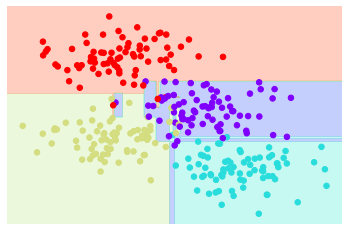

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y)

**Ensembles of Estimators: Random Forest**

Decision trees is prone to over fit the details of the data rather than the overall properties of the distributions. 


To reduce the effect of overfitting, multiple overfitting estimators can be combineed.  

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


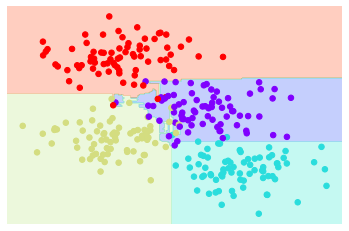

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Instead of fiting randoms subset of 80%, we can use RandomForestClassififer to optimize ensemble of randomized decision trees. 

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


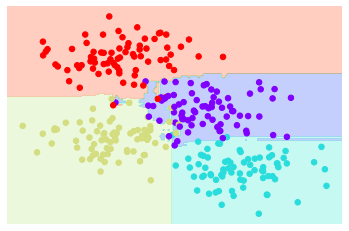

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

**Random Forest Regression**

Continuous rather than categorical variables

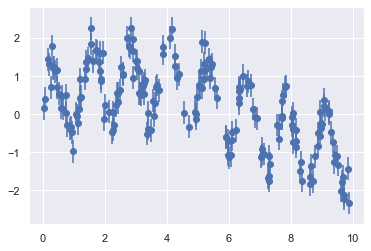

In [12]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

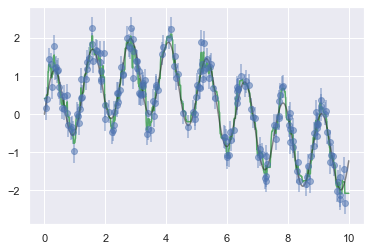

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-g');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

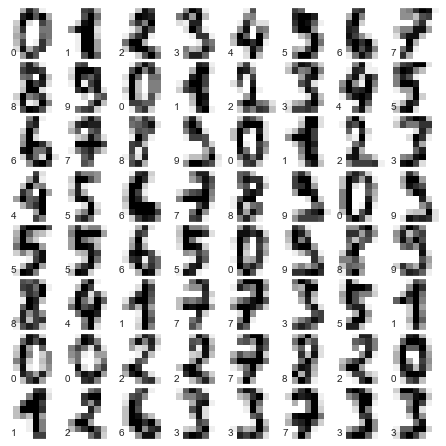

In [15]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [19]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



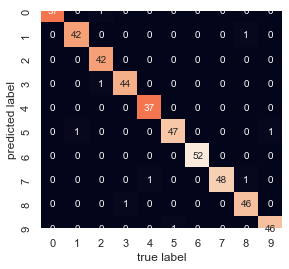

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');